<a href="https://colab.research.google.com/github/Flywolf1/Projects_Data_Analyst/blob/master/Test_task_Inbank_Volkov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test-task Credit Risk Assessment for Loan Applications

[link for Final Conclusions](#Final)

### Task Description:
You have been provided with a dataset in Sheet labeled as "Data" containing the following columns:  
**Order_ID:** The unique identifier for each order (loan).  
**Sales_Date:** The date of the loan sale.  
**Issued_amount:** The amount of loan sale.   
**Term**: Term in months of the contract.  
**Gender:** Gender of the customer.   
**Income:** Customers monthly income.   
**Age:** Customers age.   
**Product:** The name of the product (loan type) sold.  
**Default:** indicates whether the customer is delaying payment for at least 60 days and thus has reached the so-called default or insolvency group (1 - overdue for at least 60 days, 0 - the loan is repaid on time or payment delay is less than 60 days past due).   
**ci_score:** An external credit score provided by an external agency, offering an assessment of the customer's credit risk level based on various factors such as payment history, outstanding debts, and credit utilization.  
**ki_score:** Another external credit score provided by a different agency, offering an assessment of the customer's credit risk level based on similar criteria as the ci_score.  

Two external credit scores serve as crucial indicators of a customer's creditworthiness. They are derived from comprehensive analyses of the customer's financial behavior and credit history. The ci_score and ki_score play pivotal roles in evaluating the likelihood of default and informing lending decisions.

This dataset represents a standard small dataset commonly used in credit risk analysis. It contains fundamental variables typically considered when evaluating loan applications. Your analysis of this dataset will allow you to gain insights into client creditworthiness and provide valuable recommendations to mitigate credit risk.


###    Our goals:
1. Conduct preliminary data exploration to understand the dataset's characteristics. This exploration will enhance the depth and context of your analysis when proposing a model for assessing client creditworthiness.
2. Evaluate and recommend either the ci_score or ki_score model for further assessing the client's creditworthiness. Provide a rationale for your choice.
3. Provide a brief overview of the data that you would utilize in constructing a customer default probability model. Feel free to consider data beyond the provided dataset.
4. Propose your own model for predicting customer default. Ensure that your suggestion includes the model type, feature selection, and any relevant evaluation metrics.


### Task Deliverable:
Consolidate your findings into a single file, incorporating graphs and comments that clearly illustrate the results of your analysis and the decision-making process. Feel free to use data processing tool of your choice (e.g., R, Python, Excel).

# Import Libraries and Data Load


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#some statistical libraries
from scipy import stats
from scipy.stats import shapiro, kstest

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
from sklearn.cluster import KMeans

import itertools

In [ ]:
#for wide df
pd.set_option('display.max_columns', None)

In [ ]:
#set big pictures
#sns.set(rc={'figure.figsize':(7,7)})
sns.set(rc={'figure.figsize':(14,4)})

In [ ]:
! gdown 1Q1vXQrH6rbW6XWmwIj8SpzxCjXsJX47l #I'm working in colab, and somehow it has issues in calamine engine to read xlsx file, so I transfered it into csv for speed

Downloading...
From: https://drive.google.com/uc?id=1Q1vXQrH6rbW6XWmwIj8SpzxCjXsJX47l
To: /content/Risk_Analyst_Task.csv
100% 66.3k/66.3k [00:00<00:00, 47.8MB/s]


In [ ]:
loan_data = pd.read_csv('Risk_Analyst_Task.csv', sep= ';')#, index_col=0)

In [ ]:
def first_check(dataframe):  #standard baseline dataframe check function
     (display('Table cap:'),
      display(dataframe.head(5)),
      display('____________________________________________________________________________________________________' ),
      display('  '),
      display('Table tail:'),
      display(dataframe.tail(5)),
      display('____________________________________________________________________________________________________' ),
      display('  '),
      display('Table info:'),
      display(dataframe.info()),
      display('____________________________________________________________________________________________________' ),
      display('  '),
      display('Method Describe:'),
      display(dataframe.describe()),
      display('____________________________________________________________________________________________________' ),
      display('  '),
      display('Numbers of duplicates:'),
      display(dataframe.duplicated().sum())
      )

In [ ]:
 first_check(loan_data)

'Table cap:'

Order_ID  Sales_Date  Issued_amount  term  gender   income          age  \
0      9992  02.04.2021          15000    15  Female  45000.0   37,2073922   
1      9985  28.04.2021           5000    30  Female  35000.0  24,82956879   
2      9980  28.03.2021          15000    30  Female  45000.0  41,89185489   
3      9971  21.05.2021          10000     5  Female  30000.0  26,30800821   
4      9969  14.03.2021           3000    30  Female  35000.0  30,08898015   

  Product  Default  ci_score ki_score  
0       N        0     602.0    0,216  
1       M        0     534.0    0,285  
2       S        0     620.0    0,178  
3       V        0     567.0     0,24  
4       X        0     543.0    0,347

'____________________________________________________________________________________________________'

'  '

'Table tail:'

Order_ID  Sales_Date  Issued_amount  term  gender   income          age  \
1047        51  20.04.2021          10000    30  Female  25000.0  33,09514031   
1048        43  15.04.2021          15000    30    Male  70000.0  40,59958932   
1049        35  25.05.2021          15000    30  Female  40000.0  26,05065024   
1050        31  20.03.2021           3000    30    Male  40000.0  22,15468857   
1051        11  11.01.2021          10500    30  Female  30000.0  30,13826146   

     Product  Default  ci_score ki_score  
1047       Z        0     474.0    0,479  
1048       N        0     526.0    0,272  
1049       U        0     577.0    0,219  
1050       M        0     545.0    0,346  
1051       Y        0     533.0    0,197

'____________________________________________________________________________________________________'

'  '

'Table info:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       1052 non-null   int64  
 1   Sales_Date     1052 non-null   object 
 2   Issued_amount  1052 non-null   int64  
 3   term           1052 non-null   int64  
 4   gender         1052 non-null   object 
 5   income         990 non-null    float64
 6   age            1052 non-null   object 
 7   Product        1052 non-null   object 
 8   Default        1052 non-null   int64  
 9   ci_score       1026 non-null   float64
 10  ki_score       1052 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 90.5+ KB


None

'____________________________________________________________________________________________________'

'  '

'Method Describe:'

Order_ID  Issued_amount         term         income      Default  \
count  1052.000000    1052.000000  1052.000000     990.000000  1052.000000   
mean   4920.692015   10189.638783    25.256654   49296.161616     0.136882   
std    2920.355142    5655.165037     9.208583   28978.716969     0.343886   
min      11.000000    1000.000000     5.000000    5000.000000     0.000000   
25%    2376.750000    5000.000000    20.000000   30000.000000     0.000000   
50%    4774.000000   10250.000000    30.000000   45000.000000     0.000000   
75%    7539.500000   15000.000000    30.000000   60000.000000     0.000000   
max    9992.000000   30000.000000   168.000000  300000.000000     1.000000   

          ci_score  
count  1026.000000  
mean    563.461988  
std      53.148545  
min     400.000000  
25%     533.000000  
50%     566.500000  
75%     597.750000  
max     766.000000

'____________________________________________________________________________________________________'

'  '

'Numbers of duplicates:'

0

1. **Data Loading:**
Data has been loaded correctly.

2. **Column Renaming:**
Rename columns into snake_names format.

3. **Handling Null Values:**
Address null values in the 'ci_score' (26 nulls) and 'income' (62 nulls) columns.

4. **Data Type Conversion:**
* Convert 'Sales_Date' to date format.
* Convert 'gender' to boolean if possible.
* Convert 'age' and 'ki_score' to float.

5. **Analyze the default rate:** Default occurred in the last 60 days in 13.7% of customers, which appears to be a significant proportion.

5. **Observations on Numeric Columns:**
* Notice that quartiles of money numeric columns seem too perfect, resembling generated data.
* Note that 'Issued_amount' varies around 10189 ± 5655.
* Average term is 25 ± 9 months.
* Average income is 49296 ± 28978, indicating a considerable deviation.
* Term distribution appears to have a left shoulder, while income distribution has a right shoulder.

6. **Zero duplicates** - good.

In [ ]:
loan_data.nunique()

Order_ID         1007
Sales_Date        179
Issued_amount      31
term               28
gender              2
income            105
age              1008
Product            17
Default             2
ci_score          238
ki_score          376
dtype: int64

## Data Observations and Actions

**Unique Identifier Issue:**
- We noticed that the `unique_id` column is not fully unique, despite expecting 1062 unique values. This discrepancy suggests potential issues within our system or a combination of data from different systems.
- Using such a "unique" identifier in our system is not ideal and should be addressed with the help of data engineers.
- We should plan to investigate this issue further to ensure data integrity and reliability. It's something we'll need to look into later.

**Variability in 'Issued Amount':**
- There isn't much difference in the `issued_amount` column, despite expecting more variability due to different types of purchases (e.g., phones, cars) with varying prices.
- This lack of variability may indicate underlying patterns or inconsistencies in the data that need to be investigated.
- It's important to understand the factors influencing the `issued_amount` and ensure that the data accurately reflects the diversity of purchases.

Overall, addressing these issues will improve the quality and reliability of our data, enabling more accurate analysis and decision-making in the future. We should prioritize working with data engineers to resolve the unique identifier issue and conduct further analysis to understand the patterns in the `issued_amount` column.


# Data preparation


### Rename columns into snake_names.

In [ ]:
loan_data.rename(columns={
    'Order_ID':       'order_id',
    'Sales_Date':     'sales_date',
    'Issued_amount':  'issued_amount',
    'term':           'term',
    'gender':         'gender',
    'income':         'income',
    'age':            'age',
    'Product':        'product',
    'Default':        'default',
    'ci_score':       'ci_score',
    'ki_score':       'ki_score'
}, inplace=True)
#check
loan_data.columns

Index(['order_id', 'sales_date', 'issued_amount', 'term', 'gender', 'income',
       'age', 'product', 'default', 'ci_score', 'ki_score'],
      dtype='object')

In [ ]:
#check product types
loan_data['product'].unique()

array(['N', 'M', 'S', 'V', 'X', 'L', 'R', 'Y', 'T', 'P', 'Q', 'K', 'O',
       'Z', 'W', 'U', 'PP'], dtype=object)

## Order_id not unique

In [ ]:
nonuniq_orders = loan_data.groupby('order_id')['order_id'].count() #list of orders and count of them
nonuniq_orders = nonuniq_orders[nonuniq_orders > 1].index # keep only non unique

loan_data[loan_data['order_id'].isin(nonuniq_orders)] # see them

order_id  sales_date  issued_amount  term  gender    income  \
15        9872  26.03.2021           3500    12  Female   50000.0   
16        9872  20.04.2021          10000    30    Male  130000.0   
20        9806  25.05.2021           6000    30    Male   30000.0   
21        9806  27.04.2021          15000    30  Female   50000.0   
28        9752  09.04.2021           8000    30    Male   40000.0   
...        ...         ...            ...   ...     ...       ...   
1001       414  30.03.2021          13000    10  Female   30000.0   
1009       338  06.04.2021          15000    30  Female   48000.0   
1010       338  10.02.2021           5000    30    Male   65000.0   
1025       199  14.01.2021           3500    30  Female   30000.0   
1026       199  01.03.2021          15000    15  Female   40000.0   

              age product  default  ci_score ki_score  
15    42,53251198       R        0     638.0    0,363  
16    41,04312115       L        0     586.0    0,196  
20    31,92607803       Q        0     600.0    0,428  
21    37,52224504       R        0     565.0    0,289  
28    34,86652977       Q        0     560.0    0,365  
...           ...     ...      ...       ...      ...  
1001  43,85215606       W        0     562.0    0,339  
1009  43,00889802       V        0     581.0    0,315  
1010  27,19780972       Q        0     647.0     0,23  
1025  35,31827515       Z        0     568.0     0,25  
1026  42,14099932       M        0     540.0    0,218  

[88 rows x 11 columns]

As I see these unique value is not unique. and this is really different people different age, sums and products. So it is not co-borrowers (product and sum should be same for them).

## Sales_Date - to date.


In [ ]:
# As I see it is in two formats
loan_data['sales_date'] = loan_data['sales_date'].str.replace(r'[/-]', '.', regex=True) #in case we have different matches either "/" or "-".
loan_data['sales_date'] = loan_data['sales_date'].str.replace(' ', '') #protect for anything like spacebars

date_formats = '%d.%m.%Y'#, '%d/%m/%Y', '%d-%m-%Y ' ]

# Convert 'sales_date' to datetime
loan_data['sales_date'] = pd.to_datetime(loan_data['sales_date'], format = date_formats, errors='coerce')

## gender - to boolean

In [ ]:
loan_data.gender.unique()

array(['Female', 'Male'], dtype=object)

<Axes: xlabel='gender', ylabel='Count'>

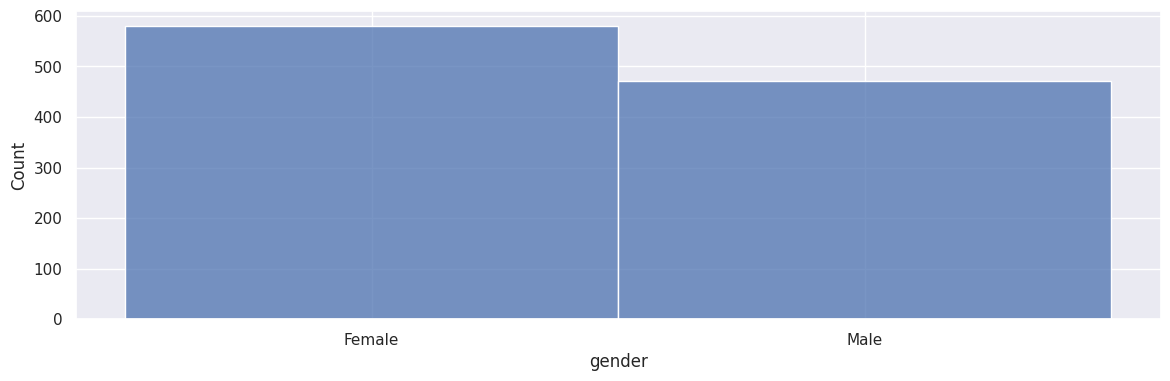

In [ ]:
sns.histplot(loan_data['gender'], bins=2)

We have more female which is correlates with population data. And zero unspecified.

In [ ]:
# Convert 'gender' to boolean
loan_data['is_female'] = loan_data['gender'].map({'Male': 0, 'Female': 1})

In [ ]:
loan_data = loan_data.drop(columns='gender')


## age, ki_score - to float.

In [ ]:
loan_data['age'] = loan_data['age'].str.replace("'", '').str.replace(',', '.').astype(float) #change , to points readable for python
loan_data['ki_score'] = loan_data['ki_score'].str.replace("'", '').str.replace(',', '.').astype(float)

## Adding additonal columns

There is not so much features in our dataset. And adding new columns, could help us to find more things that could affect. Also all models(except neuronets, partly) do not understand that some features could be divided to each other and it would be something logicaly affected.   

In [ ]:
# payment per month I belive could be important for understanding of default
# in real we should check different things Contract fee, Monthly service fee, Interest rate and others
loan_data['mt_payment'] = loan_data['issued_amount']/loan_data['term']

In [ ]:
# As it understandable income could be with or without taxes, the main thing is all are equal
# I think another important metric would be Credit Burden, the part of salary that should be payed into Bank
loan_data['crd_burden'] = (loan_data['mt_payment']/
                              (loan_data['income']/12))

In [ ]:
#I could say, that it could be also interesting metric as Days from the loan was issued. What if people who just get a credit,
# could miss more, than that one who already is paying for it for a long time
max_date = loan_data['sales_date'].max()
#add another metric days from loan issed
loan_data['days_f_loan'] = (max_date - loan_data['sales_date']).dt.days

Create a day of a week column, in case it would be important. I believe that on friday, we could be possibly see that some people are "last day doers". And they get into issues with payments later.

In [ ]:
# Create a new column containing the day of the week
loan_data['day_of_week'] = loan_data['sales_date'].dt.day_name()

In [ ]:
loan_data.day_of_week.unique()

array(['Friday', 'Wednesday', 'Sunday', 'Thursday', 'Saturday', 'Tuesday',
       'Monday'], dtype=object)

In [ ]:
first_check(loan_data)

'Table cap:'

order_id sales_date  issued_amount  term   income        age product  \
0      9992 2021-04-02          15000    15  45000.0  37.207392       N   
1      9985 2021-04-28           5000    30  35000.0  24.829569       M   
2      9980 2021-03-28          15000    30  45000.0  41.891855       S   
3      9971 2021-05-21          10000     5  30000.0  26.308008       V   
4      9969 2021-03-14           3000    30  35000.0  30.088980       X   

   default  ci_score  ki_score  is_female   mt_payment  crd_burden  \
0        0     602.0     0.216          1  1000.000000    0.266667   
1        0     534.0     0.285          1   166.666667    0.057143   
2        0     620.0     0.178          1   500.000000    0.133333   
3        0     567.0     0.240          1  2000.000000    0.800000   
4        0     543.0     0.347          1   100.000000    0.034286   

   days_f_loan day_of_week  
0           59      Friday  
1           33   Wednesday  
2           64      Sunday  
3           10      Friday  
4           78      Sunday

'____________________________________________________________________________________________________'

'  '

'Table tail:'

order_id sales_date  issued_amount  term   income        age product  \
1047        51 2021-04-20          10000    30  25000.0  33.095140       Z   
1048        43 2021-04-15          15000    30  70000.0  40.599589       N   
1049        35 2021-05-25          15000    30  40000.0  26.050650       U   
1050        31 2021-03-20           3000    30  40000.0  22.154689       M   
1051        11 2021-01-11          10500    30  30000.0  30.138261       Y   

      default  ci_score  ki_score  is_female  mt_payment  crd_burden  \
1047        0     474.0     0.479          1  333.333333    0.160000   
1048        0     526.0     0.272          0  500.000000    0.085714   
1049        0     577.0     0.219          1  500.000000    0.150000   
1050        0     545.0     0.346          0  100.000000    0.030000   
1051        0     533.0     0.197          1  350.000000    0.140000   

      days_f_loan day_of_week  
1047           41     Tuesday  
1048           46    Thursday  
1049            6     Tuesday  
1050           72    Saturday  
1051          140      Monday

'____________________________________________________________________________________________________'

'  '

'Table info:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1052 non-null   int64         
 1   sales_date     1052 non-null   datetime64[ns]
 2   issued_amount  1052 non-null   int64         
 3   term           1052 non-null   int64         
 4   income         990 non-null    float64       
 5   age            1052 non-null   float64       
 6   product        1052 non-null   object        
 7   default        1052 non-null   int64         
 8   ci_score       1026 non-null   float64       
 9   ki_score       1052 non-null   float64       
 10  is_female      1052 non-null   int64         
 11  mt_payment     1052 non-null   float64       
 12  crd_burden     990 non-null    float64       
 13  days_f_loan    1052 non-null   int64         
 14  day_of_week    1052 non-null   object        
dtypes: datetime64[ns](1),

None

'____________________________________________________________________________________________________'

'  '

'Method Describe:'

order_id  issued_amount         term         income          age  \
count  1052.000000    1052.000000  1052.000000     990.000000  1052.000000   
mean   4920.692015   10189.638783    25.256654   49296.161616    34.749206   
std    2920.355142    5655.165037     9.208583   28978.716969     9.471514   
min      11.000000    1000.000000     5.000000    5000.000000    22.012320   
25%    2376.750000    5000.000000    20.000000   30000.000000    27.503080   
50%    4774.000000   10250.000000    30.000000   45000.000000    33.196441   
75%    7539.500000   15000.000000    30.000000   60000.000000    39.528405   
max    9992.000000   30000.000000   168.000000  300000.000000    70.611910   

           default     ci_score     ki_score    is_female   mt_payment  \
count  1052.000000  1026.000000  1052.000000  1052.000000  1052.000000   
mean      0.136882   563.461988     0.297144     0.551331   422.820356   
std       0.343886    53.148545     0.127554     0.497595   247.701474   
min       0.000000   400.000000     0.094000     0.000000    33.333333   
25%       0.000000   533.000000     0.207750     0.000000   233.333333   
50%       0.000000   566.500000     0.269000     1.000000   500.000000   
75%       0.000000   597.750000     0.345000     1.000000   500.000000   
max       1.000000   766.000000     0.759000     1.000000  2000.000000   

       crd_burden  days_f_loan  
count  990.000000  1052.000000  
mean     0.126721    55.923954  
std      0.125023    39.673668  
min      0.005714     0.000000  
25%      0.061538    24.000000  
50%      0.100000    50.500000  
75%      0.160000    77.000000  
max      2.400000   150.000000

'____________________________________________________________________________________________________'

'  '

'Numbers of duplicates:'

0

## Interim Conclusions


**Data Observations and Fixes**

**Observations on Additional Numeric Columns:**

After addressing all data issues, here are some observations on additional numeric columns:

- **Age:** The average age is 34.7 ± 10 years, providing insight into the demographic distribution of customers.

- **Ki_score:** The average ki_score is 0.30 ± 0.13, suggesting the creditworthiness of customers.

- **Monthly Payment:** The average monthly payment is 423 ± 248, with a considerable deviation, reflecting varying repayment capabilities among customers.

- **Credit Burden:** The credit_burden is 12.6% ± 12.5%, with a median of 10%, indicating a wide deviation and potential financial strain on customers.

**Recommendations for Improvement:**

To ensure data integrity and consistency, we need to address the following issue:

- **Fix Unique Order_ID:** It's crucial to fix the unique order_id to avoid potential issues with connecting non-unique values in other BI systems or the Data Warehouse. This task will be addressed to the Data Engineers department for resolution.


**Handling Null Values:**

Address null values in the 'ci_score' (26 nulls) and 'income' (62 nulls) columns. Right now it is tough to fill Null values, I need to explore more and understand better.


# Exploratory Data Analysis (EDA)

###  The average values of features in two groups - those who default and not

In [ ]:
loan_data.groupby('default').agg('mean').T

<ipython-input-24-f830fe3f1de9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loan_data.groupby('default').agg('mean').T


default                   0             1
order_id        4906.958150   5007.291667
issued_amount  10189.977974  10187.500000
term              25.205947     25.576389
income         49262.108922  49527.559055
age               34.930453     33.606339
ci_score         564.449324    557.108696
ki_score           0.288702      0.350382
is_female          0.563877      0.472222
mt_payment       425.626663    405.125029
crd_burden         0.128288      0.116070
days_f_loan       56.042952     55.173611

**Observations on Default Probability**

**Overview:**
Upon reviewing the data, we observed differences in default probabilities across various groups. This is just a scratch and first glance. Here's a summary of the differences noted:

**Factors Associated with Higher Default Probability:**
- **Gender:** There appears to be a higher default probability among males, although the number of males in this group seems lower than females.
- **Age:** Younger individuals exhibit a slightly higher default probability.
- **Ki_score:** Individuals with a higher Ki_score tend to have a higher default probability.
- **Ci_score:** Conversely, individuals with a lower Ci_score demonstrate a higher default probability.
- **Monthly Payment:** A lower monthly payment is associated with a higher default probability.
- **Credit Burden:** Surprisingly, a lower credit burden is also linked to a higher default probability, which warrants further investigation.

**Factors with No Significant Difference:**
- **Issued Amount:** There doesn't appear to be a significant difference in default probability based on the issued amount.
- **Term:** Similarly, the term of the loan doesn't seem to influence default probability significantly.

These observations provide valuable insights into the factors influencing default probability and can help guide further analysis and decision-making processes.

### Bar graphs and feature distributions for those who default and those who not;

In [ ]:
numeric_columns = ['order_id',	'issued_amount',	'term',	'income',	'age',	'ci_score',	'ki_score','mt_payment', 'crd_burden', 'days_f_loan']

In [ ]:
category_columns = ['product', 'is_female',	'day_of_week']

In [ ]:
#custom_palette = ["#e3d2ff", "#d9d4a7"] palette of inbank pale
#Palette of inbank bright taken from official site, but could be different
custom_palette = ["#aa93ff", "#ff9540"]

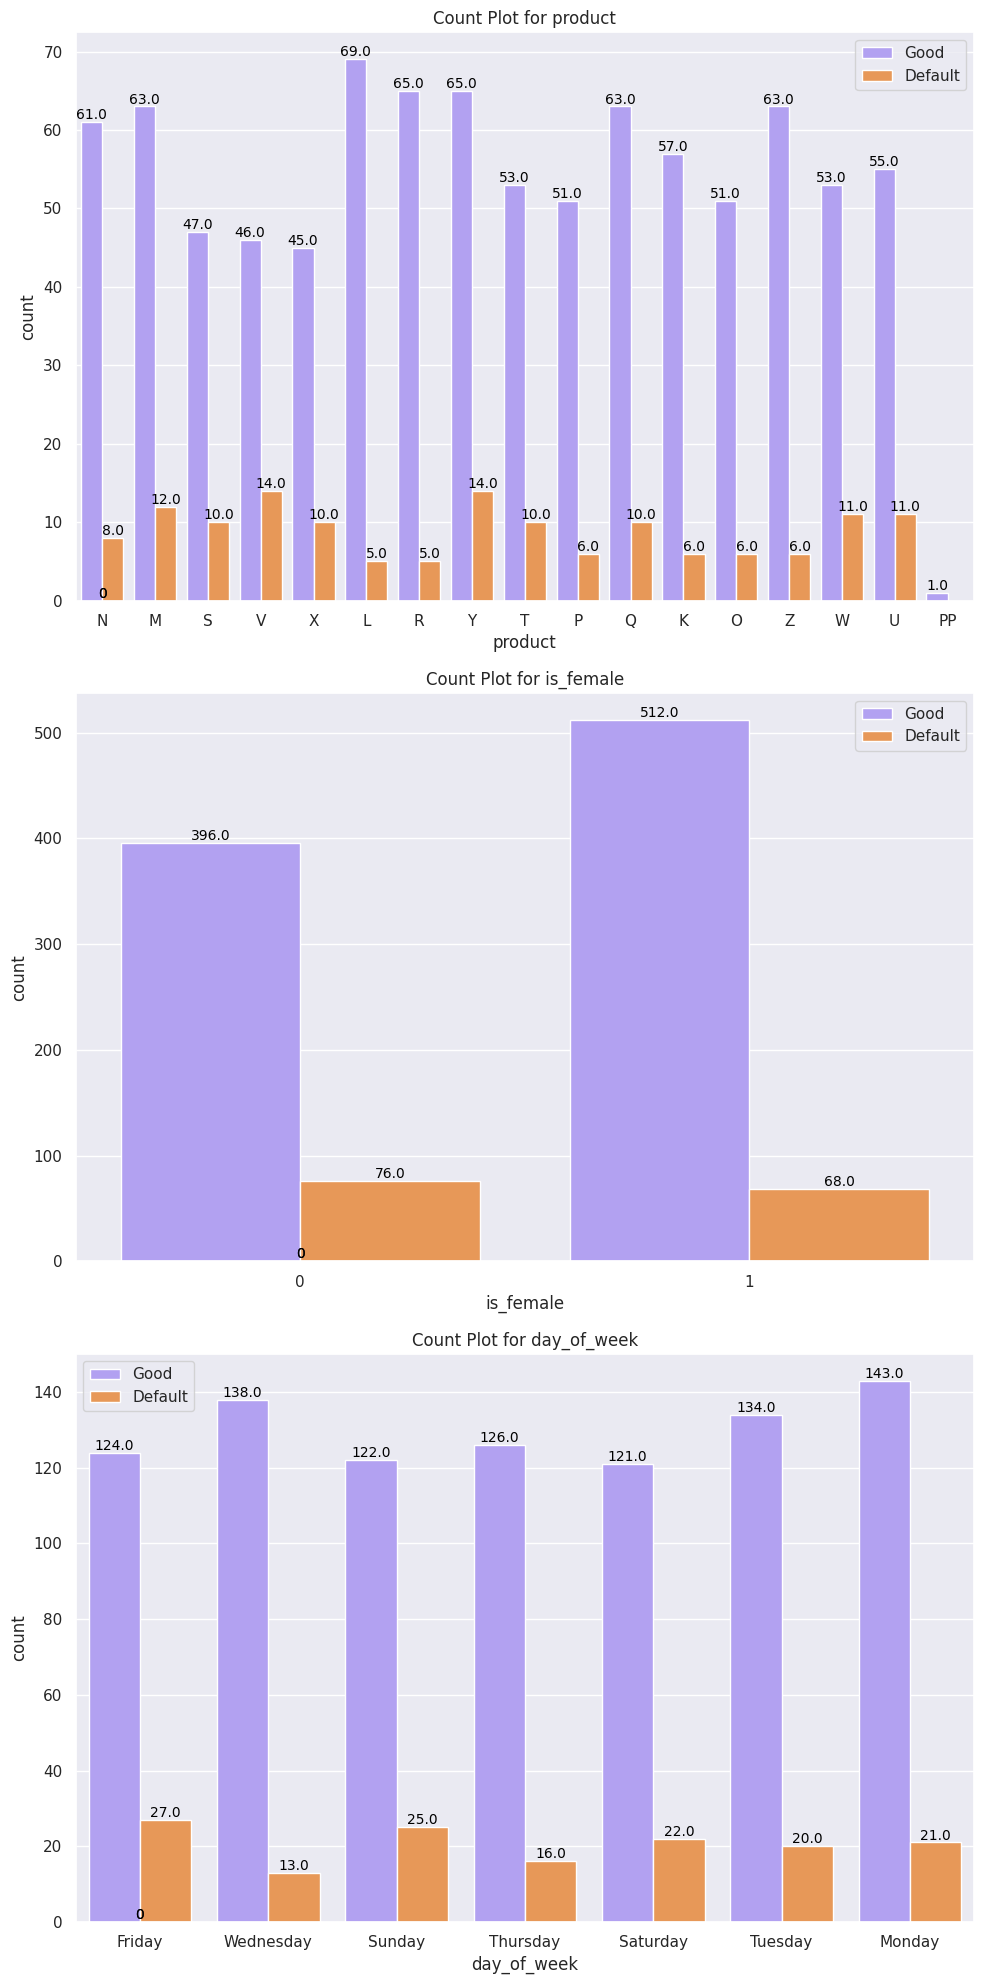

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))
axes_list = axes.flatten()

for column, ax in zip(category_columns, axes_list):
    sns.countplot(x=column, data=loan_data, ax=ax, hue='default', palette=custom_palette)
    ax.set_title(f'Count Plot for {column}')
    ax.legend(['Good', 'Default'])

    # Add data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

**Observations:**

- **Products:** As we could see there is not so much differences in amount of products. I could say that it should not be so, if mortarage is product PP. But car loans and mini loans could be a bit different in numbers. Not like 70 and 50. If we give 50 loans for cars, 70 for phones?  

- **Gender:** Also we could see, that we have more clients as woman, but less part of them are default. and in absolute values equal to male default

- **Day_of_week** we see a bit difference between days. But the thing is that weekends are not very different from working day.


<Figure size 1200x400 with 0 Axes>

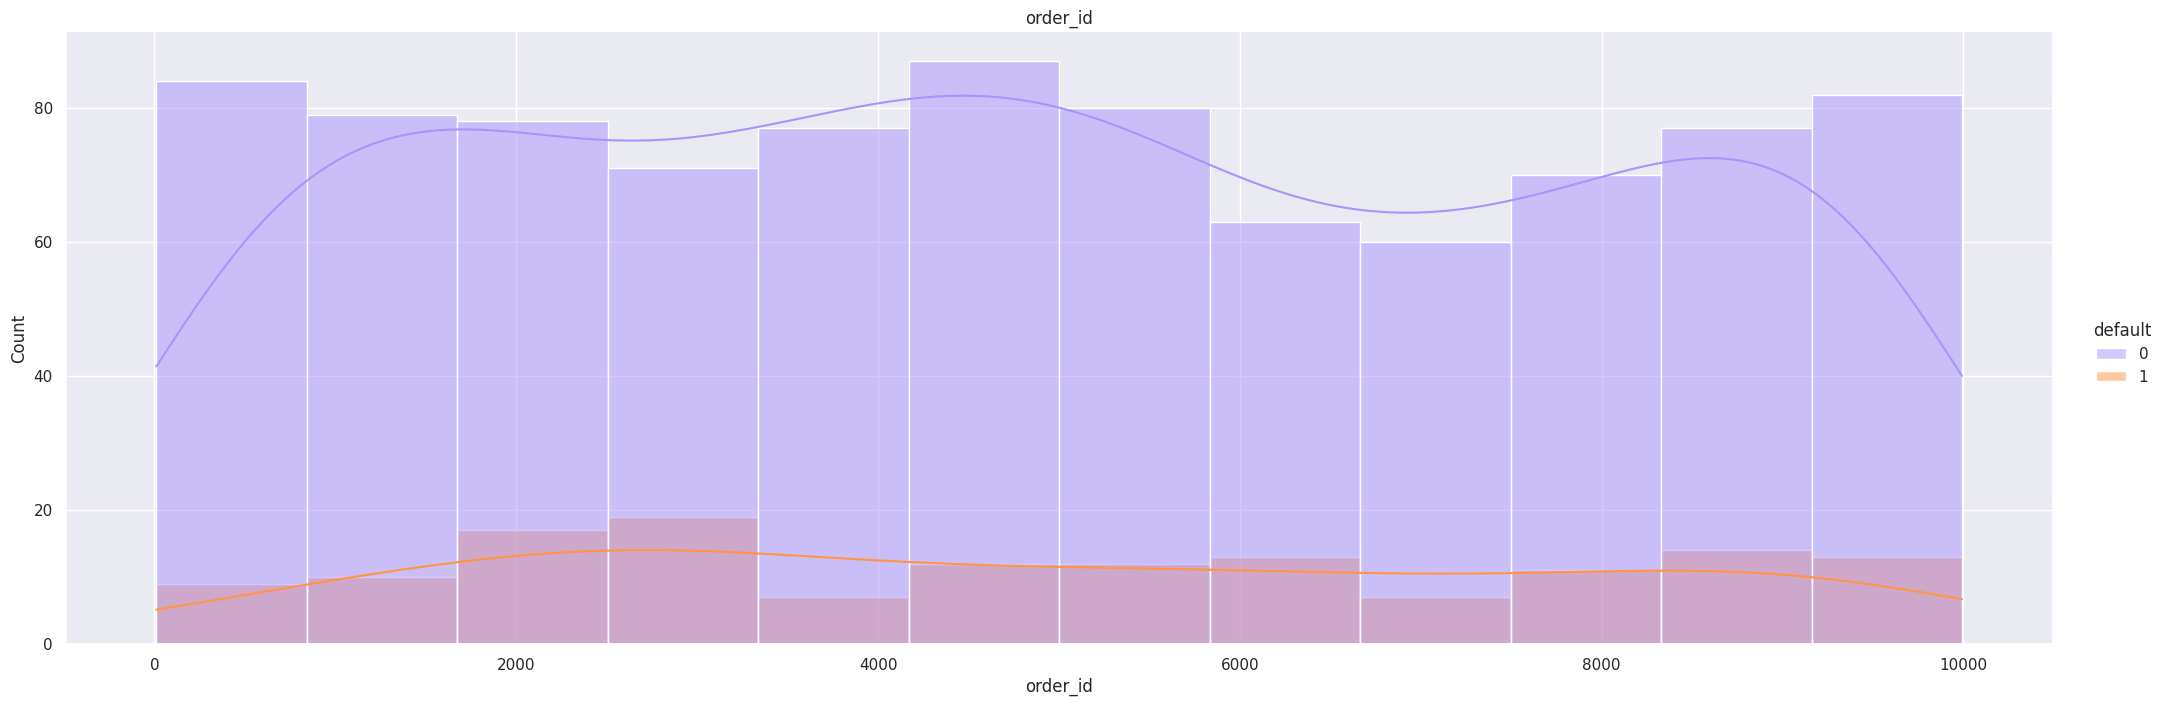

<Figure size 1200x400 with 0 Axes>

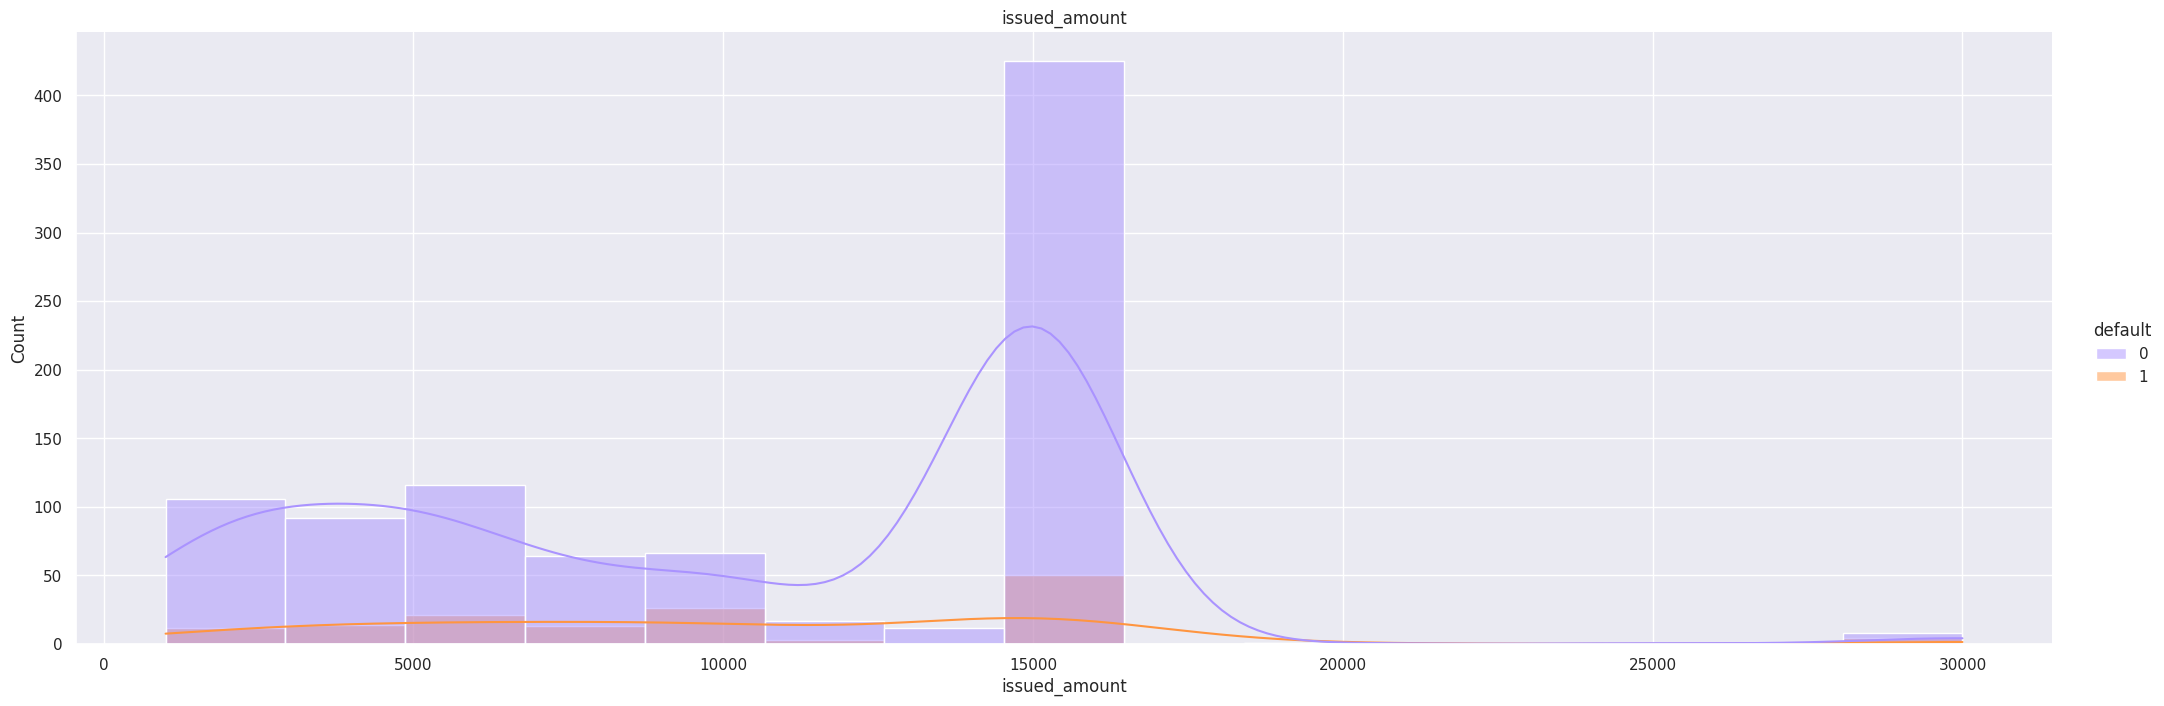

<Figure size 1200x400 with 0 Axes>

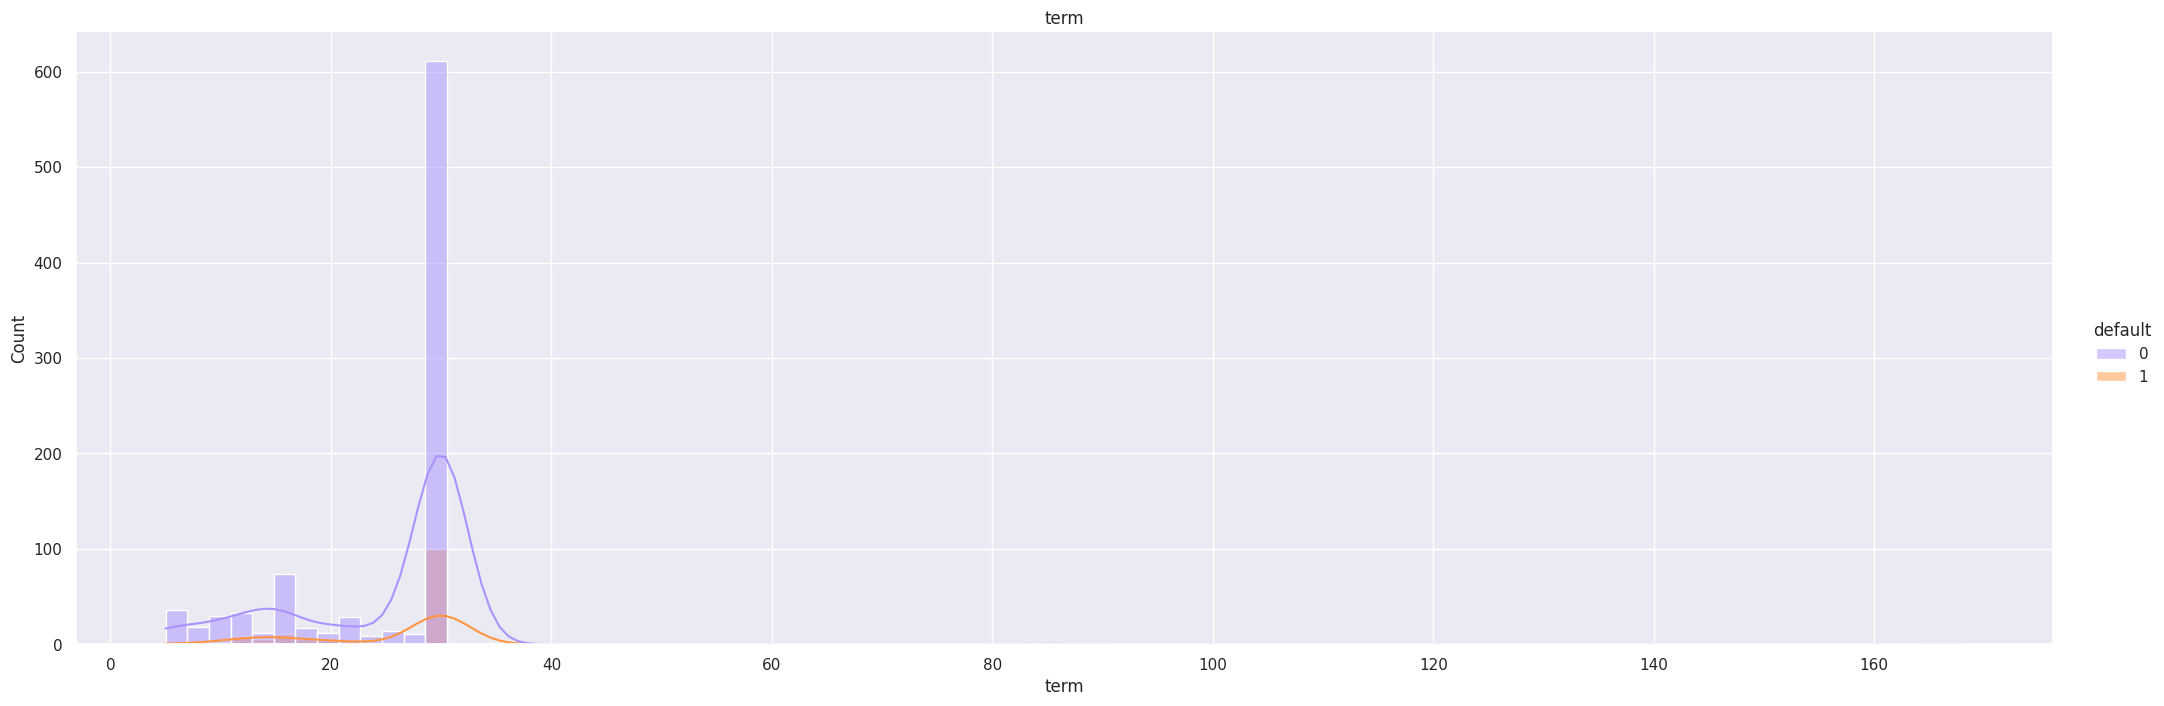

<Figure size 1200x400 with 0 Axes>

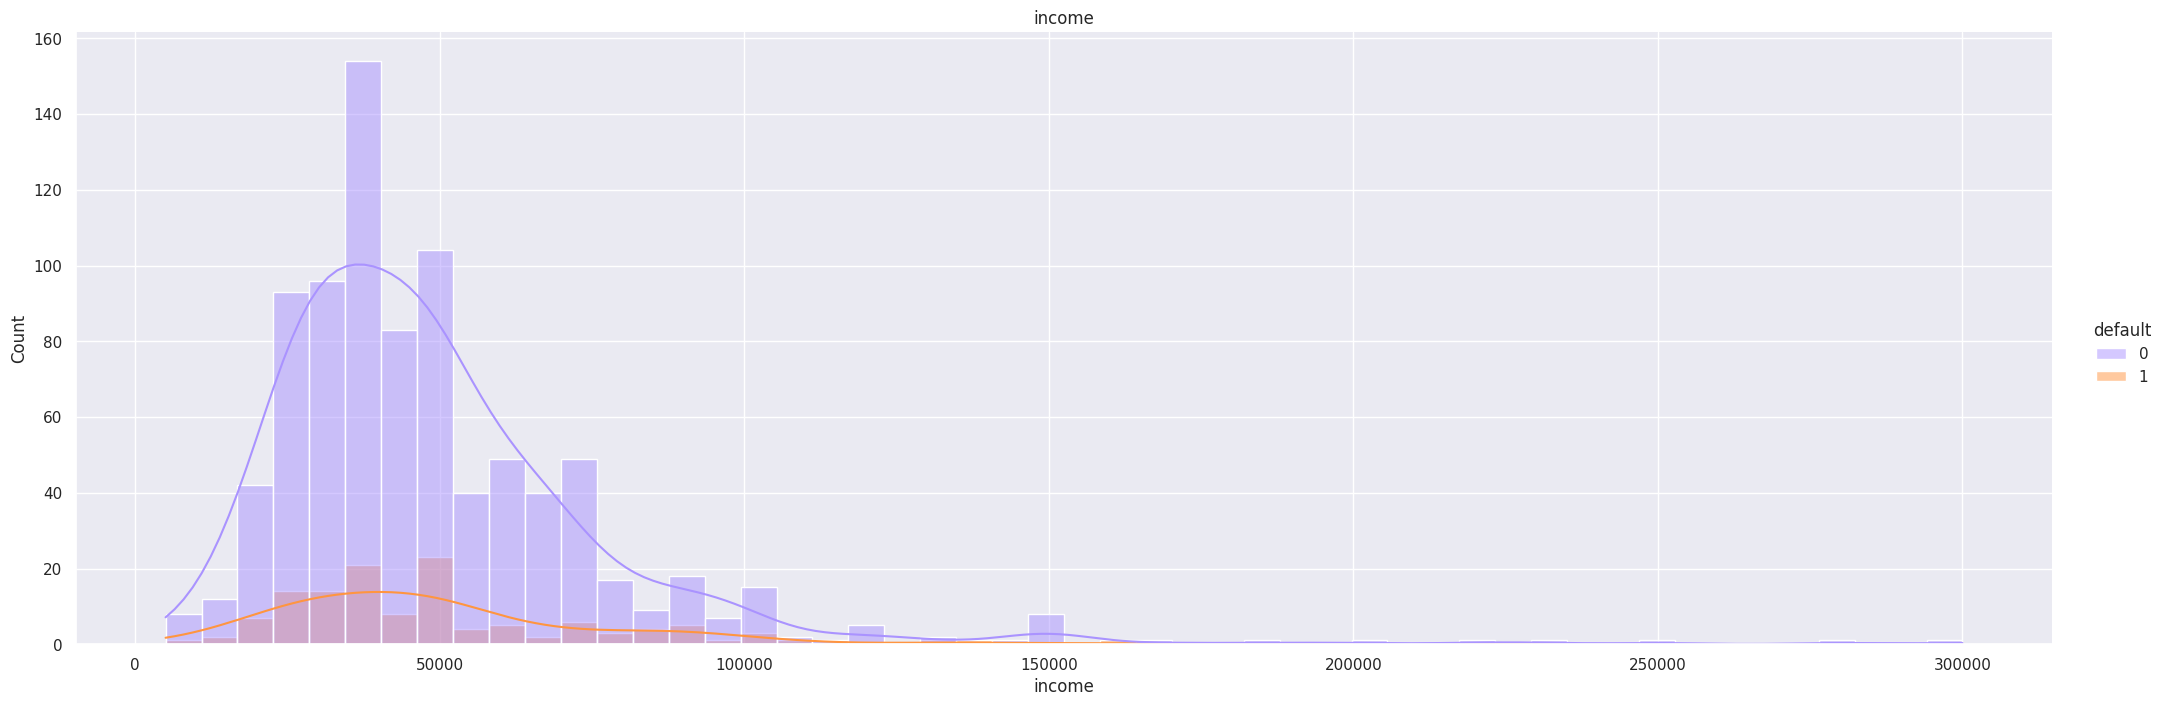

<Figure size 1200x400 with 0 Axes>

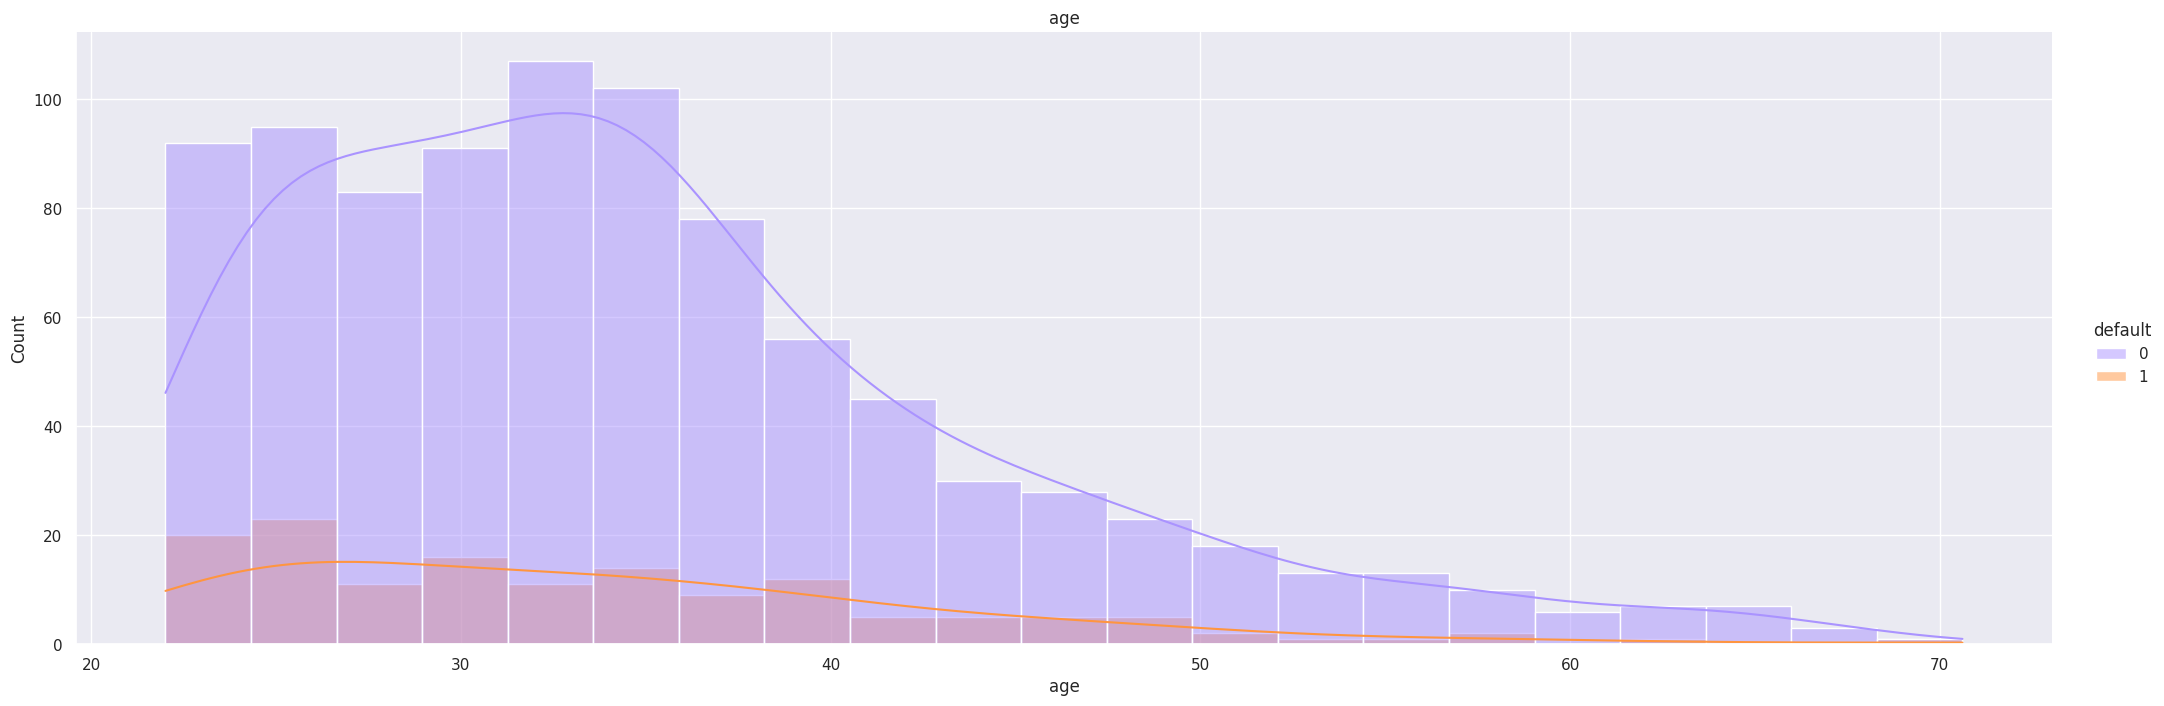

<Figure size 1200x400 with 0 Axes>

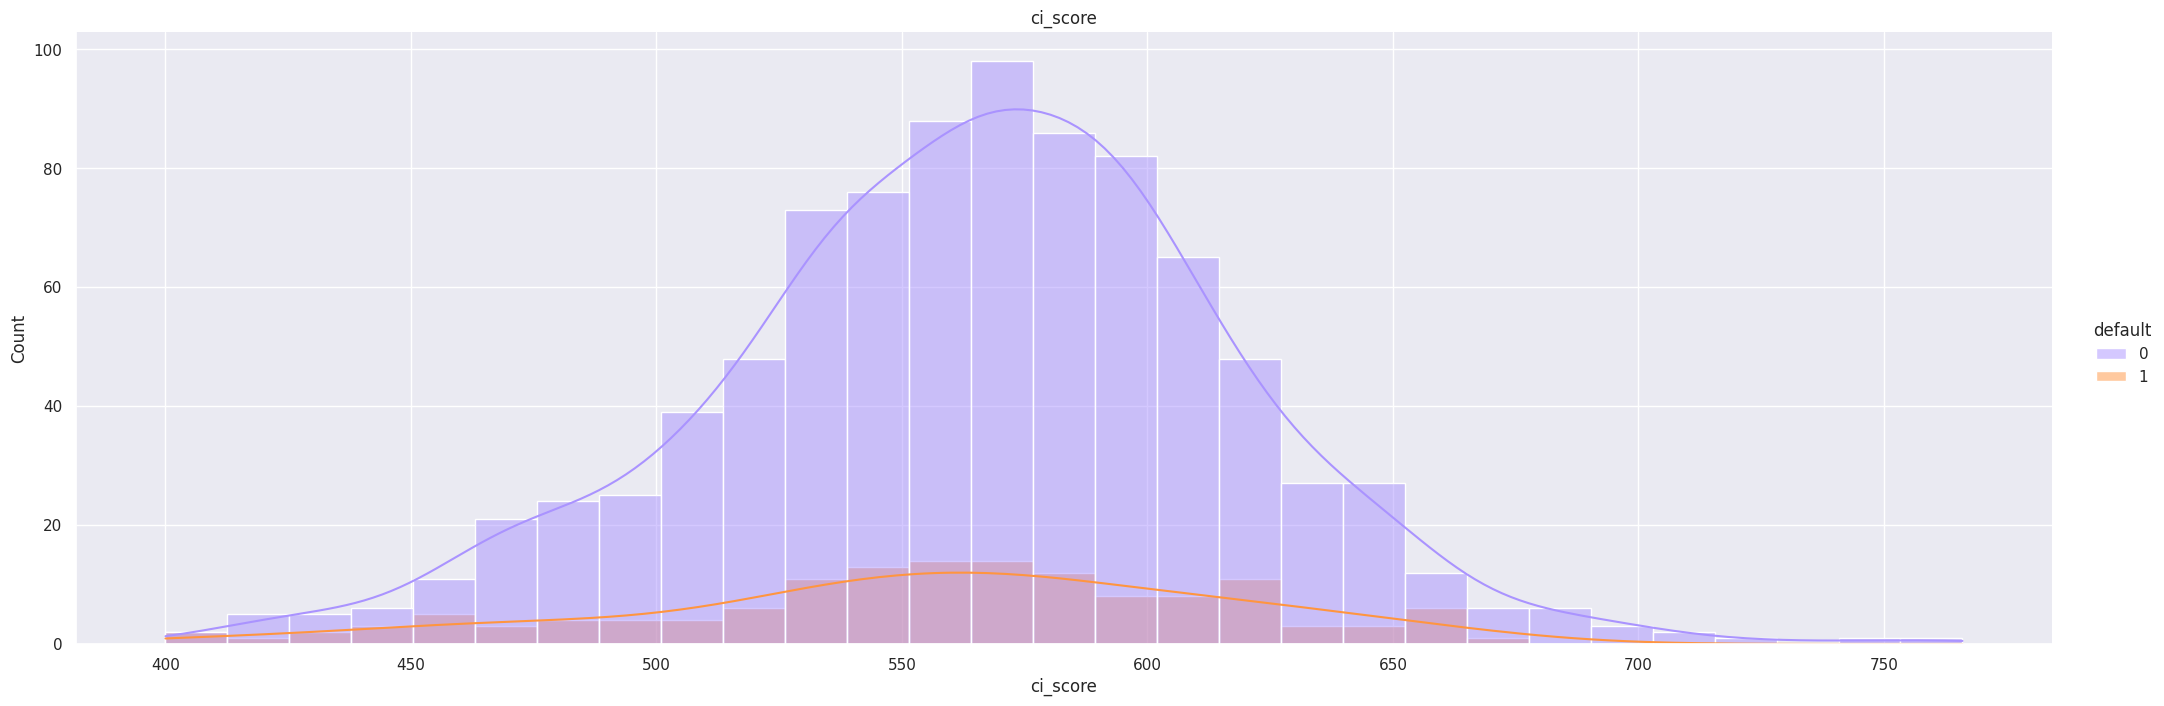

<Figure size 1200x400 with 0 Axes>

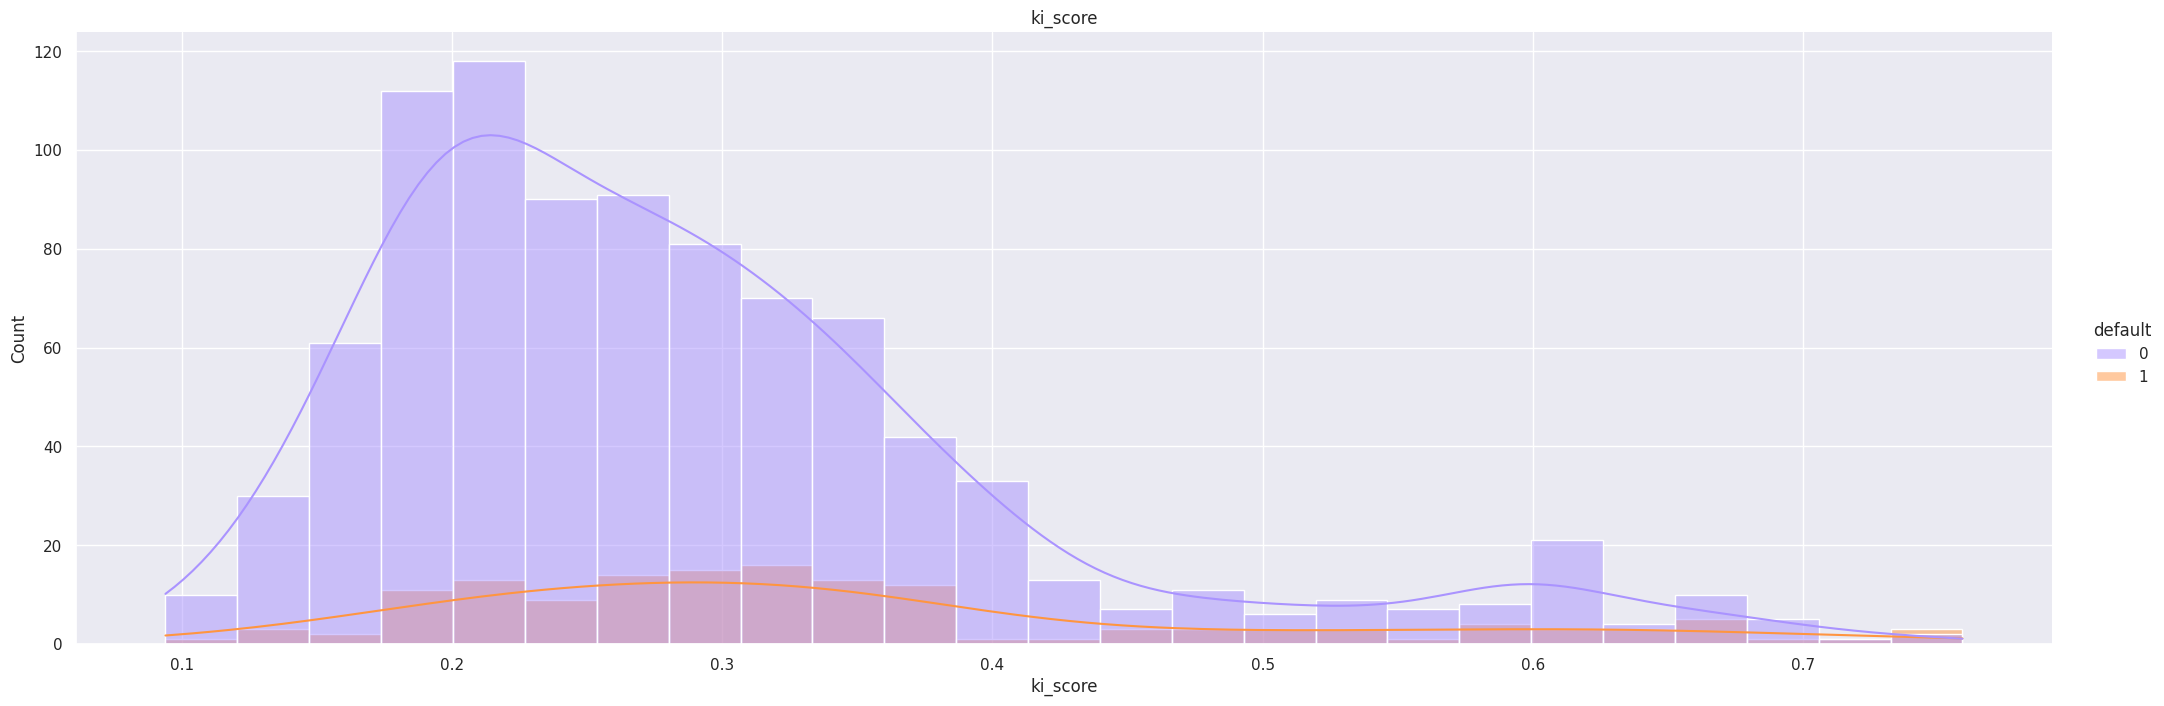

<Figure size 1200x400 with 0 Axes>

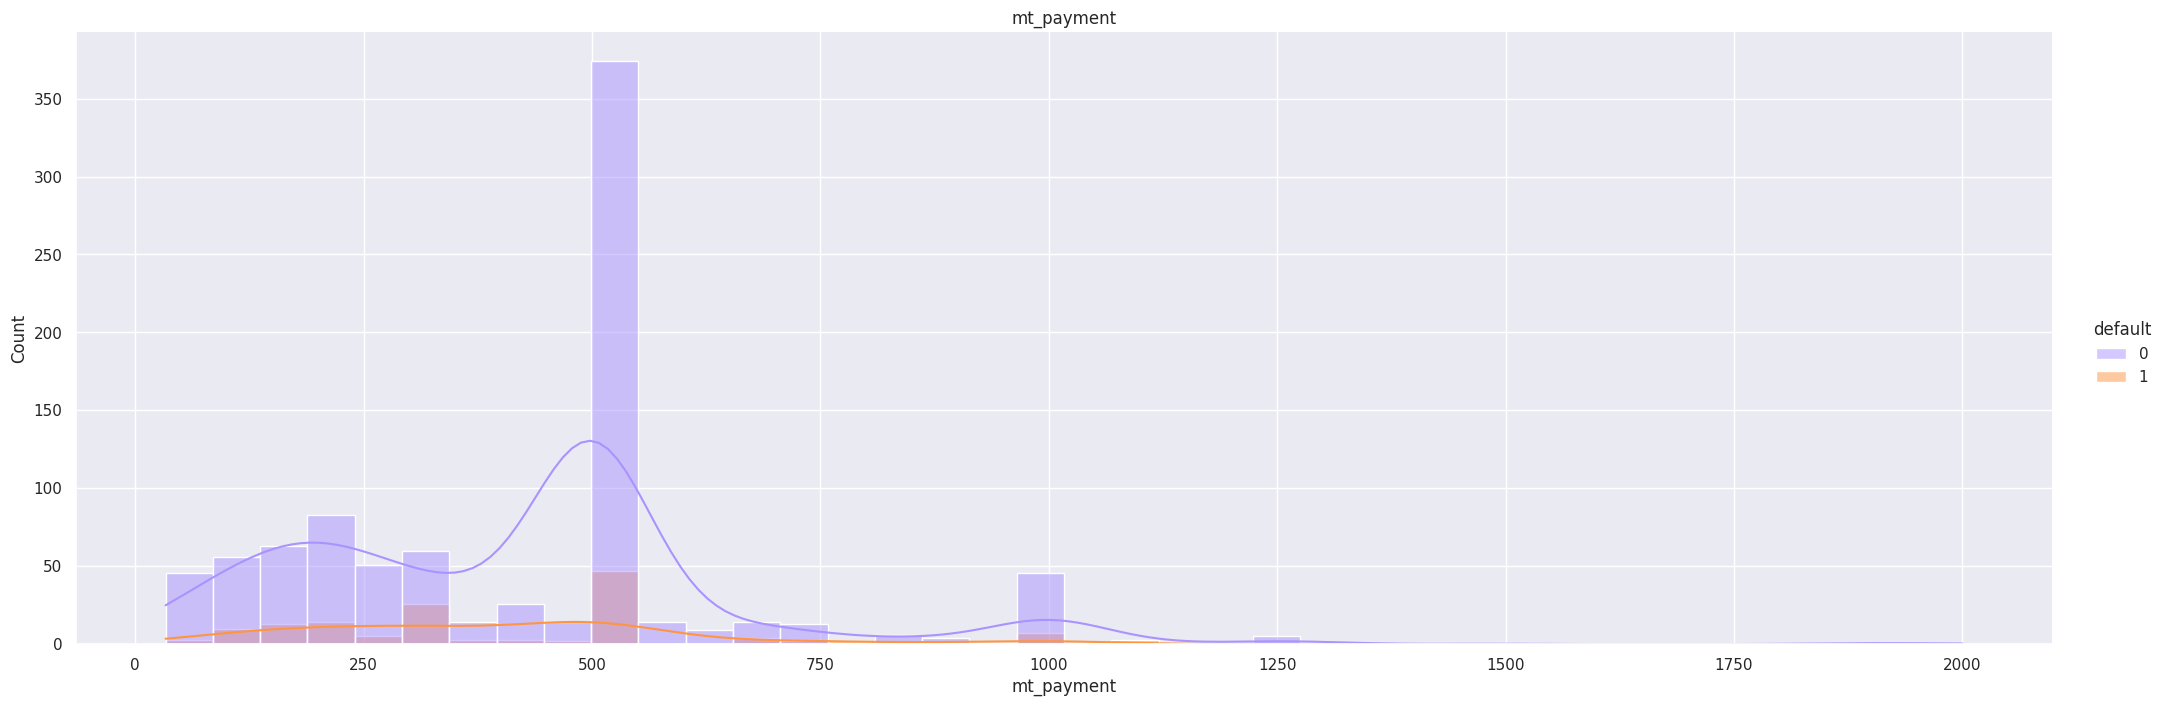

<Figure size 1200x400 with 0 Axes>

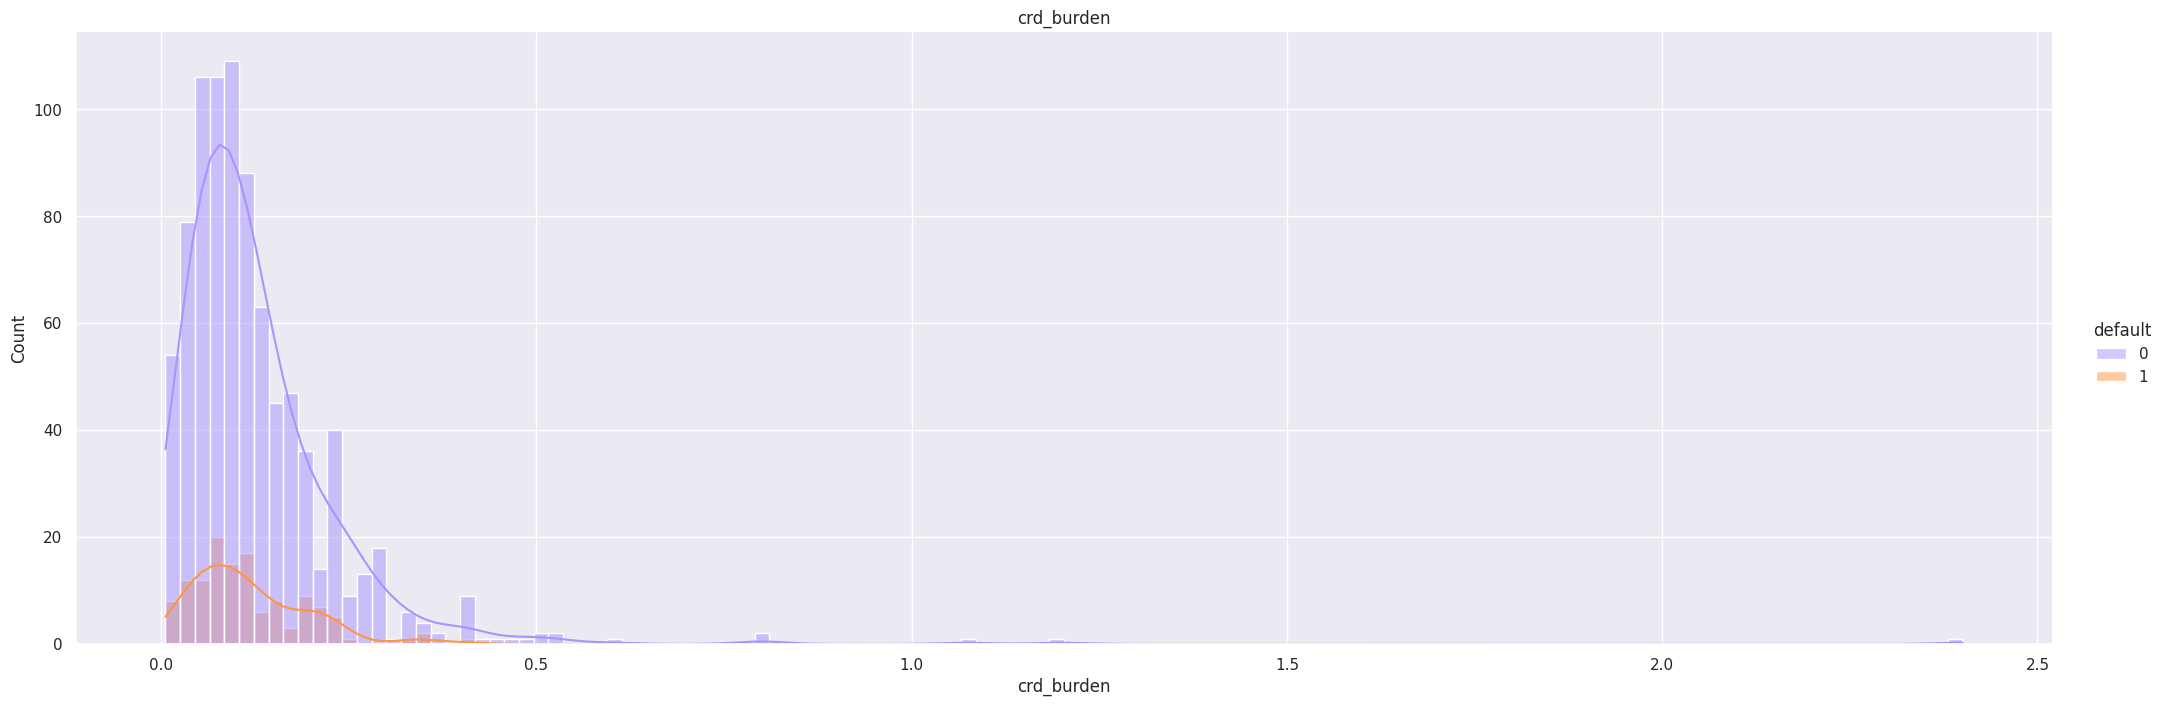

<Figure size 1200x400 with 0 Axes>

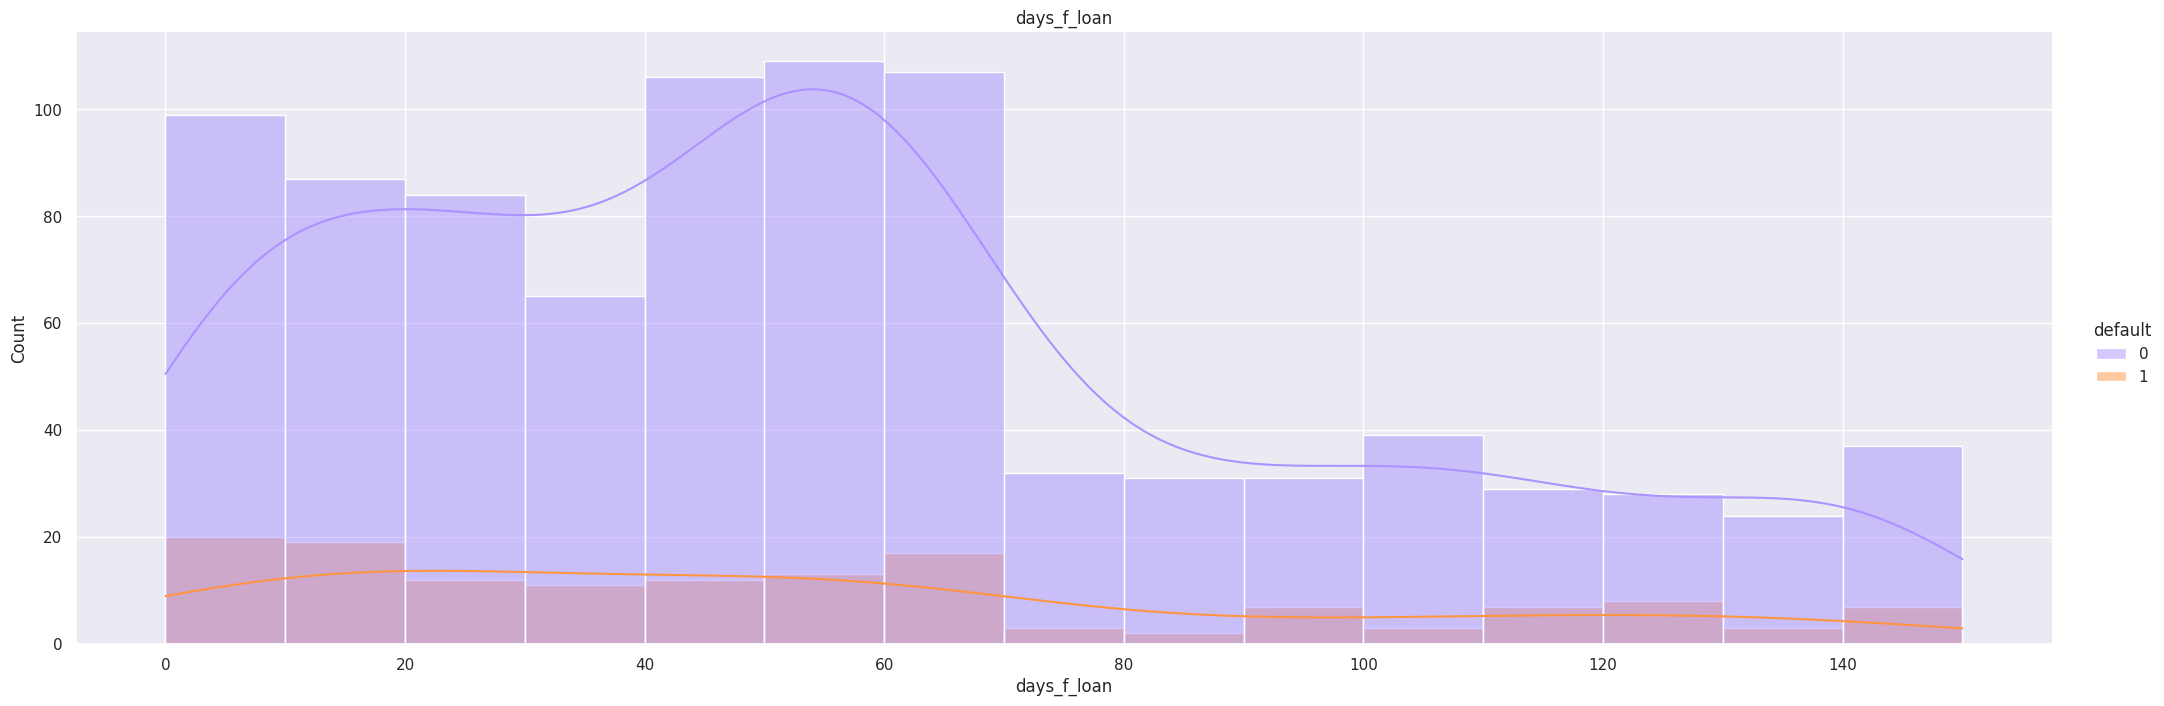

In [ ]:
for column in numeric_columns:
    plt.figure(figsize=(12, 4))
    sns.displot(x=loan_data[column], hue="default", data=loan_data, kde=True, height=7, aspect=3, palette= custom_palette)
    plt.title(column)
    plt.show();

**Observations:**

- **Orders:** Stable with no apparent impact on default.

- **Issued Amount:** Most loans fall between 15,000 and 16,000, with no noticeable effect on default.

- **Term:** 30 months is the most common loan term, with no significant impact on default. Loans up to 168 months exist, but their distribution is not normal.

- **Income:** Distribution is roughly normal with a slight right shoulder and a small peak at 150,000. Income does not appear to affect default.

- **Age:** Credit issuance increases until age 33, then declines until age 70. Default rates are higher for borrowers under age 28.

- **CI Score:** Appears normally distributed, but its relationship with default is unclear. Lower scores may be associated with slightly higher default risk.

- **KI Score:** Not normally distributed. Higher scores may indicate increased risk of default.

- **Monthly Payments:** Skewed towards round numbers (e.g., 500, 1000, 1250) and not normally distributed.

- **Credit Burden:** Normally distributed, but there are concerns with data accuracy. Some borrowers have credit burdens exceeding recommended levels (40% of income).

### Credit burden discovery

Maybe it would help to undestand better our customers with such specifics.

In [ ]:
# Let's look into that whos burden is more than 40% are they risky
loan_data[loan_data['crd_burden']> 0.4].sort_values(by = 'crd_burden', ascending = False)

order_id sales_date  issued_amount  term   income        age product  \
809       2204 2021-01-21          15000    15   5000.0  37.018480       N   
435       5587 2021-05-18          15000    10  15000.0  33.100616       Q   
72        9332 2021-01-07           5000     8   7000.0  25.897331       K   
3         9971 2021-05-21          10000     5  30000.0  26.308008       V   
297       7118 2021-04-26           5000     5  15000.0  31.359343       L   
994        488 2021-05-02          15000    12  25000.0  45.853525       Y   
1002       402 2021-05-14          20000    30  15000.0  34.929500       Q   
1001       414 2021-03-30          13000    10  30000.0  43.852156       W   
465       5311 2021-04-27          15000    21  17000.0  33.004791       T   
473       5225 2021-04-26          10000     8  30000.0  60.364134       Y   
457       5396 2021-04-03          15000    15  25000.0  36.117728       K   
137       8796 2021-01-14          15000    21  18000.0  69.119781       M   
285       7250 2021-04-11           8000    12  18000.0  43.592060       Y   
1041       100 2021-05-06          15000    14  30000.0  30.130048       U   
75        9306 2021-05-15           9000    12  22000.0  31.017112       Q   

      default  ci_score  ki_score  is_female   mt_payment  crd_burden  \
809         0     611.0     0.332          0  1000.000000    2.400000   
435         0     560.0     0.236          1  1500.000000    1.200000   
72          0     500.0     0.206          1   625.000000    1.071429   
3           0     567.0     0.240          1  2000.000000    0.800000   
297         0     550.0     0.183          0  1000.000000    0.800000   
994         0     591.0     0.497          0  1250.000000    0.600000   
1002        0     603.0     0.240          0   666.666667    0.533333   
1001        0     562.0     0.339          1  1300.000000    0.520000   
465         0     523.0     0.539          1   714.285714    0.504202   
473         0     629.0     0.297          1  1250.000000    0.500000   
457         0     577.0     0.239          1  1000.000000    0.480000   
137         0     651.0     0.187          0   714.285714    0.476190   
285         0     610.0     0.339          1   666.666667    0.444444   
1041        0     605.0     0.636          0  1071.428571    0.428571   
75          0     436.0     0.350          1   750.000000    0.409091   

      days_f_loan day_of_week  
809           130    Thursday  
435            13     Tuesday  
72            144    Thursday  
3              10      Friday  
297            35      Monday  
994            29      Sunday  
1002           17      Friday  
1001           62     Tuesday  
465            34     Tuesday  
473            35      Monday  
457            58    Saturday  
137           137    Thursday  
285            50      Sunday  
1041           25    Thursday  
75             16    Saturday

In [ ]:
loan_data[loan_data['crd_burden']> 0.4]['age'].count()

15

**Data Considerations:**

- **Household Income:** Currently, only personal income is considered. Including household income could provide a more comprehensive view of financial capacity.

- **Spending Habits:** Data on spending habits is not available. This information could help assess borrowers' ability to manage their finances and repay their loans.

### Boxplot distribution of numeric values

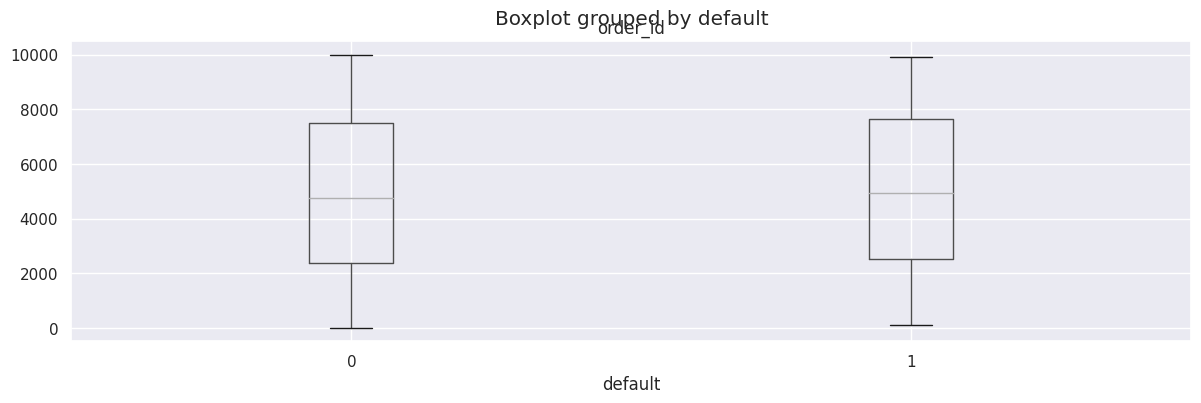

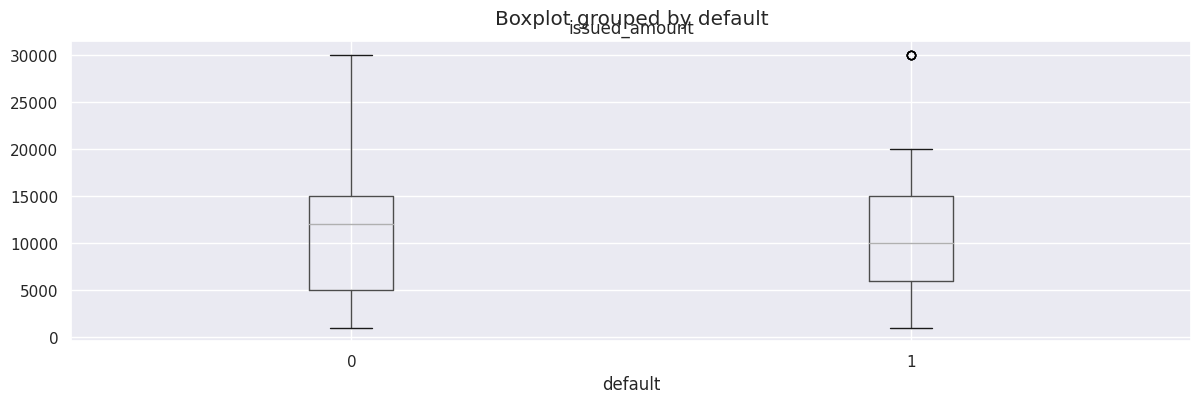

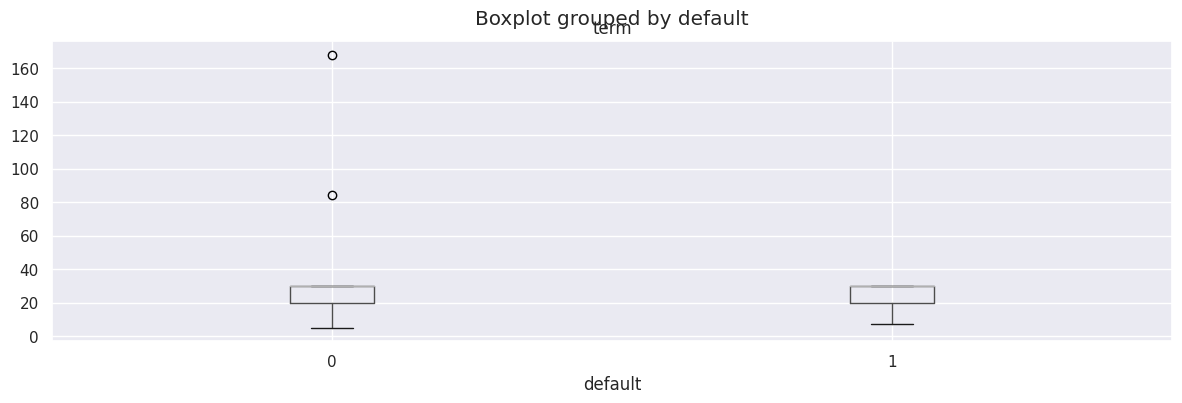

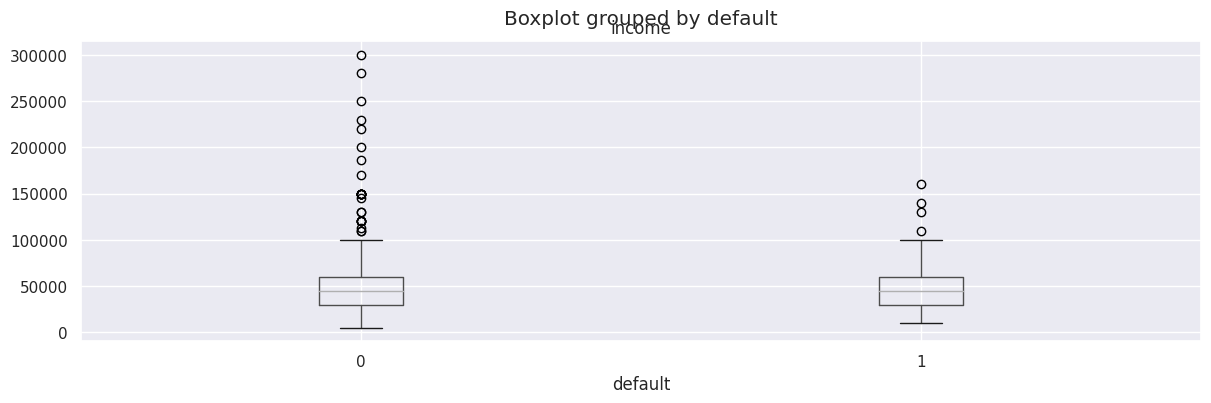

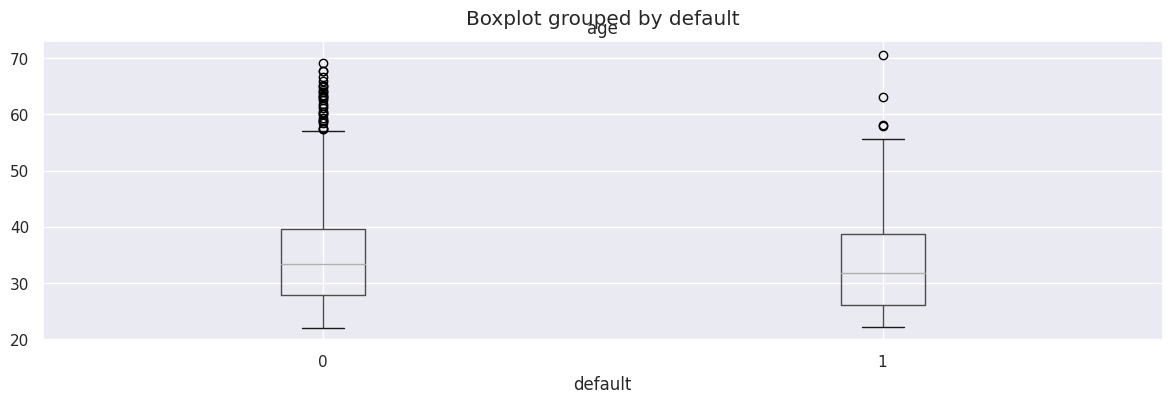

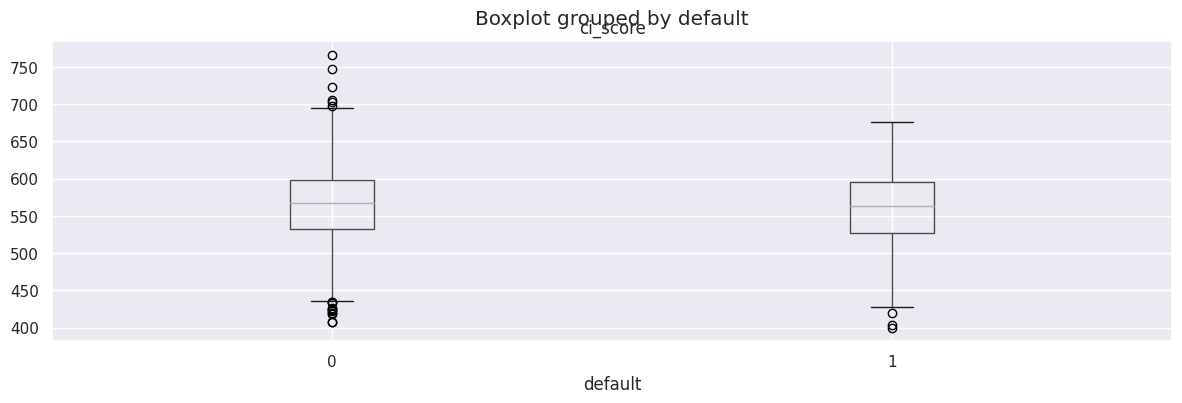

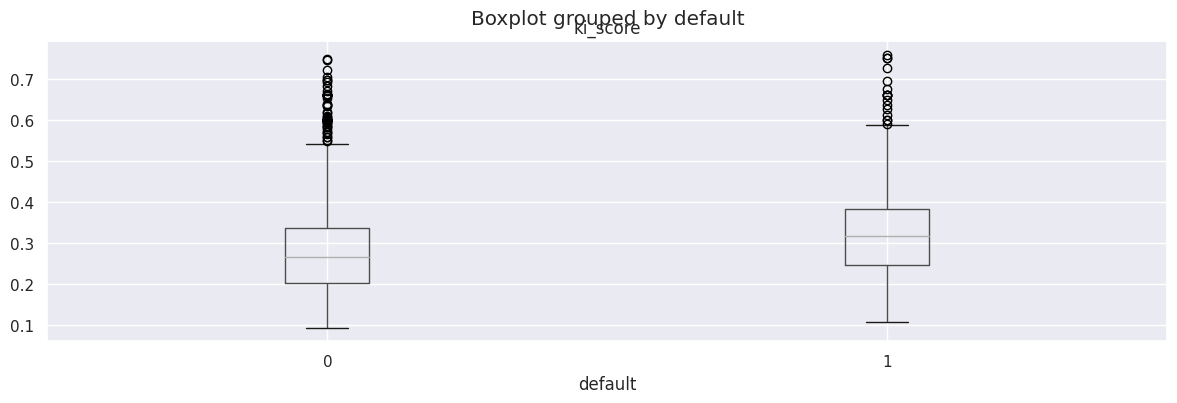

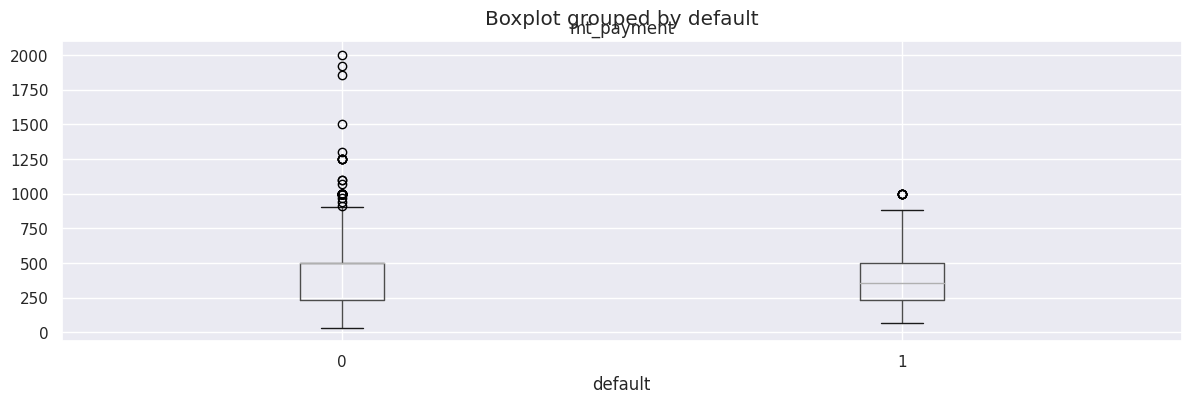

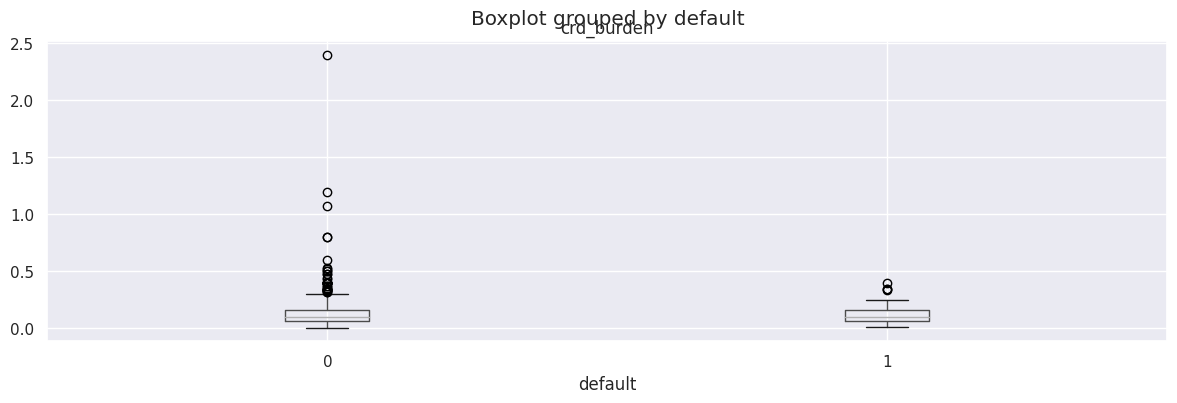

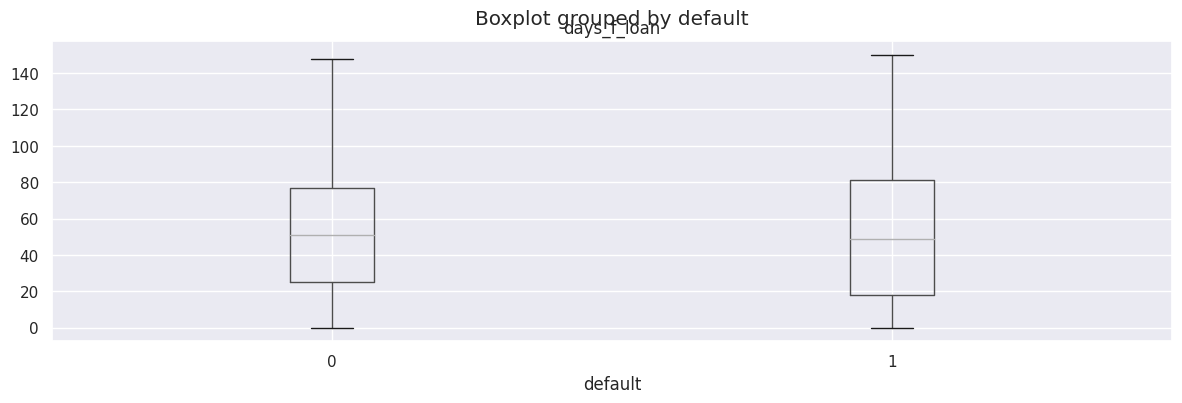

In [ ]:
for i in numeric_columns:
  loan_data.boxplot(column=i, by='default', ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None)

**Boxplot Analysis:**
not something that would obviusly help us to diffirentiate results.  

- **Default Group:** ***lower*** values for
    - Credit burden
    - Monthly payment
    - Age
    - Issued amount

- **Default Group:** ***higher*** values for
    - KI score

<ipython-input-33-5f60aa6e1fb8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_m = loan_data.corr() #Correlation matrix


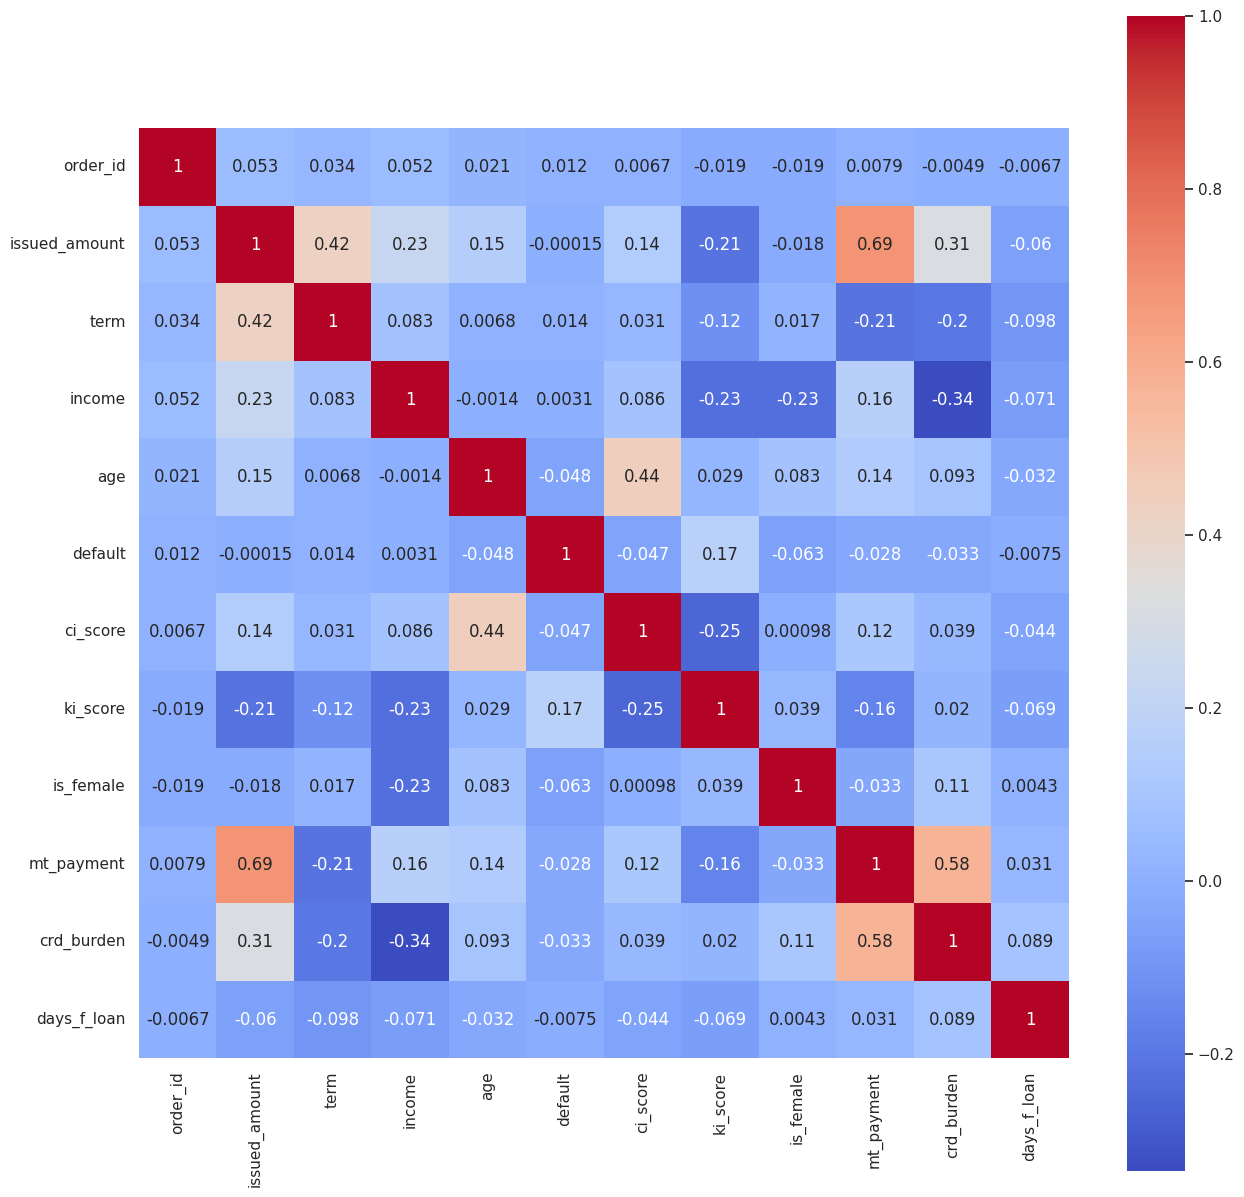

In [ ]:
corr_m = loan_data.corr() #Correlation matrix

plt.figure(figsize = (15,15))
sns.heatmap(corr_m, square = True, annot = True, cmap='coolwarm')# draw a heatmap

plt.show()

**Explanatory Observations:**

- **Default and KI Score:** There is a weak positive correlation between default and KI score. This means that as KI score increases, the likelihood of default also tends to increase.

- **Gender and Income/Credit Burden:** Females tend to have lower incomes and higher credit burdens compared to males. This is likely due to systemic factors such as the gender pay gap and discrimination in lending practices.

- **Loan Characteristics:** Issued amount has a moderate correlation with both term and income. This is logical, as borrowers with higher incomes are more likely to qualify for larger loans and longer terms. Sum of payments per month has a weak correlation with income, indicating that borrowers with higher incomes may not necessarily have higher monthly payments.

- **Age and Credit Scores:** Age has a moderate positive correlation with CI score. This suggests that older borrowers tend to have higher CI scores, which may reflect their longer credit histories and more established financial profiles. Age also has a weak positive correlation with the sum of issued money, indicating that older borrowers may have taken out more loans over time.

- **CI Score and Credit Characteristics:** CI score has a moderate correlation with age, suggesting that older borrowers tend to have higher CI scores. It also has a weak correlation with issued amount, indicating that borrowers with higher CI scores may be more likely to qualify for larger loans. Interestingly, CI score has a negative weak correlation with KI score. This means that borrowers with higher CI scores tend to have lower KI scores, which may be due to differences in the factors considered by each scoring model.

- **KI Score and Monthly Payment:** KI score has a weak negative correlation with monthly payment. This suggests that borrowers with higher KI scores may have lower monthly payments, which could be due to factors such as lower interest rates or longer loan terms.

**Note:**

- CI score appears to have a preference for age, despite its weak correlation with default.
- KI score has a weak positive correlation with default, despite its negative correlation with CI score. This highlights the complexity of the relationship between credit scores and default risk.

### Sales_date and number and sum of sales

As we have observed in our previous analysis, Sunday and Saturday do not seem to impact a customer's propensity to borrow money.

Perhaps we could gain a deeper understanding by examining the data on a day-by-day and week-by-week basis. This might provide us with clearer insights, and allow us to view the situation from a different perspective.


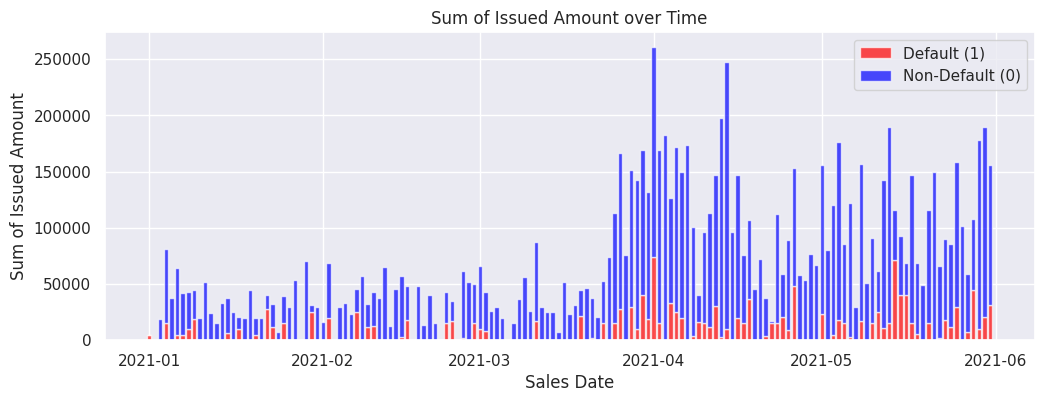

In [ ]:
# Make a pivot table to see it in sum
loan_sum_dt = pd.pivot_table(data = loan_data, index = 'sales_date', columns= 'default', values = 'issued_amount', aggfunc= 'sum', fill_value=0 )

# Plot the sum of defaults
plt.figure(figsize=(12, 4))
plt.bar(loan_sum_dt.index, loan_sum_dt[1],
        alpha=0.7,  # Transparency
        color='red', label='Default (1)') #label default with red sign
plt.bar(loan_sum_dt.index, loan_sum_dt[0], bottom=loan_sum_dt[1],
        alpha=0.7,  # Transparency
        color='blue', label='Non-Default (0)')

# Add labels and title
plt.xlabel('Sales Date')
plt.ylabel('Sum of Issued Amount')
plt.title('Sum of Issued Amount over Time')

# Add legend
plt.legend()

# Show the plot
plt.show()

It appears that in the last two months there has been a growing number of sales while the default rates have remained relatively constant. This might indicate increased efficiency in the sales and marketing teams, resulting in more successful loan transactions.

However, there may be other factors at play. One possibility we should consider is our customer churn rate. If customers are taking out loans but then transferring to another bank after two months for a better interest rate, that could impact our analysis.

It's important to note that our current data only includes active loans. If we want to consider those who have already paid off their loans, we might need to adjust our SQL script accordingly.

There could also be a combination of these factors affecting our findings. Thus, further analysis is required to make a comprehensive conclusion.

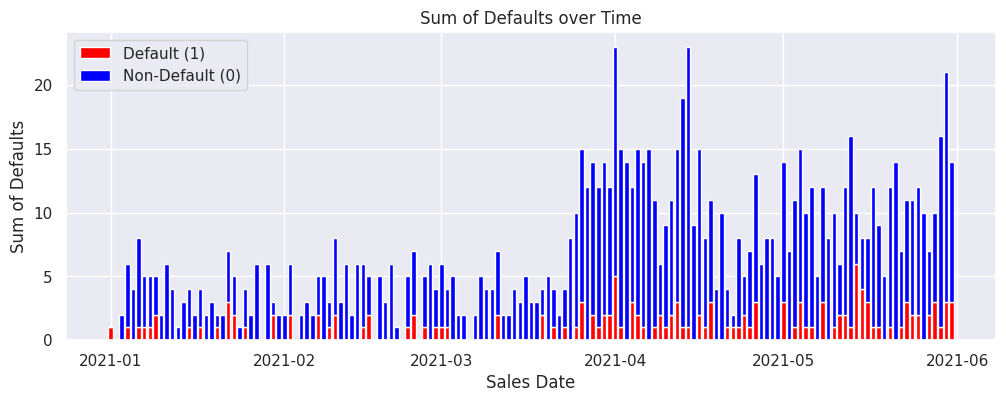

In [ ]:
#Quantative method
# Separate defaults labeled as 0 and 1
sum_defaults = (loan_data.groupby(['sales_date', 'default'])
                        .size()
                        .unstack()
                        .fillna(0))

# Plot the sum of defaults
plt.figure(figsize=(12, 4))
plt.bar(sum_defaults.index, sum_defaults[1], color='red', label='Default (1)') #label default with red sign
plt.bar(sum_defaults.index, sum_defaults[0], bottom=sum_defaults[1], color='blue', label='Non-Default (0)')

# Add labels and title
plt.xlabel('Sales Date')
plt.ylabel('Sum of Defaults')
plt.title('Sum of Defaults over Time')

# Add legend
plt.legend()

# Show the plot
plt.show()

When we create the same visualization but in a quantitative manner, we see a similar trend. There appears to be a significant increase in sales beginning at the end of March.

As before, there may be several possible explanations for this - one being that our sales team's performance has improved dramatically since then.

Alternatively, it's possible that the same issues highlighted previously (such as customer churn rate or inaccurate database entries due to only considering active loans) affect how we interpret this trend. We need to invest further and consider these factors in our analysis.

<Figure size 1000x400 with 0 Axes>

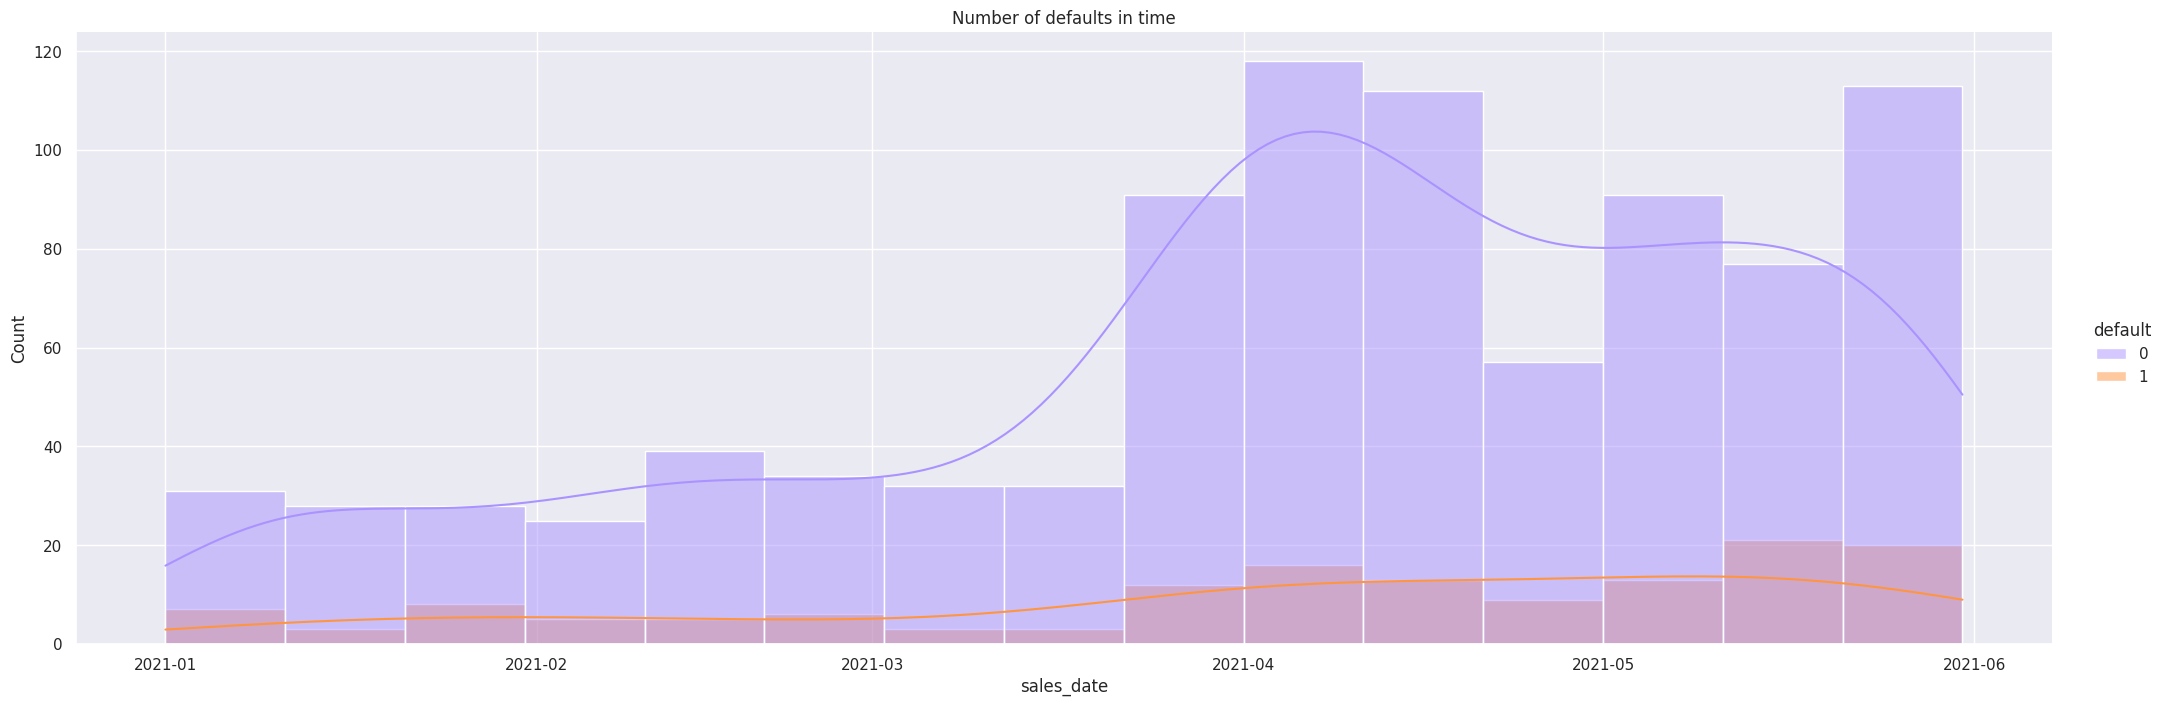

In [ ]:
# lets group number of defaults and other loans
plt.figure(figsize=(10, 4))
sns.displot(x=loan_data['sales_date'], hue="default", data=loan_data, kde=True, height=7, aspect=3, palette= custom_palette)
# Add legend
plt.title('Number of defaults in time')
# Show the plot
plt.show();

From the observations, it can be seen that Sunday and Saturday do not deter customers from borrowing money. It may be useful to consider the data in a different context, such as daily and weekly trends.

For the past two months, sales have been on an upward trajectory whereas default levels have maintained consistency. This could be a reflection of more successful marketing strategies or the possibility of customers switching to other banks after a couple of months. The data includes only active loans, meaning an adjustment in the SQL script might be necessary to account for completed loans.

Examining the same data quantitatively, a surge in sales is noticeable from the end of March. However, this could also be influenced by the same factors mentioned earlier.

Additionally, considering the Kernel Density Estimate (KDE - represented by the orange line) and another metric (represented by the blue line), it is observed that while the KDE is slightly high for May and June, the blue line indicates a downward trend from April onwards. Further investigation into metrics such as the number of days since the loan was issued might provide more insight. However, the correlation isn't strong enough to make definitive conclusions.

<Figure size 1000x400 with 0 Axes>

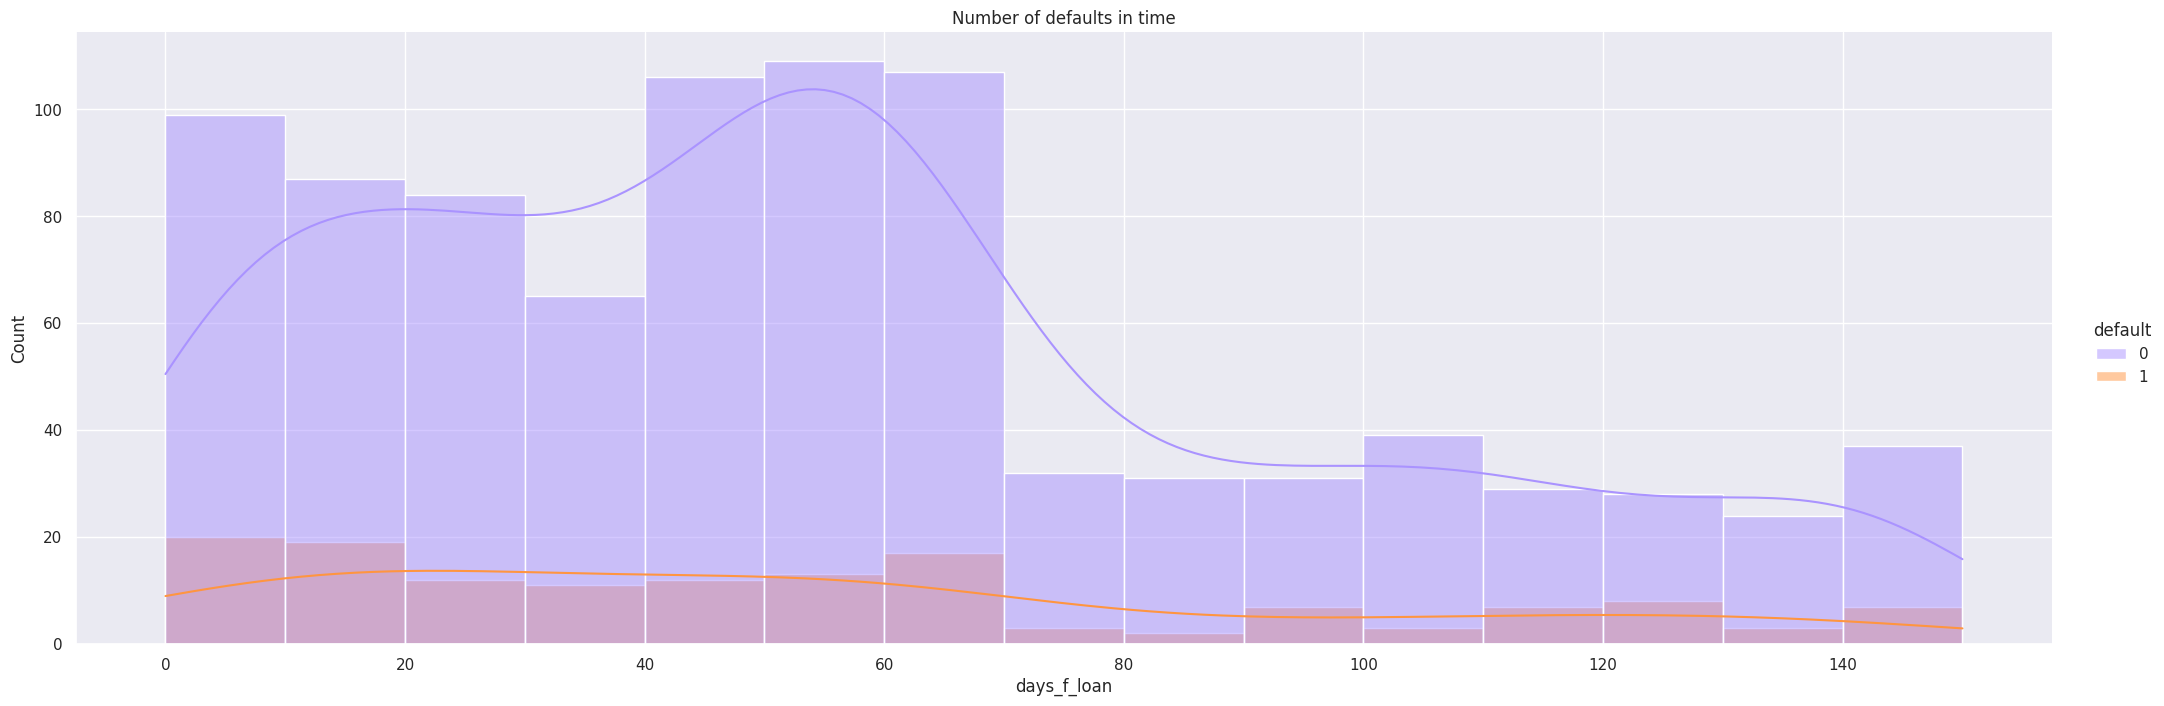

In [ ]:
# default level and days from loan
plt.figure(figsize=(10, 4))
sns.displot(x=loan_data['days_f_loan'], hue="default", data=loan_data, kde=True, height=7, aspect=3, palette= custom_palette)
# Add legend
plt.title('Number of defaults in time')
# Show the plot
plt.show();

This is kinda inversive model of previous data. And hard to say something else.

<Figure size 1200x400 with 0 Axes>

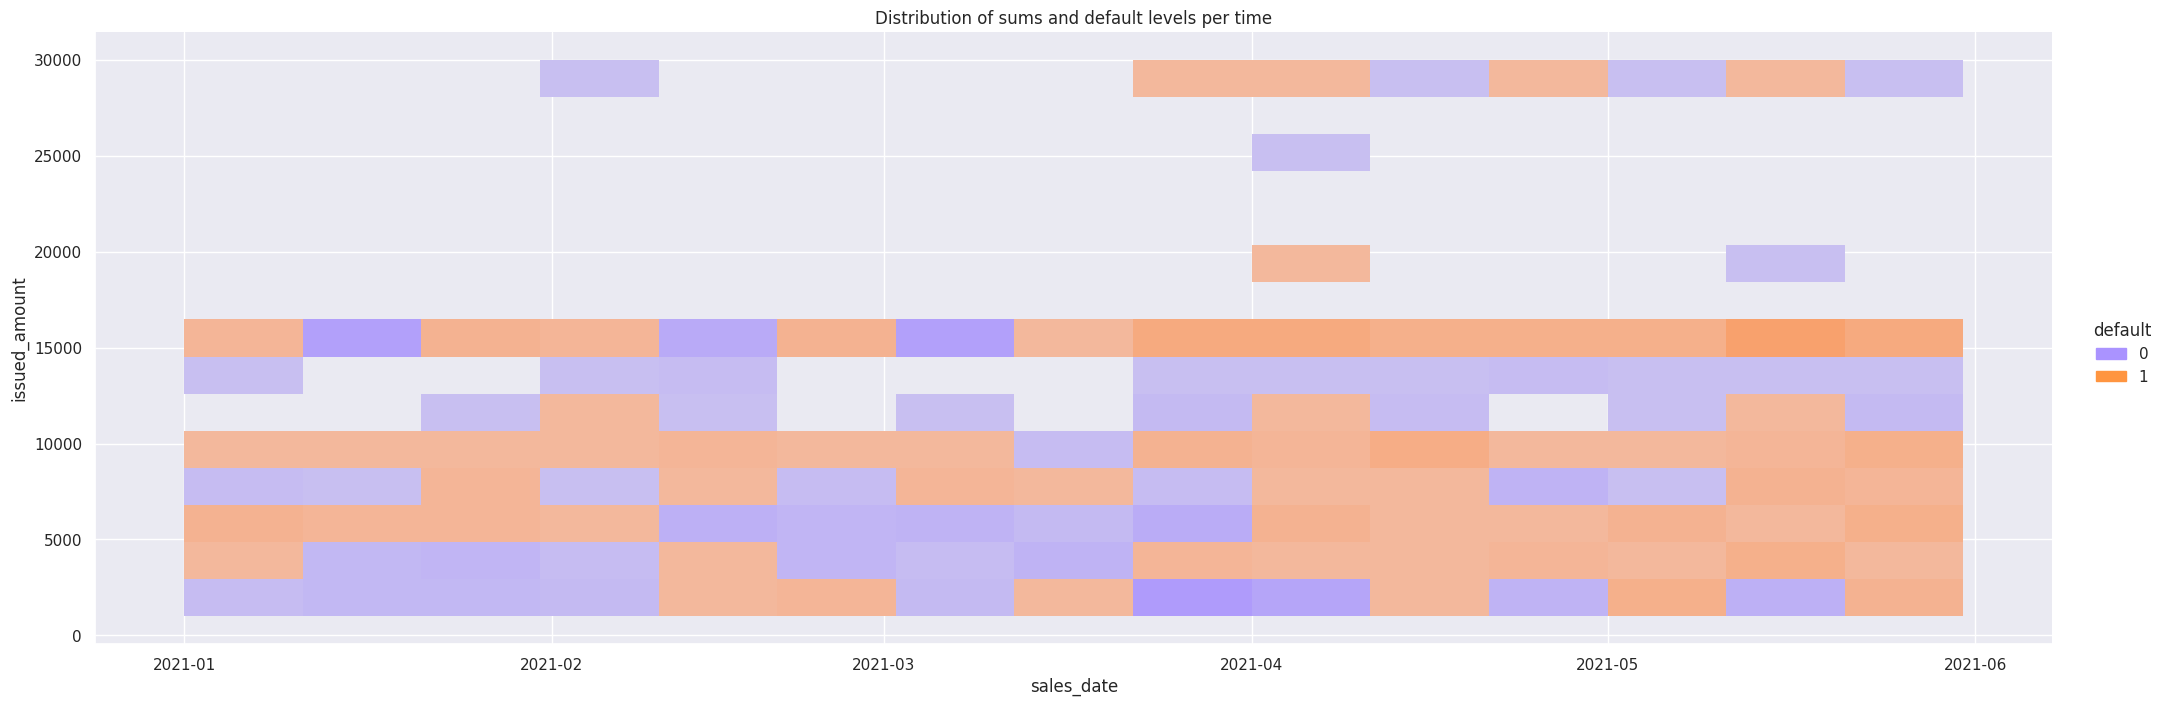

In [ ]:
plt.figure(figsize=(12, 4))
sns.displot(x=loan_data['sales_date'],  y=loan_data['issued_amount'], hue="default", data=loan_data,
            #kde=True,
            height=7, aspect=3, palette= custom_palette)
plt.title('Distribution of sums and default levels per time')
plt.show();

It's noted that a large fraction of people tend to borrow exactly 15,000 USD, which also coincides with a high default rate at this specific loan amount. Conversely, at slightly lower amounts, say 14,000 USD, the default rate drops significantly. However, this could simply be a matter of chance.

Yet, it can't be conclusively stated that the borrowed sum has a strong influence on the default level. The relationship may exist, but it doesn't appear to be particularly robust based on the current data and analysis.

## Day of week

In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

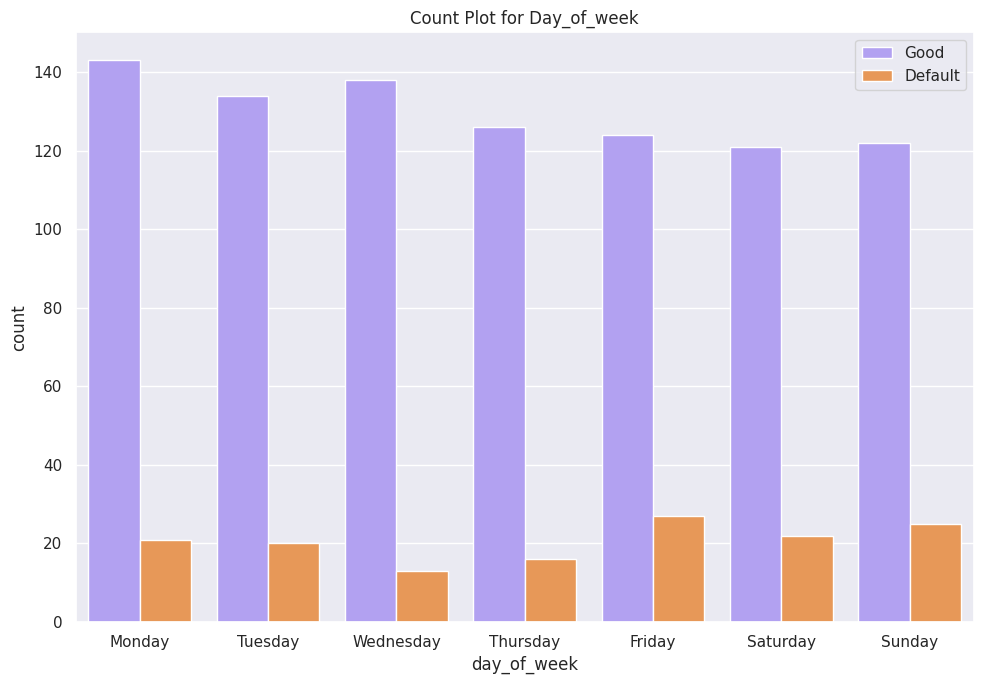

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
sns.countplot(x='day_of_week', data=loan_data,
               order = day_order, hue='default', palette = custom_palette
)#,ax = "Axes: title={'center': 'Count Plot for day_of_week'}, xlabel='day_of_week', ylabel='count'")
plt.title(f'Count Plot for Day_of_week')
plt.legend(['Good', 'Default'])

plt.tight_layout()
plt.show()

In [ ]:
loan_data.groupby('day_of_week')['default'].agg(['count', 'sum', 'mean']).reindex(day_order)

count  sum      mean
day_of_week                      
Monday         164   21  0.128049
Tuesday        154   20  0.129870
Wednesday      151   13  0.086093
Thursday       142   16  0.112676
Friday         151   27  0.178808
Saturday       143   22  0.153846
Sunday         147   25  0.170068

**Wednesday: Less Default**

- Wednesday has a similar number of customers as Friday and close numbers as Monday.
- However, Wednesday has a lower default rate 8,6% compared to Monday 12,8% and Friday 17,9%.

**Weekend: Unusual Customer Patterns**

- Saturday and Sunday have a similar number of customers as other days.
- This observation is unexpected, as weekends typically have higher customer traffic.


## Products research

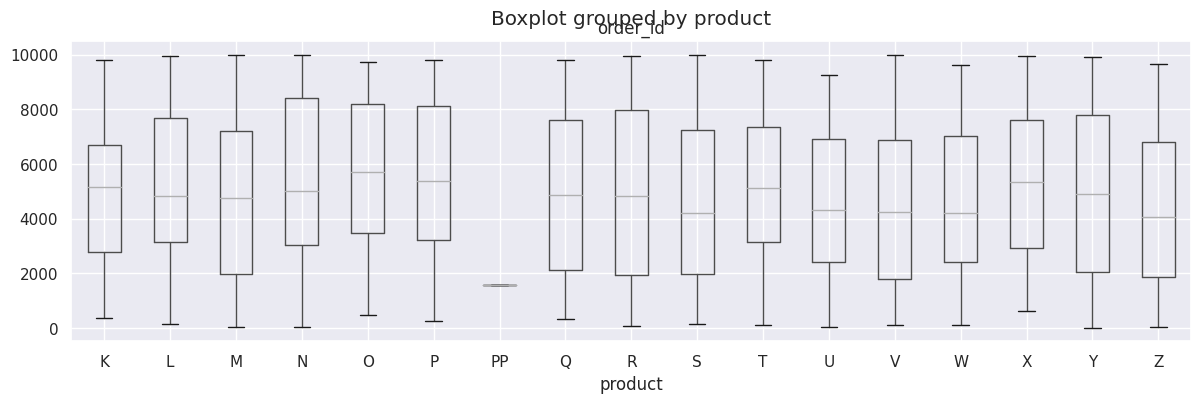

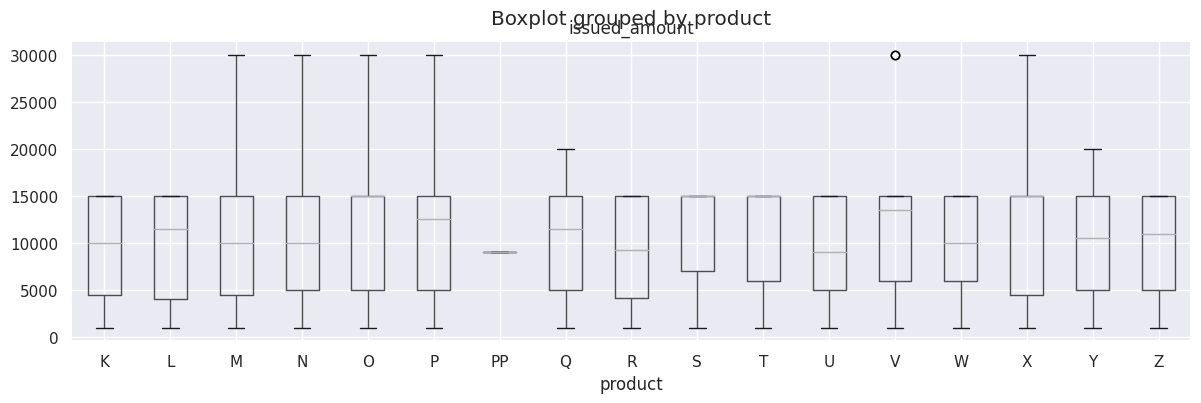

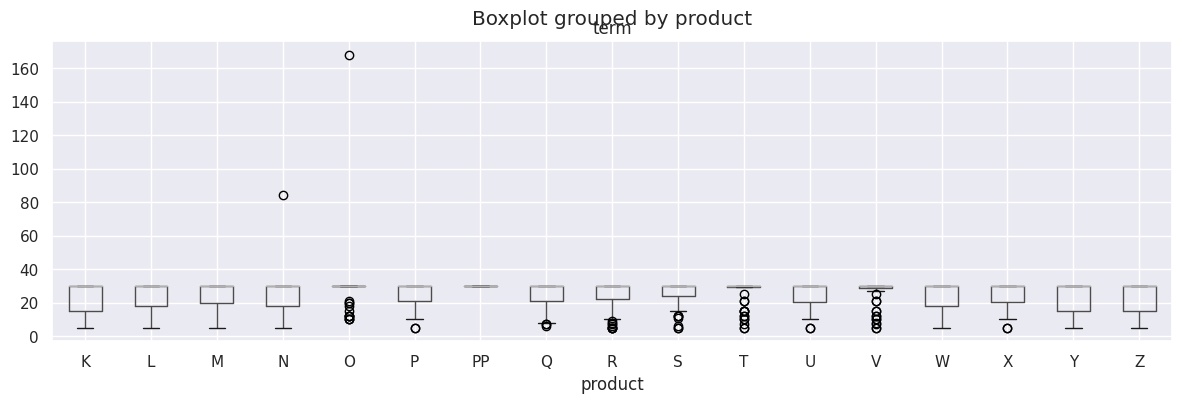

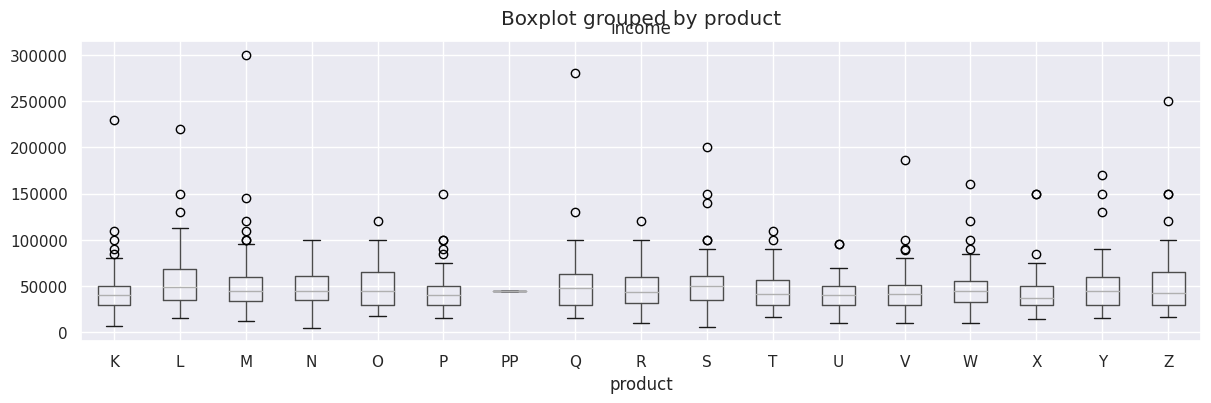

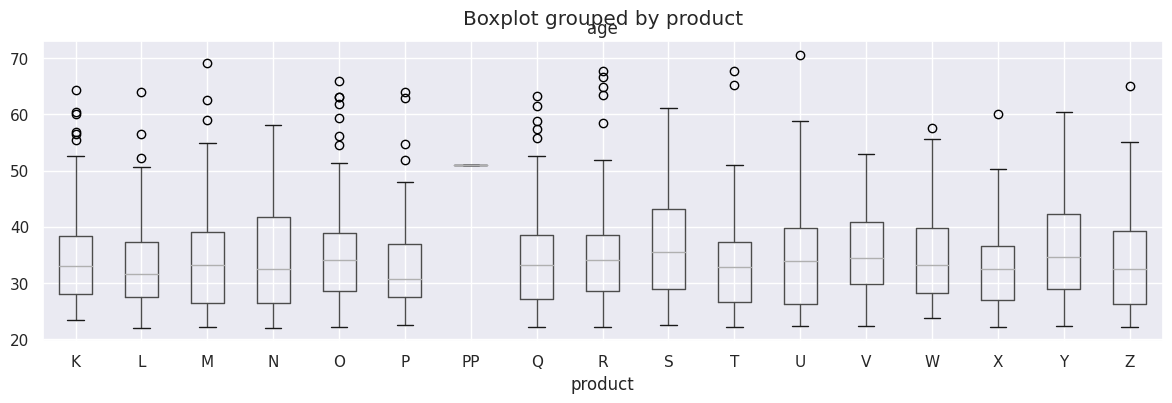

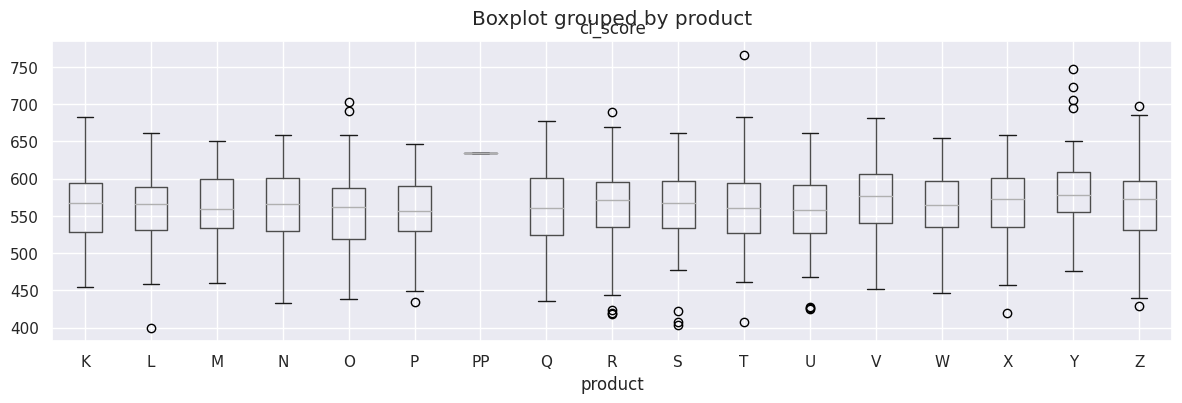

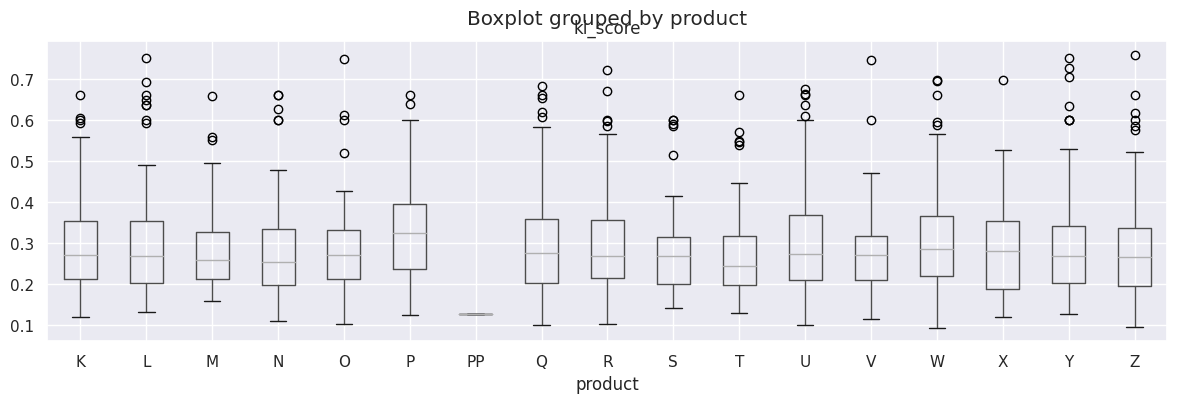

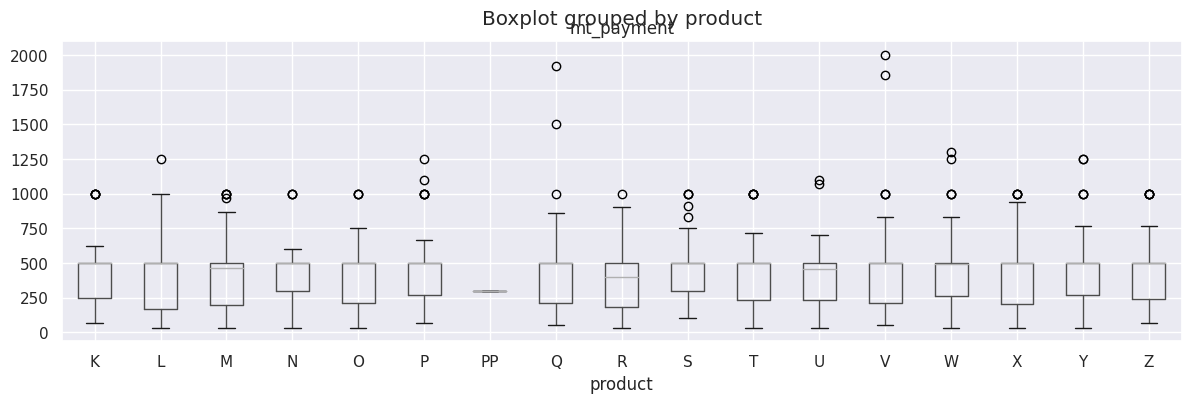

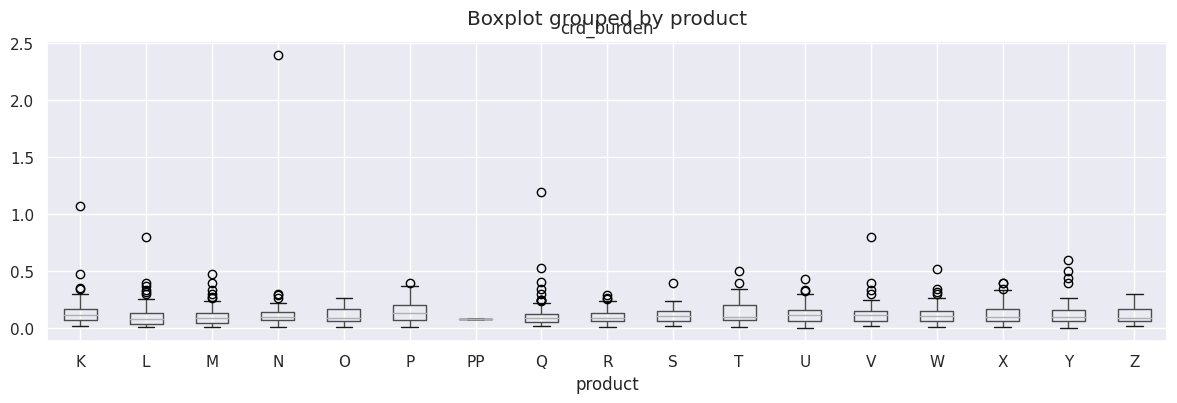

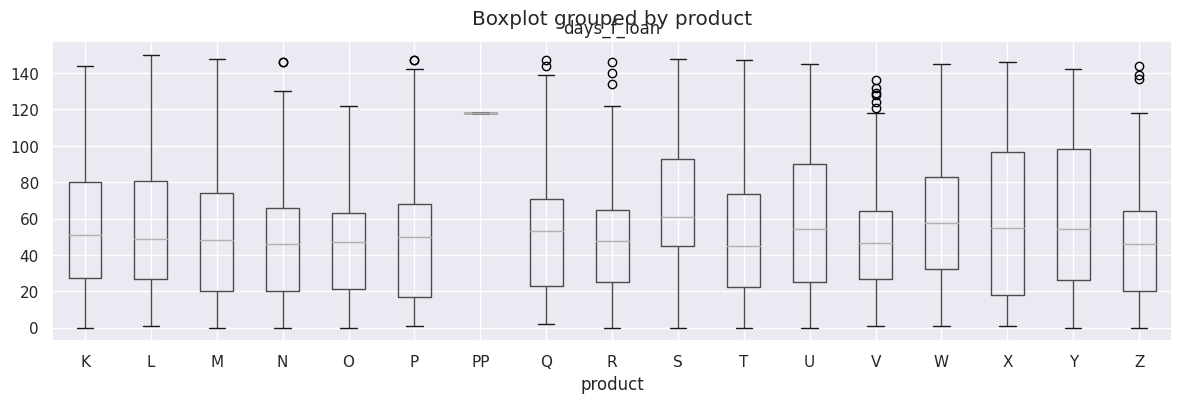

In [ ]:
# Products research in numeric
for i in numeric_columns:
  loan_data.boxplot(column=i, by='product', ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None)

**Product Differences:**
Upon reviewing the data, it's noticeable that there isn't a significant variation across the different products. It remains challenging to identify the specific purpose for which certain products are employed, such as financing iPhones or cars. It appears that products M, N, O, P, X, and to some extent V and Q, Y, issue loans ranging up to a quarter of 30,000 USD.

**Loan Amounts:**
Interestingly, every product offering starts from the same base amount of 1,000 USD. This seems rather low given the types of loans one might anticipate, such as a mortgage. Additionally, approximately 25% of all products fall within the 1,000 to 5,000 USD range, which is a surprising observation.

**Loan Terms:**
Looking at the terms associated with these products, there are some peculiarities. Specifically, products N and O are outliers with lengthy terms of 82 and 168 months respectively.

**Income Analysis:**
In terms of income, the mean values for each product are included within the boxplots of the other products. It does not appear feasible, based on this data, to assert that some products preferentially target either low or high-income individuals.


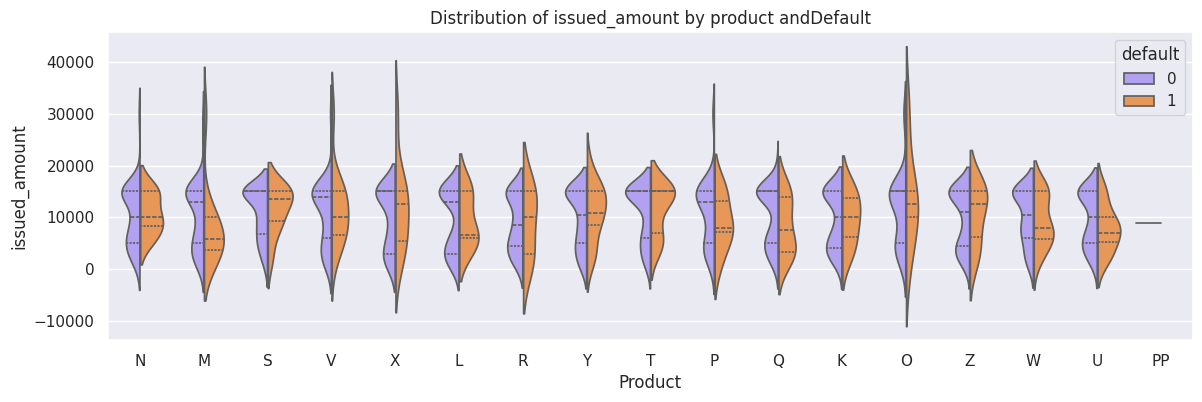

In [ ]:
sns.violinplot(data=loan_data,
               x = "product",
               y = 'issued_amount',
               hue =  'default', #
               gap = 0.03,
               split = True, #in one violin
               palette = custom_palette,
               inner = "quart") #show qartile

#Add labels and title
plt.xlabel("Product")
plt.ylabel('issued_amount')
plt.title('Distribution of issued_amount by product andDefault')

plt.show()

**Observations on Product, Issued Amount, and Default**

Upon analyzing the relationship between product, issued amount, and default status, we observe some differences:

For products **M, L, Q, U, and P**, the median of issued amounts is below the median for products without default. However, it's essential to note that we have a small sample size of 15-20 observations, which may not be representative of all products. Drawing hasty conclusions based on such limited data is not advisable, especially considering that all products have been sampled with the same issued amount. Therefore, further in-depth analysis and statistical validation are warranted to investigate this matter thoroughly.


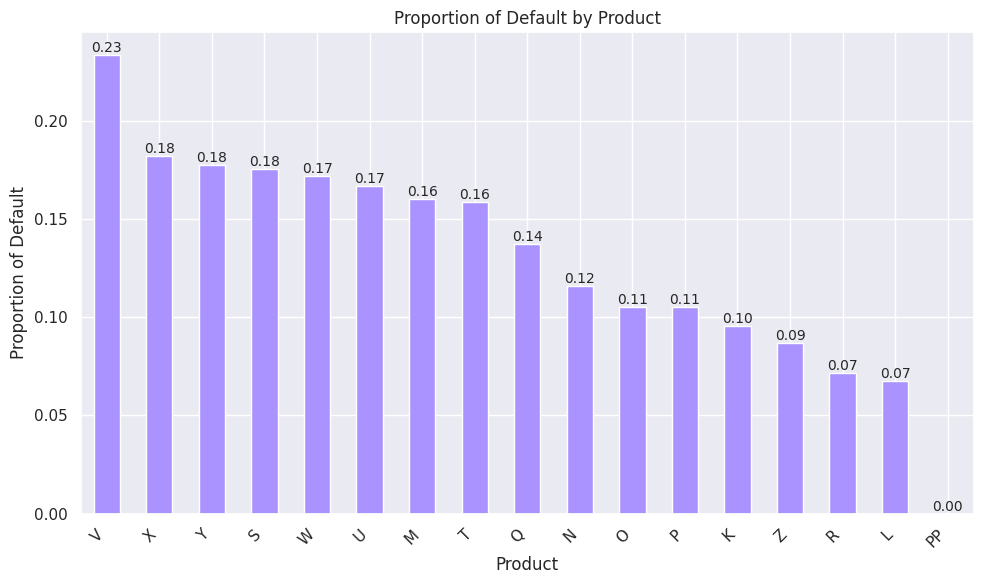

In [ ]:
# Group by product and calculate the mean of 'default' (proportion of default)
product_default_mean = loan_data.groupby('product')['default'].mean()

# Sort products based on proportion of default
product_default_mean_sorted = product_default_mean.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))

# Bar chart
product_default_mean_sorted.plot(kind='bar', color="#aa93ff")
plt.title('Proportion of Default by Product')
plt.xlabel('Product')
plt.ylabel('Proportion of Default')
plt.xticks(rotation=45, ha='right')
# Annotate bars with proportion values
for i, v in enumerate(product_default_mean_sorted):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


We observe that currently, some products (e.g., V) are more prone to default, suggesting a higher risk associated with them. It would be prudent to consider this factor in our decision-making process. Additionally, utilizing 1000 results for analysis seems adequate. But maybe better to take more into full analysis.  
We can conduct further statistical studies to define the interest rates for these products based on their default risk.

Furthermore, products Z, R, and L have a default chance of less than 10%, indicating a lower risk associated with them.

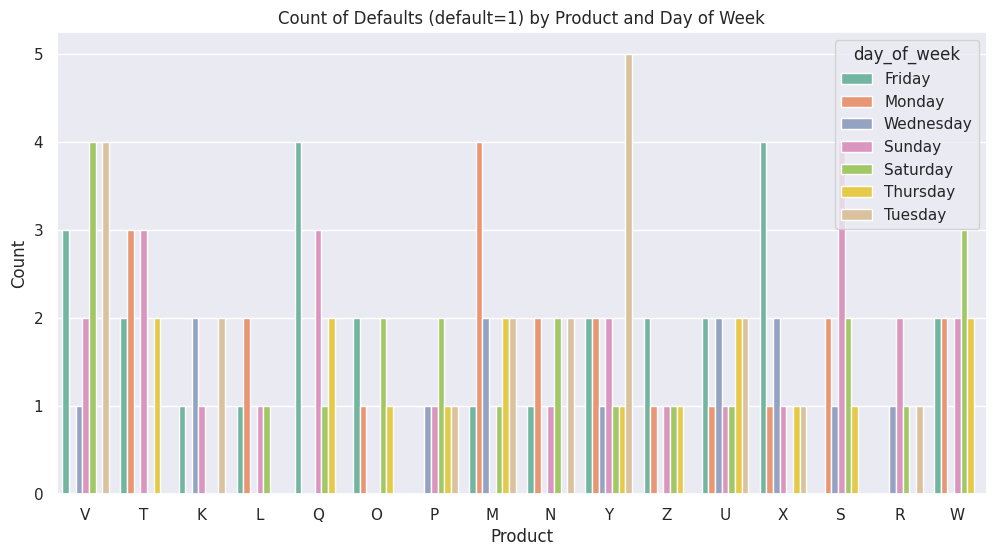

In [ ]:
# Filter the DataFrame for default == 1
default_1_data = loan_data[loan_data['default'] == 1]

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the count plot
sns.countplot(x='product', hue='day_of_week', data=default_1_data, palette='Set2')

# Add a title and labels
plt.title('Count of Defaults (default=1) by Product and Day of Week')
plt.xlabel('Product')
plt.ylabel('Count')

# Show the plot
plt.show()

We could see that on Tuesday Y and V have more default level. and product X and Q on Friday. But we do not have enought data to say it 100% it should be taken away for significant check.

## Gender Distribution

In [ ]:
#Set size
sns.set(rc={'figure.figsize':(7,7)})

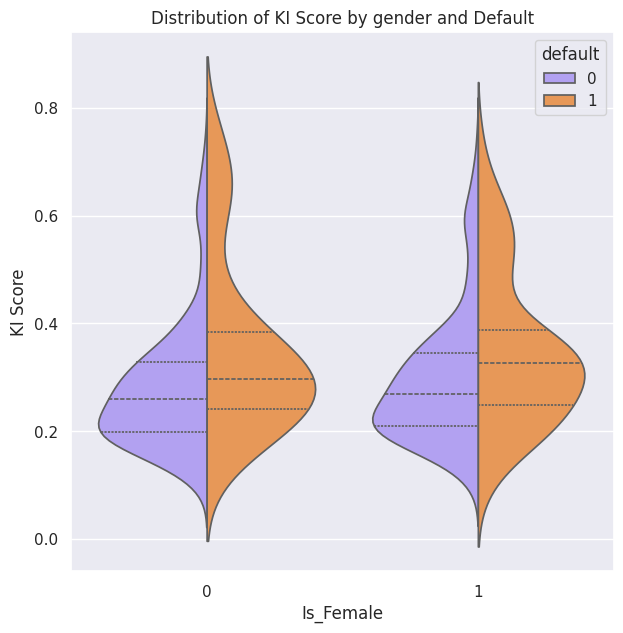

In [ ]:

sns.violinplot(data=loan_data, x = "is_female",
               y = "ki_score",
               hue = "default", #
               split = True, #in one violin
               palette = custom_palette,
               inner = "quart") #show qartile

# Add labels and title
plt.xlabel('Is_Female')
plt.ylabel('KI Score')
plt.title('Distribution of KI Score by gender and Default')

plt.show()

We observe that the Ki score for both male and female groups tends to increase in the case of default.

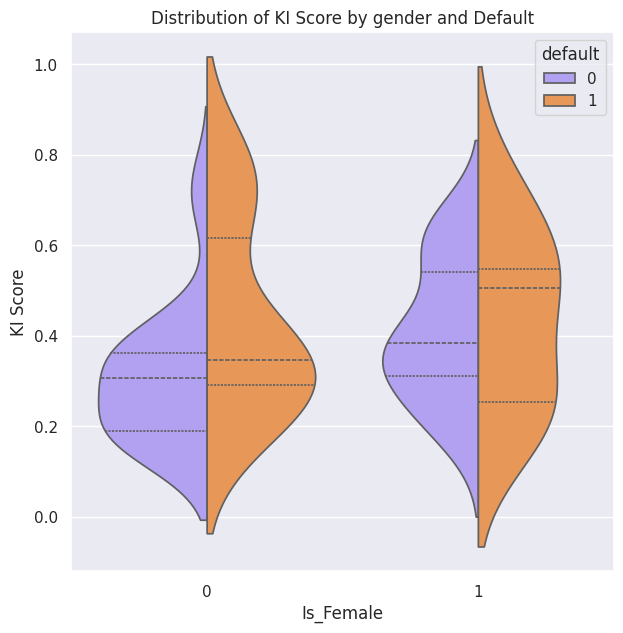

In [ ]:
## If we have null value in income what we could see
sns.violinplot(data=loan_data[loan_data['income'].isnull()], x = "is_female",
               y = "ki_score",
               hue = "default", #
               split = True, #in one violin
               palette = custom_palette,
               inner = "quart") #show qartile

# Add labels and title
plt.xlabel('Is_Female')
plt.ylabel('KI Score')
plt.title('Distribution of KI Score by gender and Default')

plt.show()

Females exhibit a more diverse range of Ki scores when they default, and in some cases, their income information is unavailable.  
Additionally, the upper quartile of Ki scores approaches or crosses the 0.6 borderline in case of default in both groups.

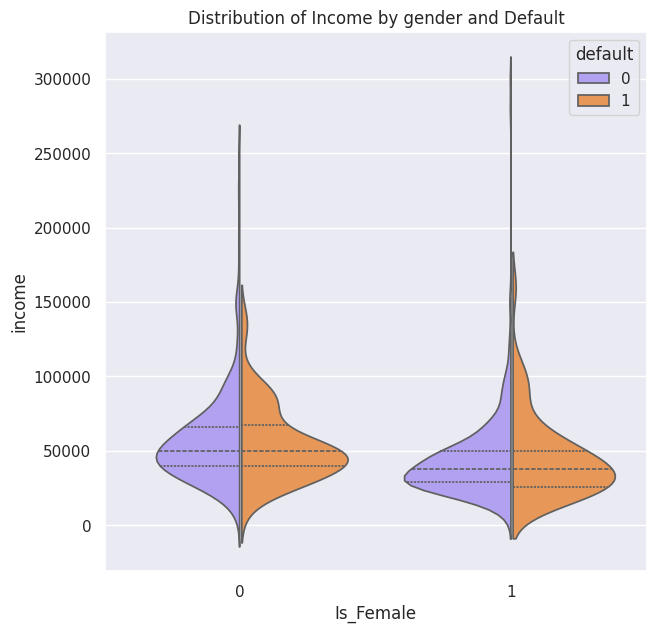

In [ ]:
sns.violinplot(data = loan_data,
               x = "is_female",
               y = "income",
               hue = "default",
               split = True,   #in one violin
               gap = 0.02,
               palette = custom_palette,
               inner = "quart")

# Add labels and title
plt.xlabel('Is_Female')
plt.ylabel('income')
plt.title('Distribution of Income by gender and Default')

plt.show()

We observe that income does not significantly affect the default level in the male group. However, in the female group, the lower quartile of income is slightly lower than that of non-default females.   
Additionally, the median income for females is lower than that of males across all categories.  


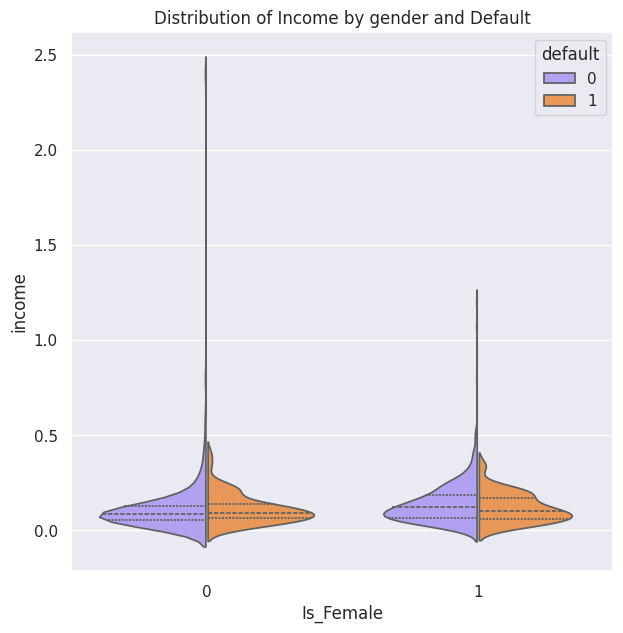

In [ ]:
sns.violinplot(data = loan_data,
               x = "is_female",
               y = "crd_burden",
               hue = "default",
               split = True,   #in one violin
               gap = 0.02,
               palette = custom_palette,
               inner = "quart")

# Add labels and title
plt.xlabel('Is_Female')
plt.ylabel('income')
plt.title('Distribution of Income by gender and Default')

plt.show()

Males have a lower credit burden overall, but it increases slightly in the case of default. Conversely, for females, the situation is the opposite. Given that females typically have lower incomes, their credit burden tends to be higher. However, in the case of default, the median credit burden for females decreases.

While we acknowledge of all these differences, incorporating them into our model could potentially impact our public relations, as it may raise concerns if discovered by someone outside the organization.

## Age and income Distribution

It might be beneficial to consider incorporating some annual income metrics into the analysis. However, before proceeding with that, it could be insightful to identify any interesting groupings within the current data.

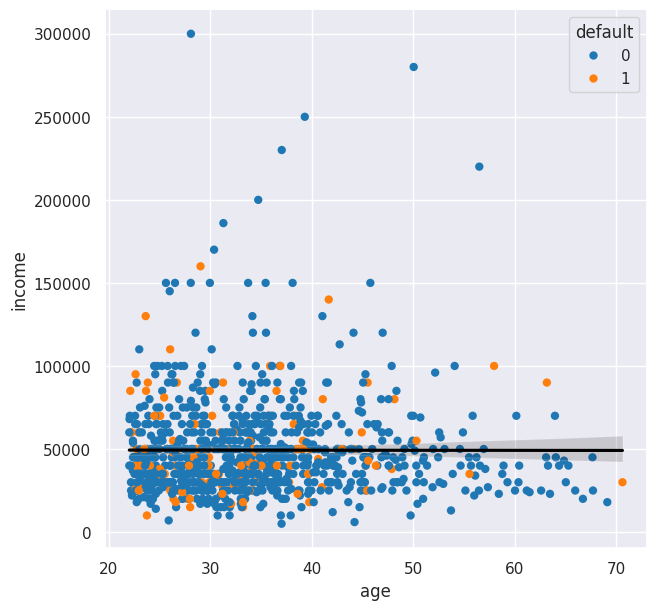

In [ ]:
# maybe we could see age and income curve or correlation and default level
# Play along with different x or y-axis
x_axis = 'age'
y_axis = 'income'
color = 'default'

#very simple plot to explore classification and data inputs
with sns.color_palette("tab10"):
    fig_simple = sns.scatterplot(x = x_axis,
                y = y_axis,
                hue = color,
                linewidth=0,
                data= loan_data)

# Add trendline
sns.regplot(x=x_axis, y=y_axis, data=loan_data, scatter=False, color='black')


plt.show()

Typically, one might anticipate seeing a curve indicating a peak income around the age of 40. However, in this case, the data doesn't suggest that individuals aged 27 earn significantly less than those aged 35 or 45.  
Similarly, when considering the default rates, no particular age group stands out as being specifically prone to defaulting.

# Fixing Null Values

#### Income values

Access to accurate income information is crucial for banking business operations. It informs banks about a customer's capability to repay loans. If such information is missing, it could raises concerns about the processes of the bank's procedures. Income information usually is one of the essential data points in the lending industry.

If this data is unavailable in-house, it could be obtained from external sources for consideration, such as the State Revenue Service (VID), which has payroll data, or the Social Insurance Agency (VSAA), which has information on social benefits. Both these agencies could provide useful insights into a person's financial standing.


In [ ]:
loan_data['income'].isnull().mean()

0.058935361216730035

It is almost 6%. So much.

In [ ]:
loan_data[loan_data['income'].isnull()]['default'].mean()

0.27419354838709675

The data reveals that the default rate doubles when there's no available income data. This raises the question of whether we can restore or retrieve this missing data somehow.

One hypothesis might be that these missing income entries actually represent very low incomes that individuals prefer not to disclose. The substantially higher default rates for this group further support this assumption. Essentially, this lack of income information could be a potential risk indicator.


In [ ]:
# To get any ideas to fill nulls
loan_data[loan_data['income'].isnull()]

order_id sales_date  issued_amount  term  income        age product  \
9         9920 2021-04-12          15000    30     NaN  44.038330       M   
12        9903 2021-01-22           6000    30     NaN  37.656400       V   
18        9819 2021-05-31          15000    30     NaN  36.246407       T   
27        9760 2021-01-01           5000    30     NaN  48.317591       L   
56        9506 2021-04-12           2000    12     NaN  52.219028       L   
...        ...        ...            ...   ...     ...        ...     ...   
966        792 2021-05-23           8000    18     NaN  51.463381       Y   
983        640 2021-01-04          15000    30     NaN  27.107461       P   
996        456 2021-02-12          15000    30     NaN  36.700890       O   
1035       148 2021-03-11          15000    30     NaN  23.504449       Z   
1046        53 2021-03-20          15000    30     NaN  38.896646       M   

      default  ci_score  ki_score  is_female  mt_payment  crd_burden  \
9           0     604.0     0.393          1  500.000000         NaN   
12          1     580.0     0.229          0  200.000000         NaN   
18          1     587.0     0.384          0  500.000000         NaN   
27          1     567.0     0.752          0  166.666667         NaN   
56          0     610.0     0.327          0  166.666667         NaN   
...       ...       ...       ...        ...         ...         ...   
966         1     636.0     0.365          0  444.444444         NaN   
983         0     550.0     0.359          0  500.000000         NaN   
996         0       NaN     0.600          1  500.000000         NaN   
1035        0     550.0     0.318          1  500.000000         NaN   
1046        0     532.0     0.161          0  500.000000         NaN   

      days_f_loan day_of_week  
9              49      Monday  
12            129      Friday  
18              0      Monday  
27            150      Friday  
56             49      Monday  
...           ...         ...  
966             8      Sunday  
983           147      Monday  
996           108      Friday  
1035           81    Thursday  
1046           72    Saturday  

[62 rows x 15 columns]

We can not predict it in a right way.

In [ ]:
# Maybe it is a credit card products, so it could be just few of types
(loan_data[loan_data['income'].isnull()]
  .groupby('product')
  .agg({'default': ['count', 'sum']})
  .sort_values(by = ('default', 'count'))
)


default    
          count sum
product            
N             1   1
K             2   0
P             2   0
T             3   1
X             3   1
L             4   1
M             4   0
O             4   0
Q             4   0
W             4   1
Z             4   2
S             5   1
U             5   1
V             5   3
R             6   0
Y             6   5

The data showcases a slightly higher occurrence of products with missing information, indicating that these are not likely to be credit cards. When it comes to missing income values, products **Y and V** seem to have a higher tendency both for **missing values and defaults** in payments. This could suggest a correlation between non-disclosure of income and higher default risk, at least in the case of these particular products.

In [ ]:
loan_data[loan_data['income']< 20000]['default'].mean()

0.16279069767441862

In [ ]:
loan_data[loan_data['income']< 10000]

order_id sales_date  issued_amount  term  income        age product  \
72       9332 2021-01-07           5000     8  7000.0  25.897331       K   
544      4643 2021-03-24           1000     5  6000.0  44.208077       S   
809      2204 2021-01-21          15000    15  5000.0  37.018480       N   

     default  ci_score  ki_score  is_female  mt_payment  crd_burden  \
72         0     500.0     0.206          1       625.0    1.071429   
544        0     538.0     0.343          1       200.0    0.400000   
809        0     611.0     0.332          0      1000.0    2.400000   

     days_f_loan day_of_week  
72           144    Thursday  
544           68   Wednesday  
809          130    Thursday

Interestingly, the data reveals a smaller percentage of low-income individuals compared to those with no income information. There are a few strategies that could be considered to address this missing data:

- Filling the missing income values with 0.
- Filling the missing income values with 1 to avoid issues in division operations. This could be particularly useful for machine learning algorithms since 1 is significantly lesser than the nearest existing values in the data.
- Creating an additional boolean column to signify the presence of missing income data. This would allow both humans and machines to interpret and process this crucial information more effectively. After adding this boolean flag, one could either:
    - Replace missing income values with 0.
    - Replace missing income values with the mean income value.
    - Leave the income values as missing. This approach might be best suited for methods such as gradient boosting that can handle missing values.

Deleting entries with missing income data isn't recommended as this would result in losing significant information.

Among these options, creating a boolean column and then deciding how to handle the actual missing values is the approach that appears most convenient to me.

In [ ]:
# So lets make it boolean and fill in 100%
loan_data['income_exists'] = ~loan_data['income'].isna()

In [ ]:
 #fill na according to the 3.1  choice
loan_data['income'].fillna(value=0, inplace=True)

#and update of burden information I didn't seen any helpful information.
loan_data['crd_burden'].fillna(value=0, inplace=True)

In [ ]:
#3.2 choice
#loan_data['income'].fillna(value=(loan_data['income'].mean()), inplace=True) #fill na according to the 3rd choice

#and update of burden information I didn't seen any helpful information.
#loan_data['crd_burden'] = (loan_data['mt_payment']/
#                              (loan_data['income']/12))

#### ci_score values

Before proceeding to impute data into the null values, it's important to evaluate the necessity of the data.

In [ ]:
loan_data['ci_score'].isnull().mean()

0.024714828897338403

Approximately 2.5% of the CI_Score is null. The decision to impute these null values should be guided by how critical the data is and whether we can derive meaningful insights from the available data.

In [ ]:
loan_data.loc[loan_data['ci_score'].isnull(), 'default'].mean()

0.23076923076923078

The data suggests that the lack of income information tends to correlate with an increase in the default level. While imputing missing values can affect the results, it's important to consider the potential bias that could be introduced by the missing data itself.

However, if this missing value pattern holds critical information (in this case, an increased likelihood of defaulting), filling in these gaps might not be necessary. Instead, recognizing this pattern becomes an integral part of the analysis.

# Comparing ci_score and ki_score

Before proceeding to impute data into the null values, it's important to evaluate the necessity of the data. Approximately 2.5% of the CI_Score is null. The decision to impute these null values should be guided by how critical the data is and whether we can derive meaningful insights from the available data.

In [ ]:
ln_dt_cut = loan_data[loan_data['ci_score'].notnull()] #we should cut of null values, but not not fill in if we want to get real data

The CI_Score data generally follows a normal distribution, whereas the KI_Score is skewed to the right. Despite this skewness, KI_Score can still provide valuable insights for predictions. To confirm normality, a Q-Q plot, which compares sample quantiles with theoretical quantiles of a normal distribution, can be used.

In [ ]:
ln_dt_cut.ci_score

0       602.0
1       534.0
2       620.0
3       567.0
4       543.0
        ...  
1047    474.0
1048    526.0
1049    577.0
1050    545.0
1051    533.0
Name: ci_score, Length: 1026, dtype: float64

In [ ]:
from scipy.stats import anderson
result = anderson(ln_dt_cut.ci_score)
result

AndersonResult(statistic=2.0619851425592515, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=563.4619883040936, scale=53.14854487184018)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

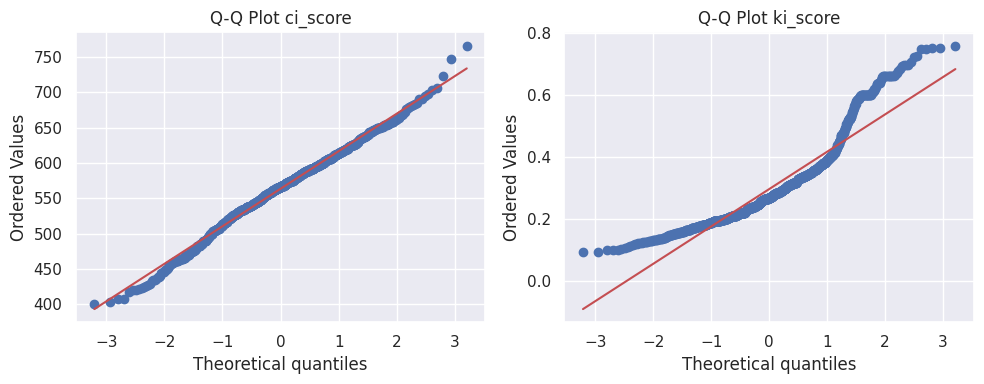

In [ ]:
# Visual inspection
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
stats.probplot(ln_dt_cut['ci_score'], dist="norm", plot=plt)
plt.title('Q-Q Plot ci_score')

plt.subplot(1, 2, 2)
stats.probplot(loan_data['ki_score'], dist="norm", plot=plt)
plt.title('Q-Q Plot ki_score')

plt.tight_layout()
plt.show()



From the Q-Q plot, we can infer that the CI_Score closely resembles a normal distribution. However, the KI_Score deviates significantly from normality, given its dissimilarity to the theoretical quantiles of a normal distribution in the Q-Q plot.

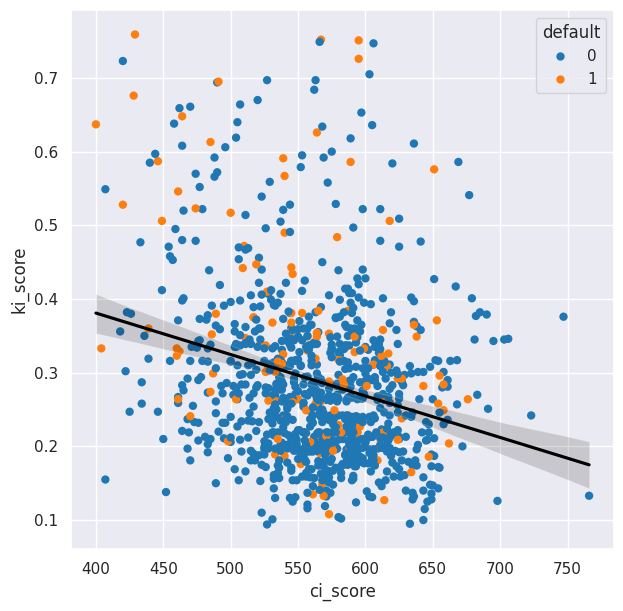

In [ ]:
# We can also seperately plot one or two variables against each other
# Play along with different x or y-axis
x_axis = 'ci_score'
y_axis = 'ki_score'
color = 'default'

#very simple plot to explore classification and data inputs
with sns.color_palette("tab10"):
    fig_simple = sns.scatterplot(x = x_axis,
                y = y_axis,
                hue = color,
                linewidth=0,
                data= ln_dt_cut)

# Add trendline
sns.regplot(x=x_axis, y=y_axis, data=ln_dt_cut, scatter=False, color='black')


plt.show()

The near-horizontal trend line indicates a weak correlation between the two scores. This suggests that changes in one variable are not consistently associated with changes in the other.

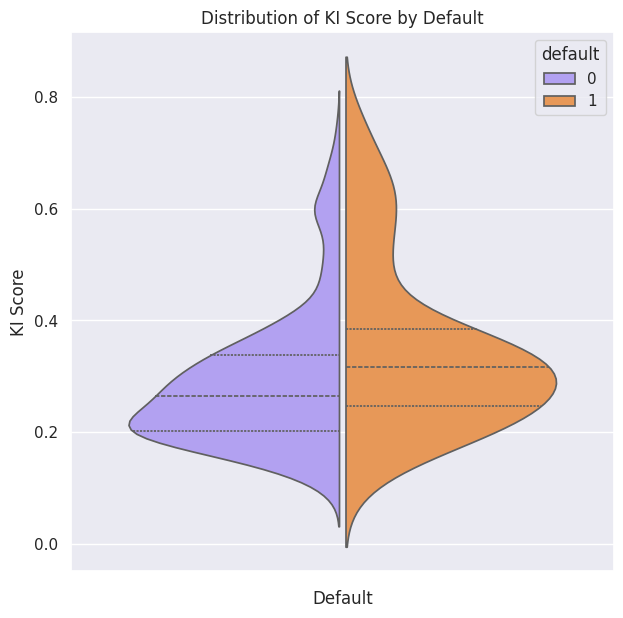

In [ ]:

sns.violinplot(data=loan_data, # x = "default",
               y = "ki_score",
               hue =  "default", #
               gap = 0.03,
               split = True, #in one violin
               palette = custom_palette,
               inner = "quart") #show qartile

# Add labels and title
plt.xlabel('Default')
plt.ylabel('KI Score')
plt.title('Distribution of KI Score by Default')

plt.show()

We observe that the median of default customers is closer to the upper quartile of non-default customers. Additionally, the **highest quartile** of default customers tends to have scores **closer to 0.4.**

In [ ]:
loan_data[loan_data['ki_score']<0.2]['default'].value_counts(True)

0    0.929825
1    0.070175
Name: default, dtype: float64

Even low numbers in ki score still keeps default data

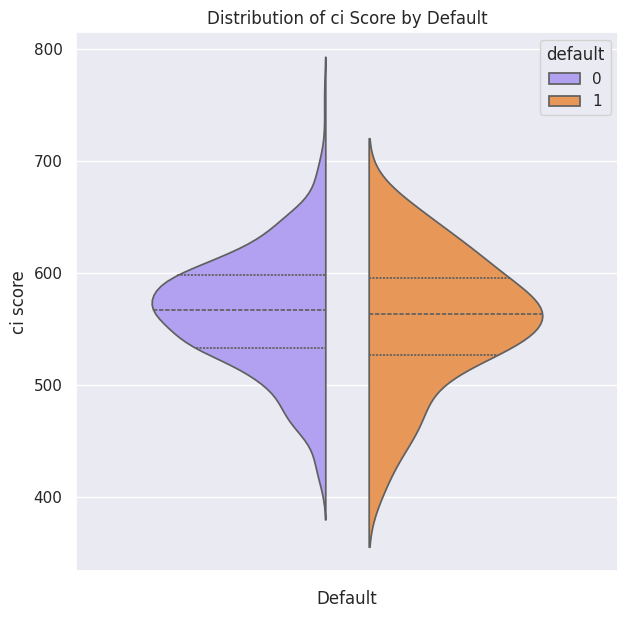

In [ ]:
sns.violinplot(data=loan_data,
               y = "ci_score",
               hue = "default", #
               gap = 0.2,
               split = True, #in one violin
               palette = custom_palette,
               inner = "quart") #show qartile

# Add labels and title
plt.xlabel('Default')
plt.ylabel('ci score')
plt.title('Distribution of ci Score by Default')

plt.show()


As we already see results of Pearson correlation, but is it not fully seautable for non normally distributed variables. So best way is to use:  
**Spearman's Rank Correlation Coefficient:** This is a non-parametric measure of rank correlation. It assesses how well the relationship between two variables can be described using a monotonic function. It does not assume any specific distribution for the variables and is suitable for ordinal or non-normally distributed data.  
**Point-Biserial Correlation:** This is a special case of the Pearson correlation coefficient used when one variable is dichotomous (binary) and the other is continuous. (but for normally distributed) Just in case.


In [ ]:

# Calculate Spearman's correlation
spearman_corr_ci = stats.spearmanr(ln_dt_cut['default'], ln_dt_cut['ci_score'])
spearman_corr_ki = stats.spearmanr(ln_dt_cut['default'], ln_dt_cut['ki_score'])

print("Spearman's correlation (ci_score):", spearman_corr_ci)
print("Spearman's correlation (ki_score):", spearman_corr_ki)


# Calculate Point-Biserial correlation
point_biserial_corr_ci = stats.pointbiserialr(ln_dt_cut['default'], ln_dt_cut['ci_score'])
point_biserial_corr_ki = stats.pointbiserialr(ln_dt_cut['default'], ln_dt_cut['ki_score'])

print("Point-Biserial correlation (ci_score):", point_biserial_corr_ci)
print("Point-Biserial correlation (ki_score):", point_biserial_corr_ki)


Spearman's correlation (ci_score): SignificanceResult(statistic=-0.03201707035116518, pvalue=0.3055714056948667)
Spearman's correlation (ki_score): SignificanceResult(statistic=0.14907075245436882, pvalue=1.6192957219824046e-06)
Point-Biserial correlation (ci_score): SignificanceResult(statistic=-0.047146807477481255, pvalue=0.13125564718123614)
Point-Biserial correlation (ki_score): SignificanceResult(statistic=0.16318382897613476, pvalue=1.4732152253856262e-07)


##  Interim conclusions on ci_score VS ki_score
For the CI_Score, the correlation is close to zero and the p-value is higher than 0.05. This suggests that the correlation between CI_Score and default is not statistically significant.

On the contrary, the KI_Score has a correlation coefficient of approximately 0.149, suggesting a weak positive correlation with the default variable. The p-value (1.62e-06) is significantly small, indicating that this correlation is statistically significant.



# Model creation and selection

I could give some models. But we have some issues:
- Due to the limited amount of data available, the models are highly sensitive to any changes in the test dataset and are prone to overfitting easily
- A lot of data have close to zero correlations with our key metrics. And linear models would be tough to have a good prediction.  
- We need more diverse and informative features to enhance model performance. For instance, incorporating individuals' past credit behavior and history could provide valuable insights, cars, family, real estate, job status, etc.
- Selecting an appropriate evaluation metric depends on the specific task at hand. I assume priority of categorization where ranking are necessary (this pertains to the question of whether it's acceptable to use ROC AUC). that is why we could use such parameter for choosing and include our risk into interest.

## Final Data Preparation before models train

I could say from the perious data that we have not so much features with correlation with our default predictions.  
- Logistic Regresion - as most interpretable model and for not big dataset could be good. But our dataset do not have enough correlated data, but correlation for liner model could be interesting.
- Random Forest - another model thet could help us.  

### Droping extra non needed columns

As we prove before we should not use data that have no correlation, and any difference in affect to linear model

In [ ]:
#so we do not need ci_score in our prediction model
loan_data_cut = loan_data.drop(columns = ['ci_score', 'order_id', 'sales_date'])

In [ ]:
loan_data_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   issued_amount  1052 non-null   int64  
 1   term           1052 non-null   int64  
 2   income         1052 non-null   float64
 3   age            1052 non-null   float64
 4   product        1052 non-null   object 
 5   default        1052 non-null   int64  
 6   ki_score       1052 non-null   float64
 7   is_female      1052 non-null   int64  
 8   mt_payment     1052 non-null   float64
 9   crd_burden     1052 non-null   float64
 10  days_f_loan    1052 non-null   int64  
 11  day_of_week    1052 non-null   object 
 12  income_exists  1052 non-null   bool   
dtypes: bool(1), float64(5), int64(5), object(2)
memory usage: 99.8+ KB


In [ ]:
grad_boost_df = loan_data_cut.copy()

In [ ]:
grad_boost_df

issued_amount  term   income        age product  default  ki_score  \
0             15000    15  45000.0  37.207392       N        0     0.216   
1              5000    30  35000.0  24.829569       M        0     0.285   
2             15000    30  45000.0  41.891855       S        0     0.178   
3             10000     5  30000.0  26.308008       V        0     0.240   
4              3000    30  35000.0  30.088980       X        0     0.347   
...             ...   ...      ...        ...     ...      ...       ...   
1047          10000    30  25000.0  33.095140       Z        0     0.479   
1048          15000    30  70000.0  40.599589       N        0     0.272   
1049          15000    30  40000.0  26.050650       U        0     0.219   
1050           3000    30  40000.0  22.154689       M        0     0.346   
1051          10500    30  30000.0  30.138261       Y        0     0.197   

      is_female   mt_payment  crd_burden  days_f_loan day_of_week  \
0             1  1000.000000    0.266667           59      Friday   
1             1   166.666667    0.057143           33   Wednesday   
2             1   500.000000    0.133333           64      Sunday   
3             1  2000.000000    0.800000           10      Friday   
4             1   100.000000    0.034286           78      Sunday   
...         ...          ...         ...          ...         ...   
1047          1   333.333333    0.160000           41     Tuesday   
1048          0   500.000000    0.085714           46    Thursday   
1049          1   500.000000    0.150000            6     Tuesday   
1050          0   100.000000    0.030000           72    Saturday   
1051          1   350.000000    0.140000          140      Monday   

      income_exists  
0              True  
1              True  
2              True  
3              True  
4              True  
...             ...  
1047           True  
1048           True  
1049           True  
1050           True  
1051           True  

[1052 rows x 13 columns]

### Preparation of categorical variables.

In [ ]:
columns_to_convert = ['product', 'day_of_week']
analysis_df = pd.get_dummies(loan_data_cut, columns=columns_to_convert)


analysis_df

issued_amount  term   income        age  default  ki_score  is_female  \
0             15000    15  45000.0  37.207392        0     0.216          1   
1              5000    30  35000.0  24.829569        0     0.285          1   
2             15000    30  45000.0  41.891855        0     0.178          1   
3             10000     5  30000.0  26.308008        0     0.240          1   
4              3000    30  35000.0  30.088980        0     0.347          1   
...             ...   ...      ...        ...      ...       ...        ...   
1047          10000    30  25000.0  33.095140        0     0.479          1   
1048          15000    30  70000.0  40.599589        0     0.272          0   
1049          15000    30  40000.0  26.050650        0     0.219          1   
1050           3000    30  40000.0  22.154689        0     0.346          0   
1051          10500    30  30000.0  30.138261        0     0.197          1   

       mt_payment  crd_burden  days_f_loan  income_exists  product_K  \
0     1000.000000    0.266667           59           True          0   
1      166.666667    0.057143           33           True          0   
2      500.000000    0.133333           64           True          0   
3     2000.000000    0.800000           10           True          0   
4      100.000000    0.034286           78           True          0   
...           ...         ...          ...            ...        ...   
1047   333.333333    0.160000           41           True          0   
1048   500.000000    0.085714           46           True          0   
1049   500.000000    0.150000            6           True          0   
1050   100.000000    0.030000           72           True          0   
1051   350.000000    0.140000          140           True          0   

      product_L  product_M  product_N  product_O  product_P  product_PP  \
0             0          0          1          0          0           0   
1             0          1          0          0          0           0   
2             0          0          0          0          0           0   
3             0          0          0          0          0           0   
4             0          0          0          0          0           0   
...         ...        ...        ...        ...        ...         ...   
1047          0          0          0          0          0           0   
1048          0          0          1          0          0           0   
1049          0          0          0          0          0           0   
1050          0          1          0          0          0           0   
1051          0          0          0          0          0           0   

      product_Q  product_R  product_S  product_T  product_U  product_V  \
0             0          0          0          0          0          0   
1             0          0          0          0          0          0   
2             0          0          1          0          0          0   
3             0          0          0          0          0          1   
4             0          0          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
1047          0          0          0          0          0          0   
1048          0          0          0          0          0          0   
1049          0          0          0          0          1          0   
1050          0          0          0          0          0          0   
1051          0          0          0          0          0          0   

      product_W  product_X  product_Y  product_Z  day_of_week_Friday  \
0             0          0          0          0                   1   
1             0          0          0          0                   0   
2             0          0          0          0                   0   
3             0          0          0          0                   1   
4             0          1          0     

### Standartization

In [ ]:
# List of numerical columns to standardize
numerical_columns = ['issued_amount', 'term',	'income',	'age',	'ki_score',	'mt_payment',	'crd_burden',	'days_f_loan']

# Extract the numerical columns for standardization
df_numerical = analysis_df[numerical_columns]

# Extract the remaining columns
other_columns = analysis_df.drop(numerical_columns, axis=1)

# Mandatory data standardization before working with algorithms
sc = StandardScaler()

# Fit and transform the numerical columns
df_numerical_std = pd.DataFrame(sc.fit_transform(df_numerical), columns=numerical_columns)
df_numerical_std.index = analysis_df.index
# Concatenate the standardized numerical columns with the remaining columns
loan_data_std = pd.merge(left = df_numerical_std, right = other_columns, left_index=True, right_index=True)

In [ ]:
loan_data_std

issued_amount      term    income       age  ki_score  mt_payment  \
0          0.851018 -1.114344 -0.045750  0.259658 -0.636462    2.331250   
1         -0.918118  0.515346 -0.374681 -1.047811 -0.095256   -1.034614   
2          0.851018  0.515346 -0.045750  0.754478 -0.934518    0.311732   
3         -0.033550 -2.200804 -0.539146 -0.891643 -0.448217    6.370288   
4         -1.271945  0.515346 -0.374681 -0.492259  0.391045   -1.303884   
...             ...       ...       ...       ...       ...         ...   
1047      -0.033550  0.515346 -0.703611 -0.174719  1.426396   -0.361441   
1048       0.851018  0.515346  0.776576  0.617976 -0.197223    0.311732   
1049       0.851018  0.515346 -0.210215 -0.918828 -0.612932    0.311732   
1050      -1.271945  0.515346 -0.210215 -1.330358  0.383202   -1.303884   
1051       0.054907  0.515346 -0.539146 -0.487054 -0.785490   -0.294124   

      crd_burden  days_f_loan  default  is_female  income_exists  product_K  \
0       1.180820     0.077571        0          1           True          0   
1      -0.497509    -0.578088        0          1           True          0   
2       0.112793     0.203659        0          1           True          0   
3       5.452932    -1.158093        0          1           True          0   
4      -0.680600     0.556705        0          1           True          0   
...          ...          ...      ...        ...            ...        ...   
1047    0.326398    -0.376347        0          1           True          0   
1048   -0.268646    -0.250259        0          0           True          0   
1049    0.246296    -1.258963        0          1           True          0   
1050   -0.714929     0.405400        0          0           True          0   
1051    0.166194     2.120198        0          1           True          0   

      product_L  product_M  product_N  product_O  product_P  product_PP  \
0             0          0          1          0          0           0   
1             0          1          0          0          0           0   
2             0          0          0          0          0           0   
3             0          0          0          0          0           0   
4             0          0          0          0          0           0   
...         ...        ...        ...        ...        ...         ...   
1047          0          0          0          0          0           0   
1048          0          0          1          0          0           0   
1049          0          0          0          0          0           0   
1050          0          1          0          0          0           0   
1051          0          0          0          0          0           0   

      product_Q  product_R  product_S  product_T  product_U  product_V  \
0             0          0          0          0          0          0   
1             0          0          0          0          0          0   
2             0          0          1          0          0          0   
3             0          0          0          0          0          1   
4             0          0          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
1047          0          0          0          0          0          0   
1048          0          0          0          0          0          0   
1049          0          0          0          0          1          0   
1050          0          0          0          0          0          0   
1051          0          0          0          0          0          0   

      product_W  product_X  product_Y  product_Z  day_of_week_Friday  \
0             0          0          0          0                   1   
1             0          0          0          0                   0   
2             0          0          0          0                   0   
3             0          0          0          0                   1   
4     

We standatrize our numeric data and could move on.

## Feature Selection

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.feature_selection import f_classif
from scipy import stats

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
def feature_select_f(X, y, top_features = 20):
    #technique based on variance, removing features with variance below a certain threshold \
    #(calculated as 0.8 times (1 - 0.8)). The result is the transformed data with potentially fewer features.
    sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
    sel.fit_transform(X) #delete that with no variance

    # Applying SelectKBest class to extract top 30 best features
    fs = SelectKBest(score_func=f_regression, k=top_features)
    # Applying feature selection
    fit = fs.fit(X,y)

    features_score = pd.DataFrame(fit.scores_)
    features = pd.DataFrame(X.columns)
    feature_score = pd.concat([features,features_score],axis=1)
    # Assigning column names
    feature_score.columns = ["Input_Features","F_Score"]
    top_selected = feature_score.nlargest(top_features,columns="F_Score")
    #print(feature_score.nlargest(30,columns="F_Score"))

    selected = feature_score.sort_values(by = 'F_Score', ascending = False).head(top_features)
    # want to keep
    columns_to_keep = selected['Input_Features'].tolist()

    # If you want to create a new DataFrame with only the desired columns
    df_final = X[columns_to_keep].copy()
    return df_final, top_selected

In [ ]:
def elbow_method (X, y ):
    #Elbow Method:
    feature_range = range(1, len(X.columns) + 1)
    scores = []

    for num_features in feature_range:
        model = LogisticRegression()
        rfe = RFE(model, n_features_to_select=num_features)
        fit = rfe.fit(X, y)
        scores.append(fit.score(X, y))

    plt.plot(feature_range, scores)
    plt.xlabel('Number of Features')
    plt.ylabel('Model Score')
    plt.title('Elbow Method for Feature Selection')
    plt.show()

In [ ]:
# X_cut, top_selected = feature_select_f(X, y, top_features = 20)
# top_selected

In [ ]:
# elbow_method (X_cut, y)

We could see that additional metrics can not make our linear model better.

## Linear Prediction Model

Build a binary classification model of customers, where the target feature is the customer default:

     Split the data into training and validation samples using the train_test_split() function.
     Train the model on the train sample in two ways:
         logistic regression,
         random forest.
     Evaluate the accuracy, precision, and recall metrics for both models on the validation set. Compare models with them. Which model performed better based on the metrics?

### Splitting the data into training and validation samples using the train_test_split() function

In [ ]:
# split our data into features (matrix X) and target variable (y)
X = loan_data_std.drop(columns=['default'], axis= 1)
y = loan_data_std['default']

# split the model into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, shuffle = True, random_state = 2024)

In [ ]:
X_train


issued_amount      term    income       age  ki_score  mt_payment  \
145      -0.033550 -0.571114 -0.078643  0.620579  0.406732    0.311732   
820      -1.095031 -0.462468  0.776576 -0.203928 -0.016820   -0.938447   
505      -1.271945 -1.114344 -0.210215 -0.824260 -0.785490   -0.899980   
198      -0.918118  0.515346 -0.539146  1.060740 -0.259971   -1.034614   
506      -0.741204  0.515346 -0.210215  2.103302 -0.840395   -0.899980   
..             ...       ...       ...       ...       ...         ...   
656       0.851018  0.515346  0.447646 -0.971173 -0.683524    0.311732   
572      -1.095031  0.515346 -0.045750 -0.566294 -0.746272   -1.169249   
172      -1.360402  0.515346  0.776576 -0.652476 -0.158005   -1.371201   
315       0.851018  0.515346  1.763368 -0.774229 -0.142318    0.311732   
89       -0.918118  0.515346  0.118715 -0.050363 -1.020797   -1.034614   

     crd_burden  days_f_loan  is_female  income_exists  product_K  product_L  \
145    0.137066    -0.905917          1           True          0          0   
820   -0.693678    -1.233746          1           True          0          0   
505   -0.474623     1.716716          1           True          0          0   
198   -0.421221    -1.132875          1           True          0          0   
506   -0.474623    -1.158093          1           True          0          0   
..          ...          ...        ...            ...        ...        ...   
656   -0.154214    -0.729393          1           True          0          1   
572   -0.670428    -0.199823          1           True          0          1   
172   -0.840804     1.237581          0           True          0          0   
315   -0.474623    -0.048518          1           True          0          0   
89    -0.634827     0.708011          0           True          0          0   

     product_M  product_N  product_O  product_P  product_PP  product_Q  \
145          1          0          0          0           0          0   
820          0          0          0          0           0          0   
505          0          0          0          0           0          0   
198          0          0          0          0           0          0   
506          0          0          0          1           0          0   
..         ...        ...        ...        ...         ...        ...   
656          0          0          0          0           0          0   
572          0          0          0          0           0          0   
172          0          0          0          1           0          0   
315          0          0          0          1           0          0   
89           0          0          0          0           0          0   

     product_R  product_S  product_T  product_U  product_V  product_W  \
145          0          0          0          0          0          0   
820          0          0          1          0          0          0   
505          0          0          0          1          0          0   
198          0          0          0          1          0          0   
506          0          0          0          0          0          0   
..         ...        ...        ...        ...        ...        ...   
656          0          0          0          0          0          0   
572          0          0          0          0          0          0   
172          0          0          0          0          0          0   
315          0          0          0          0          0          0   
89           1          0          0          0          0          0   

     product_X  product_Y  product_Z  day_of_week_Friday  day_of_week_Monday  \
145          0          0          0                   0                   0   
820          0          0          0                   0                   1   
505          0          0          0                   0                   0   
198          0          0          0                   0             

### Training a model on a train-sample by logistic regression

In [ ]:
#LogisticRegression()
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)
# binary forecast
predictions_lr = model.predict(X_test)

In [ ]:
# We also want to measure this model acording to itself
predictions_lr_tr = model.predict(X_train)

### Evaluation of the accuracy, precision and recall metrics for both models on the validation set.

In [ ]:
predictions_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

How accurate is on training data:

In [ ]:
print('Logistic regression')
print('Accuracy: {:.2f}'.format(accuracy_score(y_train, predictions_lr_tr)))
print('Precision: {:.2f}'.format(precision_score(y_train, predictions_lr_tr)))
print('Recall: {:.2f}'.format(recall_score(y_train, predictions_lr_tr)))
print('F1: {:.2f}'.format(f1_score(y_train, predictions_lr_tr)))

Logistic regression
Accuracy: 0.87
Precision: 0.75
Recall: 0.05
F1: 0.10


In fact Recall is to low. We could miss our result

In [ ]:
print('Logistic regression')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions_lr)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions_lr)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_lr)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions_lr)))

Logistic regression
Accuracy: 0.86
Precision: 0.00
Recall: 0.00
F1: 0.00


Zeros in prescision and recall are results of our low correlation situation, where it is not so easy to predict.

In [ ]:
probabilities_lr = model.predict_proba(X_test)[:,1]
# output roc_auc_score
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities_lr)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score( loan_data['default'], loan_data['ki_score'])))

ROC_AUC: 0.64
ROC_AUC: 0.63


Our model seems the same to ki_score metric

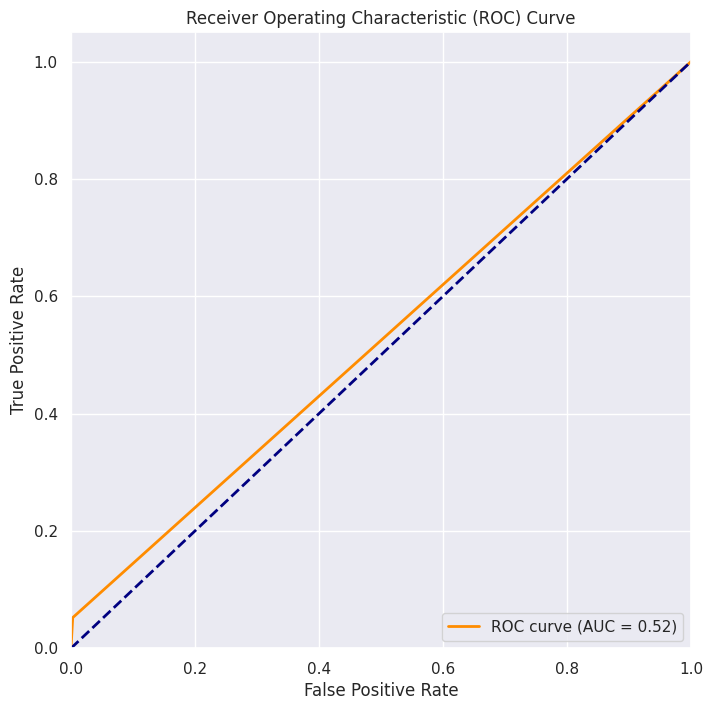

In [ ]:
from sklearn.metrics import roc_curve, auc
#train

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_train, predictions_lr_tr)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The attribution vector score to value 1 is higher in the linear regression model. Maybe she's just more curved. But maybe closer.


And if we shift the probability curve a little, since our distribution is not 50:50

In [ ]:
# set the threshold
threshold = 0.8

# and based on the probabilities and the ratio of classes, we calculate predict
custom_predictions = [0 if i < threshold else 1 for i in probabilities_lr]

# display all the studied metrics for forecasting by a new threshold
print('Metrics for forecasting with a custom threshold')
print(
    'Accuracy for custom: {:.2f}'.format(
        accuracy_score(y_test, custom_predictions)
    )
)
print(
    'Precision for custom: {:.2f}'.format(
        precision_score(y_test, custom_predictions)
    )
)
print(
    'Recall for custom: {:.2f}'.format(
        recall_score(y_test, custom_predictions)
    )
)
print('F1 for custom: {:.2f}'.format(f1_score(y_test, custom_predictions)))

Metrics for forecasting with a custom threshold
Accuracy for custom: 0.86
Precision for custom: 0.00
Recall for custom: 0.00
F1 for custom: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Slightly shifting the indicator, you can achieve the same level of accuracy predictability, but we significantly increase Precision, because it is possible that we will spend additional funds and resources on customer retention. We will look for a personal approach. And these are additional conditions and resources.

### Interpretation of results of Linear Regression

In [ ]:
X_cut, top_selected = feature_select_f(X, y, top_features = 20)
top_selected

Input_Features    F_Score
4                ki_score  29.861161
9           income_exists  10.599968
22              product_V   5.024590
8               is_female   4.229807
33  day_of_week_Wednesday   3.856231
11              product_L   3.240803
6              crd_burden   3.055029
18              product_R   2.721132
27     day_of_week_Friday   2.624653
3                     age   2.432407
30     day_of_week_Sunday   1.592232
26              product_Z   1.557250
2                  income   1.325143
25              product_Y   1.175154
24              product_X   0.990922
10              product_K   0.982717
5              mt_payment   0.851316
31   day_of_week_Thursday   0.813213
19              product_S   0.757411
23              product_W   0.705418

We could see that ki_score, and income_exists, gender and credit_burden and age, also type of such products as V, L, R, Z would affect to result of our model. We don't have enought data to make better predictions. Even predictions in train data gives us huge Recall. Maybe when we could get more data we make efective linear model.

## Descision Tree model

### Training a model on a train sample with a Descision tree.

In [ ]:
#DecisionTreeClassifier()
model_tree = DecisionTreeClassifier(random_state=0)
model_tree.fit(X_train, y_train)
# binary forecast
predictions_dt = model.predict(X_test)

In [ ]:
print('Descision tree')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions_dt)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions_dt)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_dt)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions_dt)))

Descision tree
Accuracy: 0.86
Precision: 0.00
Recall: 0.00
F1: 0.00


### Compare results

In [ ]:
probabilities_lr = model.predict_proba(X_test)[:,1]
probabilities_dt = model_tree.predict_proba(X_test)[:,1]
# output roc_auc_score
print('ROC_AUC Linear regression: {:.2f}'.format(roc_auc_score(y_test, probabilities_lr)))
print('ROC_AUC Descision Tree: {:.2f}'.format(roc_auc_score(y_test, probabilities_dt)))

ROC_AUC Linear regression: 0.64
ROC_AUC Descision Tree: 0.44


Results are not good. We could not use such models.

### Interpretation of results of Descision Tree

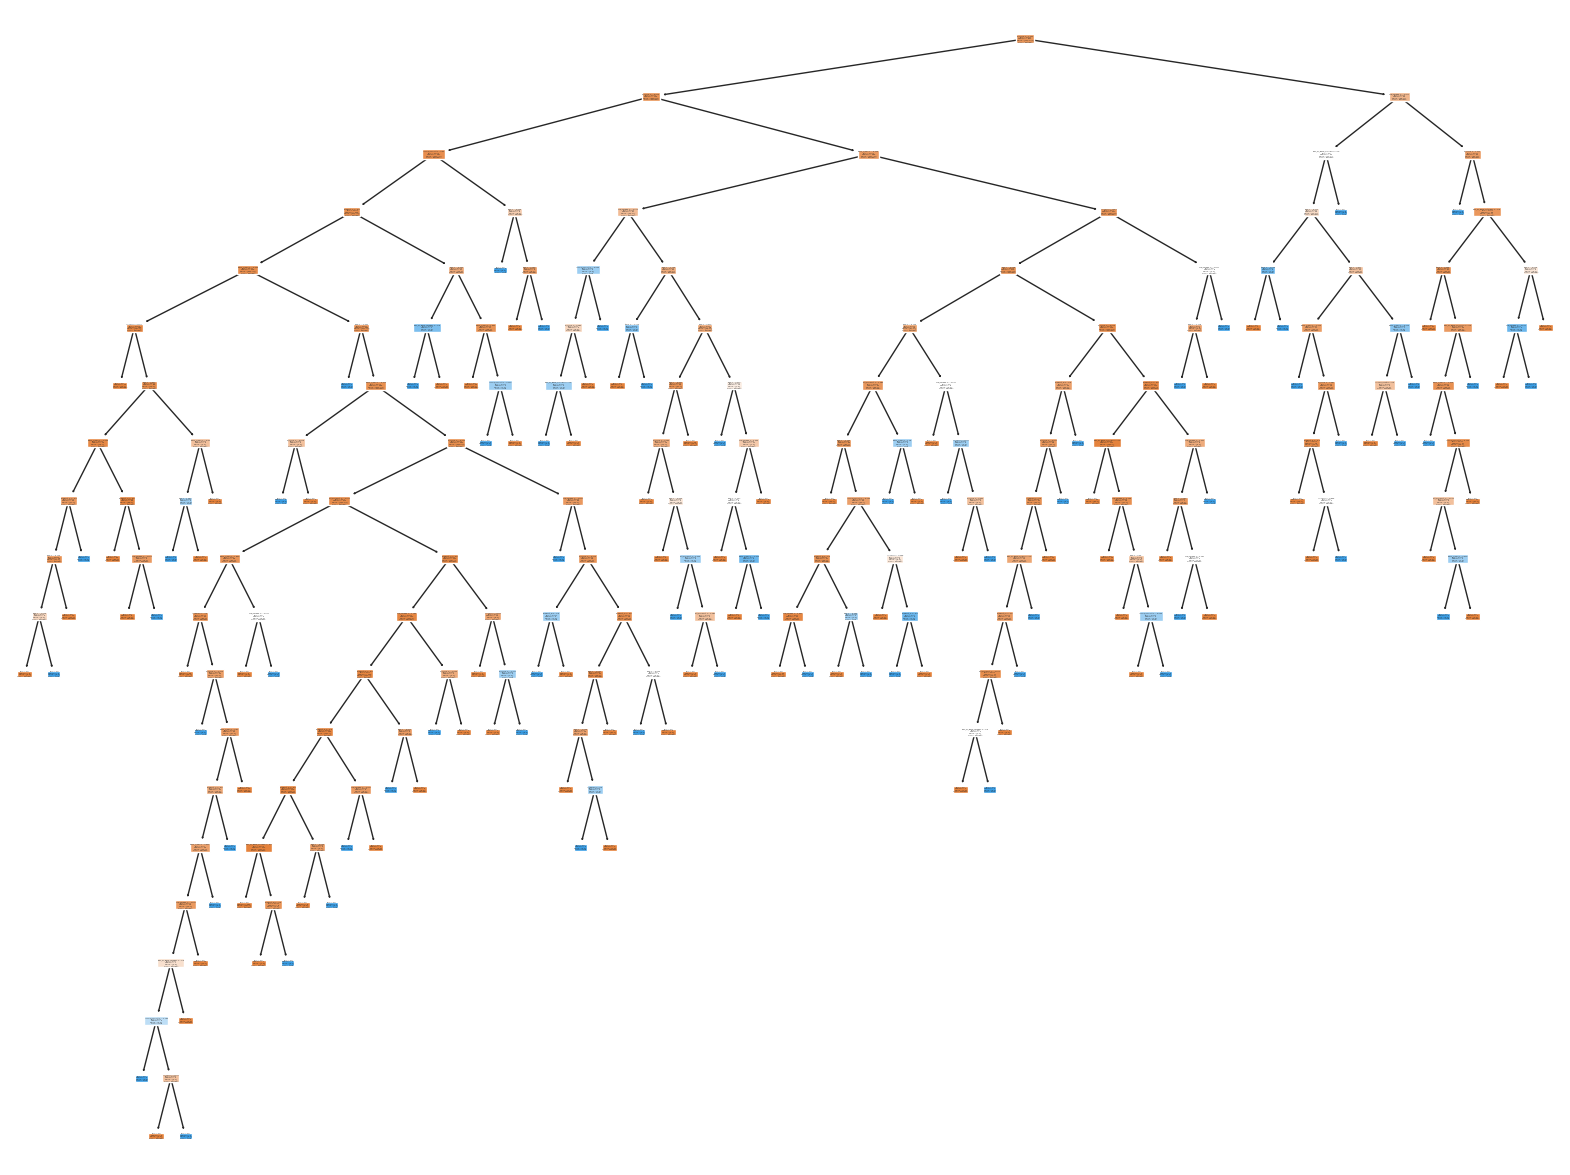

In [ ]:
plt.figure(figsize = (20,15)) #set the size of the figure to get a large image
plot_tree(model_tree, filled=True, feature_names = X_train.columns, class_names = ['not fault', 'fault'])
plt.show()

## Gradient Boost


As far as I know lightgbm would be better for table data. So I would try to implement not so linear method and could get better result.

**Gradient Boosting and LightGBM with Optuna Fine-tuning**

Gradient Boosting and LightGBM are machine learning algorithms used for predictive modeling. Gradient Boosting is a type of ensemble learning method that combines multiple weak learners (usually decision trees) sequentially, with each subsequent model correcting the errors of its predecessors. LightGBM is a high-performance implementation of gradient boosting that uses a novel technique called histogram-based algorithms to achieve faster training speed and lower memory usage.

Optuna is a hyperparameter optimization framework that automates the process of tuning the hyperparameters of machine learning models. It efficiently searches the hyperparameter space to find the optimal set of hyperparameters that maximize a chosen objective function, such as accuracy or AUC.

Overall, combining LightGBM with Optuna fine-tuning provides an efficient and effective approach for predictive modeling with tabular data.

### Preparation

In [ ]:
 %pip install lightgbm
 %pip install scikit-learn

In [ ]:
import lightgbm as lgb
import os
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, f1_score, accuracy_score, roc_curve, auc

from sklearn.model_selection import StratifiedKFold, train_test_split

In [ ]:
grad_boost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   issued_amount  1052 non-null   int64  
 1   term           1052 non-null   int64  
 2   income         1052 non-null   float64
 3   age            1052 non-null   float64
 4   product        1052 non-null   object 
 5   default        1052 non-null   int64  
 6   ki_score       1052 non-null   float64
 7   is_female      1052 non-null   int64  
 8   mt_payment     1052 non-null   float64
 9   crd_burden     1052 non-null   float64
 10  days_f_loan    1052 non-null   int64  
 11  day_of_week    1052 non-null   object 
 12  income_exists  1052 non-null   bool   
dtypes: bool(1), float64(5), int64(5), object(2)
memory usage: 99.8+ KB


In [ ]:
# Create a dictionary to encode 'product' values to integers
product_dict = {v: k for k, v in enumerate(grad_boost_df['product'].unique())}
# Create an inverse dictionary to decode encoded 'product' values back to original values
inv_product_dict = {v: k for k, v in product_dict.items()}

# Create a dictionary to encode 'product' values to integers
day_dict = {v: k for k, v in enumerate(grad_boost_df['day_of_week'].unique())}
# Create an inverse dictionary to decode encoded 'product' values back to original values
inv_day_dict = {v: k for k, v in day_dict.items()}

In [ ]:
# Entering dictionaries
grad_boost_df['product'] = grad_boost_df['product'].replace(product_dict)
grad_boost_df['day_of_week'] = grad_boost_df['day_of_week'].replace(day_dict)

Select just one category column. In case we could make our system better

In [ ]:
grad_boost_df = grad_boost_df.drop(columns = ['day_of_week'])

In [ ]:
grad_boost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   issued_amount  1052 non-null   int64  
 1   term           1052 non-null   int64  
 2   income         1052 non-null   float64
 3   age            1052 non-null   float64
 4   product        1052 non-null   int64  
 5   default        1052 non-null   int64  
 6   ki_score       1052 non-null   float64
 7   is_female      1052 non-null   int64  
 8   mt_payment     1052 non-null   float64
 9   crd_burden     1052 non-null   float64
 10  days_f_loan    1052 non-null   int64  
 11  income_exists  1052 non-null   bool   
dtypes: bool(1), float64(5), int64(6)
memory usage: 91.6 KB


In [ ]:
# split to train (big) and test sets
# Shuffle the DataFrame to randomize the order of samples
df_shuffled = grad_boost_df.sample(frac=1, random_state=42)

# Split the shuffled DataFrame into a large training set and a smaller test set
# using the first 100 samples (~10%) for validation
big_set = df_shuffled[100:].reset_index(drop=True)
# Extract the first 100 samples as the test set for validation
test_set = df_shuffled[:100].reset_index(drop=True)

In [ ]:
big_set.default.value_counts(True)[1], test_set.default.value_counts(True)[1]

(0.13655462184873948, 0.14)

Our groups are equal

In [ ]:
X = big_set.drop(columns=['default'])
y = big_set['default']

X_test = test_set.drop(columns=['default'])
y_test = test_set['default']

In [ ]:
#equal sizes
X.shape, y.shape

((952, 11), (952,))

In [ ]:
X_test.shape, y_test.shape

((100, 11), (100,))

In [ ]:
# for Boosting models we could use caterorical columns
categorical_feature = ['product']#, 'day_of_week']

In [ ]:
# single run for training with CV
# Parameters for the LightGBM model
params = {
    'num_leaves': 31,
    'max_depth': 6,
    'learning_rate': 0.1,
    'bagging_fraction': 0.8,
    'feature_fraction': 0.8,
    'min_child_samples': 20,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'early_stopping_rounds': 10,
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbose': -1
}

# Categorical feature
categorical_feature = ['product']#, 'day_of_week']

# Cross-validation using StratifiedKFold with 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store scores
scores_train = []
scores_val = []
scores_test = []

# Number of boosting rounds
max_boost_round = 100

# Array to store out-of-fold predictions
oof = np.zeros(len(X))

# Loop over each fold in the cross-validation
for i, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    # Split data into train and validation sets
    X_train, y_train = X.loc[train_idx], y.loc[train_idx]
    X_val, y_val = X.loc[val_idx], y.loc[val_idx]

    # Create LightGBM datasets
    train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_feature)
    val_data = lgb.Dataset(X_val, label=y_val, categorical_feature=categorical_feature)

    # Train the LightGBM model
    clf = lgb.train(params, train_set=train_data, num_boost_round=max_boost_round, valid_sets=[train_data, val_data])

    # Make predictions on train, validation, and test sets
    y_pred_train = clf.predict(X_train)
    y_pred_val = clf.predict(X_val)
    y_pred_test = clf.predict(X_test)

    # Store out-of-fold predictions
    oof[val_idx] = y_pred_val

    # Calculate and store ROC-AUC scores for train, validation, and test sets
    scores_train.append(roc_auc_score(y_train, y_pred_train))
    scores_val.append(roc_auc_score(y_val, y_pred_val))
    scores_test.append(roc_auc_score(y_test, y_pred_test))

# Print average ROC-AUC scores
print('Train (ROC-AUC)', np.mean(scores_train))
print('Val (ROC-AUC)', np.mean(scores_val))
print('Test (ROC-AUC)', np.mean(scores_test))
print('Out-of-Fold (ROC-AUC)', roc_auc_score(y, oof))
print()
# Print minimum and maximum values of out-of-fold predictions
print(min(oof), max(oof))

Train (ROC-AUC) 0.9068136343238355
Val (ROC-AUC) 0.5970617999886294
Test (ROC-AUC) 0.5940199335548173
Out-of-Fold (ROC-AUC) 0.613732921579637

0.038941553960806945 0.43171895475209077


We got that.  we could make it better in fine tuning  
Train (ROC-AUC): 0.9068136343238355 Model's performance on training data.  
Val (ROC-AUC): 0.5970617999886294 Model's performance on validation data.  
Test (ROC-AUC): 0.5940199335548173 Model's performance on unseen test data.  
Out-of-Fold (ROC-AUC): 0.613732921579637 Overall model performance across all folds.  
Min Prediction:  0.038941553960806945 Lowest predicted probability.  
Max Prediction: 0.43171895475209077 Highest predicted probability.  


### Tuning Parameters

In [ ]:
%pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.4 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
# Define fixed parameters for the LightGBM model
FIXED_PARAMS = {
    'objective': 'binary',                 # Objective function for binary classification
    'early_stopping_rounds': 10,           # Number of rounds with no improvement after which training will be stopped
    "learning_rate": 0.01,                 # Learning rate of the boosting process
    "bagging_freq": 1,                     # Frequency for performing bagging (1 means perform bagging every round)
    "max_cat_to_onehot": 20,               # Maximum number of categories to convert to one-hot encoding
}

Next we should create Cross Validation. I took StratifiedKFold for 5 folds, because the quantity of our data.

In [ ]:
# we need function to evaluate and get better results
def train_evaluate(search_params, num_boost_round=100):
    # Define categorical features
    categorical_feature = ['product']#, 'day_of_week']

    # Cross-validation using StratifiedKFold with 5 splits
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Lists to store validation scores
    scores_val = []
    f1_val = []
    acc_val = []

    # Loop over each fold in the cross-validation
    for i, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        # Split data into train and validation sets
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

        # Create LightGBM datasets
        train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_feature)
        val_data = lgb.Dataset(X_val, label=y_val, categorical_feature=categorical_feature)

        # Train the LightGBM model
        clf = lgb.train(params={**FIXED_PARAMS, **search_params},
                        train_set=train_data,
                        num_boost_round=num_boost_round,
                        valid_sets=[train_data, val_data],
                        valid_names=['train', 'valid'])

        # Make predictions on validation set
        y_pred_val = clf.predict(X_val)

        # Calculate and store validation scores
        scores_val.append(roc_auc_score(y_val, y_pred_val))
        f1_val.append(f1_score(y_val, y_pred_val>=0.5))
        acc_val.append(accuracy_score(y_val, y_pred_val>=0.5))

    # Return the mean validation score
    return np.mean(scores_val)#, np.mean(f1_val), np.mean(acc_val)

In [ ]:
train_evaluate({
    'num_leaves': 31,                    # Maximum number of leaves in one tree
    'max_depth': 6,                      # Maximum depth of the tree
    'early_stopping_rounds': 10,         # Number of rounds with no improvement after which training will be stopped
    'objective': 'binary',               # Objective function for binary classification
    'verbose': -1                        # Verbosity level (-1 for silent mode)
})

0.6226880436636534

In [ ]:
def objective(trial):
    # Define search space for hyperparameters
    search_params = {
        # Choose evaluation metric
        "metric": trial.suggest_categorical('metric', ['auc', 'binary_logloss']),
        # Verbosity level
        "verbosity": -1,
        # Type of boosting algorithm
        "boosting": trial.suggest_categorical('boosting', ['gbdt', 'rf', 'dart']),

        # Balance the class weights
        "is_unbalance": trial.suggest_int("is_unbalance", 0, 1, step=1),

        # Regularization parameters
        "lambda_l1": trial.suggest_float("lambda_l1", 0.0001, 100.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 0.0001, 100.0, log=True),

        # Tree-specific parameters
        "num_leaves": trial.suggest_int("num_leaves", 2, 50, step=1),
        "max_depth": trial.suggest_int("max_depth", 2, 50, step=1),
        "max_bin": trial.suggest_categorical("max_bin", [17, 31, 63, 127]),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 2, 50),

        # Feature fraction for bagging
        "feature_fraction": trial.suggest_float("feature_fraction", 0.3, 1.0, step=0.1),
        # Bagging fraction
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.5, 0.9, step=0.1),

        # Regularization for categorical features
        "cat_l2": trial.suggest_float("cat_l2", 0.001, 100.0, log=True),
    }
    # Convert 'is_unbalance' to boolean
    search_params['is_unbalance'] = bool(search_params['is_unbalance'])

    # Train and evaluate model with the given parameters
    score = train_evaluate(search_params)

    return score

In [ ]:
# Create an Optuna study named "optuna_val"
study = optuna.create_study(
    study_name="optuna_val",                           # Name of the study
    sampler=optuna.samplers.TPESampler(n_startup_trials=100),  # Use TPE sampler with 100 initial trials
    # pruner=optuna.pruners.PercentilePruner(percentile=50),  # Pruner to stop unpromising trials
    # directions=['maximize','maximize', 'maximize']      # For multiple objectives, uncomment and specify directions
    direction='maximize'                                # Direction to optimize (maximize)
)

# Optimize the study using the defined objective function with a specified number of trials
study.optimize(objective, n_trials=300)                # More trials may lead to better results but require more time

[I 2024-03-20 15:23:37,320] A new study created in memory with name: optuna_val
[I 2024-03-20 15:23:37,483] Trial 0 finished with value: 0.6086184547160157 and parameters: {'metric': 'binary_logloss', 'boosting': 'gbdt', 'is_unbalance': 1, 'lambda_l1': 0.00022387196546171237, 'lambda_l2': 0.0011959849671361984, 'num_leaves': 47, 'max_depth': 49, 'max_bin': 31, 'min_data_in_leaf': 11, 'feature_fraction': 0.5, 'bagging_fraction': 0.5, 'cat_l2': 0.04761602435218001}. Best is trial 0 with value: 0.6086184547160157.
/usr/local/lib/python3.10/dist-packages/lightgbm/callback.py:292: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')
/usr/local/lib/python3.10/dist-packages/lightgbm/callback.py:292: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')
/usr/local/lib/python3.10/dist-packages/lightgbm/callback.py:292: UserWarning: Early stopping is not availabl

In [ ]:
# # for multiple objectives

# print("Number of finished trials: {}".format(len(study.trials)))

# print("Best trial:")
# best_trial = study.best_trials[-1] # select one of best trials

# print("  Value: {}".format(best_trial.values))

# print("  Params: ")
# for key, value in best_trial.params.items():
#     print("    {}: {}".format(key, value))

In [ ]:
# Print the number of finished trials in the study
print("Number of finished trials: {}".format(len(study.trials)))

# Print information about the best trial
print("Best trial:")
best_trial = study.best_trial

# Print the value of the best trial
print("  Value: {}".format(best_trial.value))

# Print the parameters of the best trial
print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 300
Best trial:
  Value: 0.6797440161464552
  Params: 
    metric: auc
    boosting: rf
    is_unbalance: 1
    lambda_l1: 0.001787524342406135
    lambda_l2: 2.818446303524671
    num_leaves: 11
    max_depth: 38
    max_bin: 31
    min_data_in_leaf: 12
    feature_fraction: 0.8
    bagging_fraction: 0.8
    cat_l2: 16.22936035058284


Number of finished trials: 300

Indicates the total number of trials completed in the Optuna study.
Best trial:

Indicates information about the best trial found during optimization.
Value: 0.6569465290806755

Represents the value (score) achieved by the best trial, which is the highest value obtained during optimization.
Params:

Displays the parameters of the best trial, which are the hyperparameters that resulted in the best performance.
metric: auc

Evaluation metric chosen for the model, which is the area under the ROC curve (AUC).
boosting: gbdt

Specifies the boosting algorithm used, which is Gradient Boosting Decision Tree (gbdt).
is_unbalance: 1

Indicates whether the dataset is unbalanced (1) or not (0).
lambda_l1: 0.1049959602356951

L1 regularization lambda parameter.
lambda_l2: 22.72951617203233

L2 regularization lambda parameter.
num_leaves: 19

Maximum number of leaves in one tree.
max_depth: 27

Maximum depth of the tree.
max_bin: 31

Maximum number of bins that feature values will be bucketed in.
min_data_in_leaf: 2

Minimum number of data points in a leaf.
feature_fraction: 0.4

Fraction of features to consider for each round (subsample).
bagging_fraction: 0.6

Fraction of data to be used for bagging.
cat_l2: 0.04159343511288958

L2 regularization lambda parameter for categorical features.

### Full Model

In [ ]:
best_params = {**FIXED_PARAMS, **best_trial.params}
best_params['is_unbalance'] = bool(best_params['is_unbalance'])

In [ ]:
# best params from optimization launch
best_params = {
    # Objective function for the model, here set to binary classification
    'objective': 'binary',
    # Number of rounds with no improvement after which training will be stopped
    'early_stopping_rounds': 10,
    # Learning rate of the boosting process
    'learning_rate': 0.01,
    # Frequency for performing bagging, 1 means perform bagging every round
    'bagging_freq': 1,
    # Maximum number of categories to convert to one-hot encoding
    'max_cat_to_onehot': 20,
    # Metric used for evaluation, here set to Area Under the Curve (AUC)
    'metric': 'auc',
    # Type of boosting algorithm, here set to Random Forest (rf)
    'boosting': 'rf',
    # L1 regularization lambda parameter
    'lambda_l1': 0.22673024973771697,
    # L2 regularization lambda parameter
    'lambda_l2': 0.0022100626028908796,
    # Maximum number of leaves in one tree
    'num_leaves': 16,
    # Maximum depth of the tree
    'max_depth': 48,
    # Maximum number of bins that feature values will be bucketed in
    'max_bin': 31,
    # Minimum number of data points in a leaf
    'min_data_in_leaf': 2,
    # Fraction of features to consider for each round (subsample)
    'feature_fraction': 0.4,
    # Fraction of data to be used for bagging
    'bagging_fraction': 0.6000000000000001,
    # L2 regularization lambda parameter for categorical features
    'cat_l2': 0.053104550684536976
               }

In [ ]:
best_params

{'objective': 'binary',
 'early_stopping_rounds': 10,
 'learning_rate': 0.01,
 'bagging_freq': 1,
 'max_cat_to_onehot': 20,
 'metric': 'auc',
 'boosting': 'rf',
 'lambda_l1': 0.22673024973771697,
 'lambda_l2': 0.0022100626028908796,
 'num_leaves': 16,
 'max_depth': 48,
 'max_bin': 31,
 'min_data_in_leaf': 2,
 'feature_fraction': 0.4,
 'bagging_fraction': 0.6000000000000001,
 'cat_l2': 0.053104550684536976}

In [ ]:
max_boost_round = 100
# Maximum number of boosting rounds

train_data = lgb.Dataset(X, label=y, categorical_feature=categorical_feature)
val_data = lgb.Dataset(X_test, label=y_test, categorical_feature=categorical_feature)
# Define LightGBM datasets for training and validation

clf = lgb.train(best_params, train_set=train_data, num_boost_round=max_boost_round, valid_sets=[train_data, val_data])
# Train the LightGBM model using best parameters, training data, and validation data

y_pred_train = clf.predict(X)
y_pred_test = clf.predict(X_test)
# Make predictions on the training and test data

print('Train (ROC-AUC)', roc_auc_score(y, y_pred_train))
# Print the ROC-AUC score for the training data

print('Test (ROC-AUC)', roc_auc_score(y_test, y_pred_test))
# Print the ROC-AUC score for the test data

print('ki-score test (ROC-AUC)', roc_auc_score(y_test, X_test.ki_score))
# Print the ROC-AUC score for the test data based on another feature (ki_score)


[LightGBM] [Info] Number of positive: 130, number of negative: 822
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 258
[LightGBM] [Info] Number of data points in the train set: 952, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.136555 -> initscore=-1.844206
[LightGBM] [Info] Start training from score -1.844206
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[2]	training's auc: 0.768131	valid_1's auc: 0.696844
Train (ROC-AUC) 0.7681311997005429
Test (ROC-AUC) 0.696843853820598
ki-score test (ROC-AUC) 0.6295681063122924


**Early stopping, best iteration is**: The model stopped early after the second iteration as it achieved the best validation **AUC of 0.696844**. This indicates that the model's performance on the validation set did not improve after this point.

**Train (ROC-AUC) 0.768131:** The ROC-AUC score achieved on the training data is 0.768131. This indicates the model's ability to discriminate between classes on the training set, with a score close to 1 suggesting good performance.

**Test (ROC-AUC) 0.69684:** The ROC-AUC score achieved on the test data is 0.696844. This indicates the model's ability to generalize to unseen data, with a score close to the training ROC-AUC suggesting reasonable generalization.

**ki-score test (ROC-AUC) 0.6295:** The ROC-AUC score achieved on the test data based on another feature (ki_score) is 0.62956. This indicates the existing quality of external model.

### Results and comparing

In [ ]:
pred_df = pd.DataFrame()
# Store true labels from the test set
pred_df['y_true'] = y_test
# Store predicted probabilities from the model on the test set
pred_df['y_pred'] = y_pred_test
# Store ki_score values from the test set
pred_df['ki_score'] = X_test.ki_score

<Axes: xlabel='y_pred', ylabel='Count'>

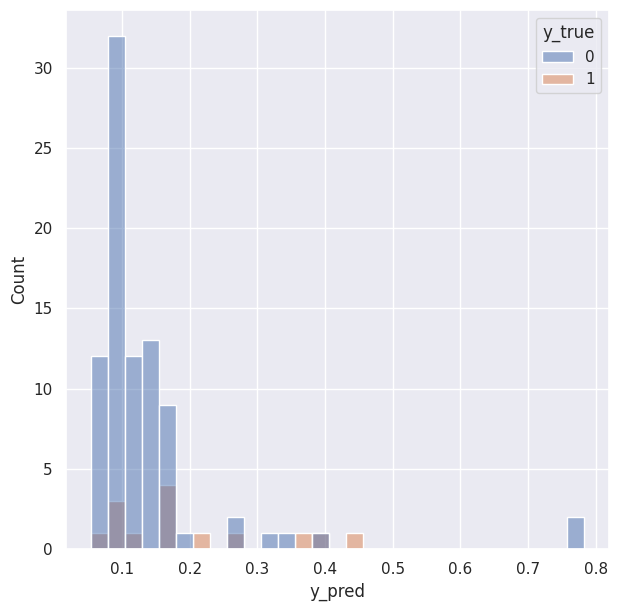

In [ ]:
sns.histplot(data=pred_df, x='y_pred', hue='y_true')

In [ ]:
pred_df.corr()

y_true    y_pred  ki_score
y_true    1.000000  0.190355  0.231177
y_pred    0.190355  1.000000  0.331507
ki_score  0.231177  0.331507  1.000000

**y_true vs y_pred (0.190355):** This correlation coefficient indicates a weak positive correlation between the true labels (y_true) and the predicted probabilities (y_pred). A value close to 0 suggests weak correlation, indicating that the predicted probabilities don't perfectly align with the true labels.

**y_true vs ki_score (0.231177):** This correlation coefficient indicates a weak positive correlation between the true labels (y_true) and the values from the ki_score feature. Again, a value close to 0 suggests weak correlation, indicating that the ki_score values don't perfectly align with the true labels.

**y_pred vs ki_score (0.331507):** This correlation coefficient indicates a moderate positive correlation between the predicted probabilities (y_pred) and the values from the ki_score feature. A value close to 1 suggests a stronger correlation compared to y_true vs y_pred and y_true vs ki_score.


In [ ]:
threshold = 0.4
# Define the threshold value for classification

print(classification_report(y_test, y_pred_test > threshold))
# Print a classification report comparing true labels (y_test) with predictions (y_pred_test)
# based on whether the predicted probabilities are greater than the threshold

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        86
           1       0.33      0.07      0.12        14

    accuracy                           0.85       100
   macro avg       0.60      0.52      0.52       100
weighted avg       0.79      0.85      0.81       100



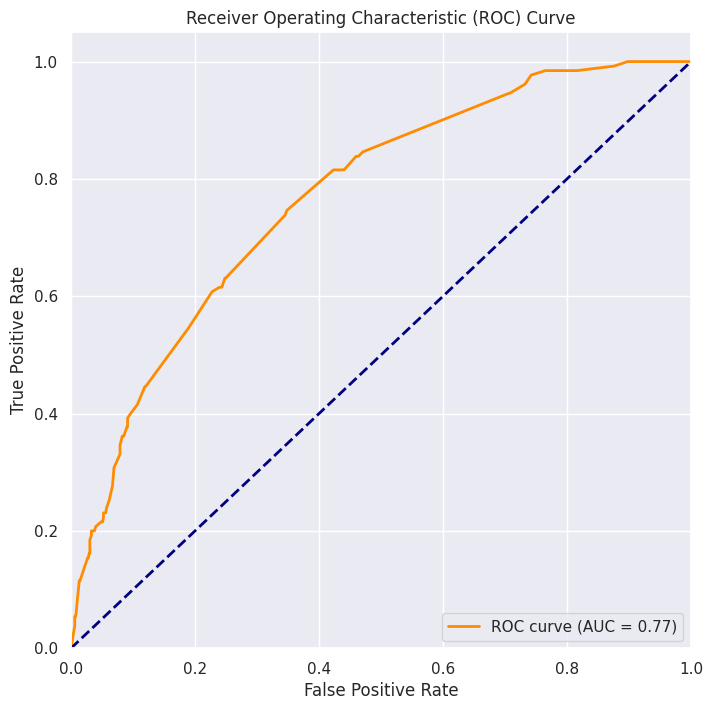

In [ ]:
# Compute ROC curve and ROC area for TRAIN
fpr, tpr, _ = roc_curve(y, y_pred_train)
roc_auc = auc(fpr, tpr)
# Calculate the False Positive Rate (fpr) and True Positive Rate (tpr) using the predicted probabilities for the training data
# Compute the Area Under the ROC Curve (ROC AUC) using the calculated fpr and tpr

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
# Plot the ROC curve using fpr and tpr, with AUC value labeled on the plot
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# Plot the diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
# Customize and display the ROC curve plot, setting labels, title, and legend

Our model doesn't appear to be overfitting, as indicated by the ROC curve. The area under the curve (AUC) demonstrates good performance, although it doesn't reach 1 too quickly, suggesting room for further optimization without encountering early saturation.

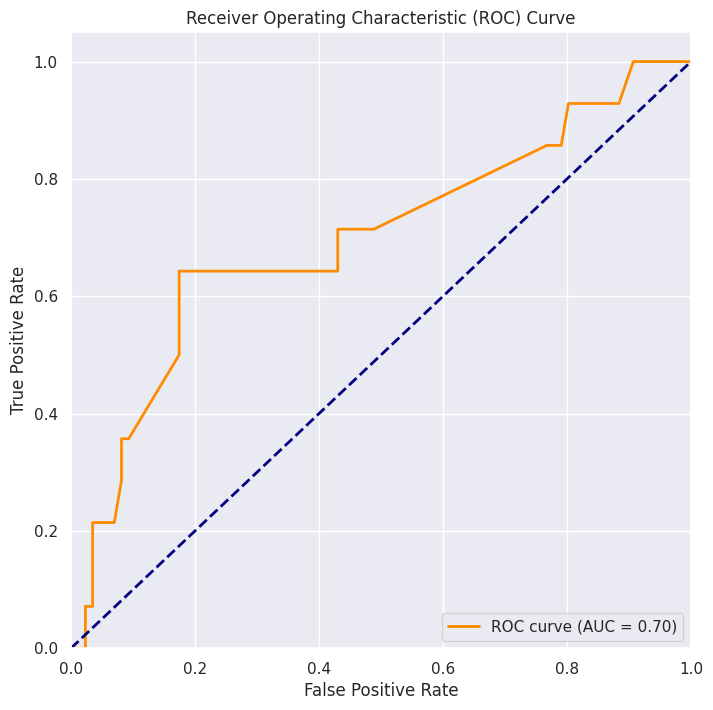

In [ ]:
# Compute ROC curve and ROC area for test metrics
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Model has delivered impressive results, as evidenced by the ROC curve. Additionally, when comparing the ROC curve of the ki_score, our model outperforms it, showcasing a significant achievement.

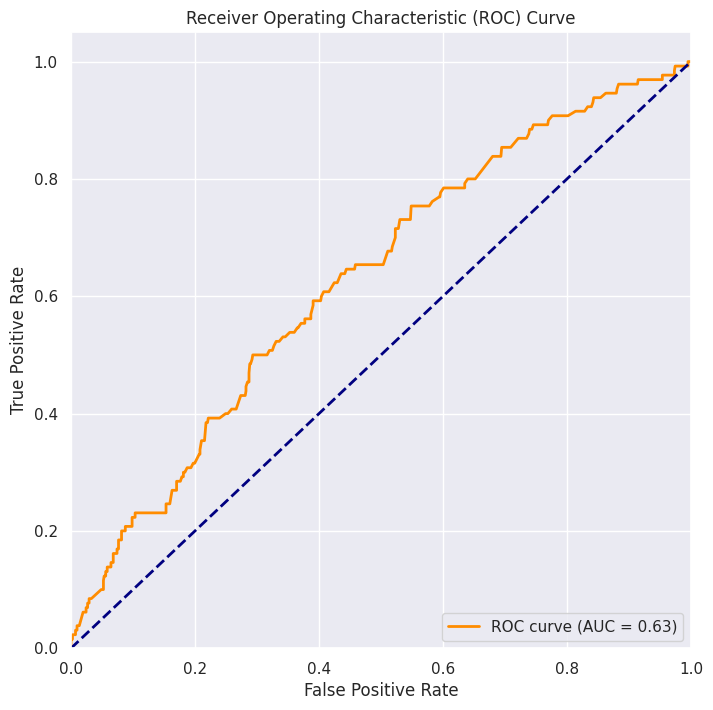

In [ ]:
# Compute ROC curve and ROC area for KI Score
fpr, tpr, _ = roc_curve(y, X['ki_score'])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Feature Importance

Let's see what key metrics would be in our dataset that could help to predict results.

In [ ]:
%pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 7.8 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer(X_test)

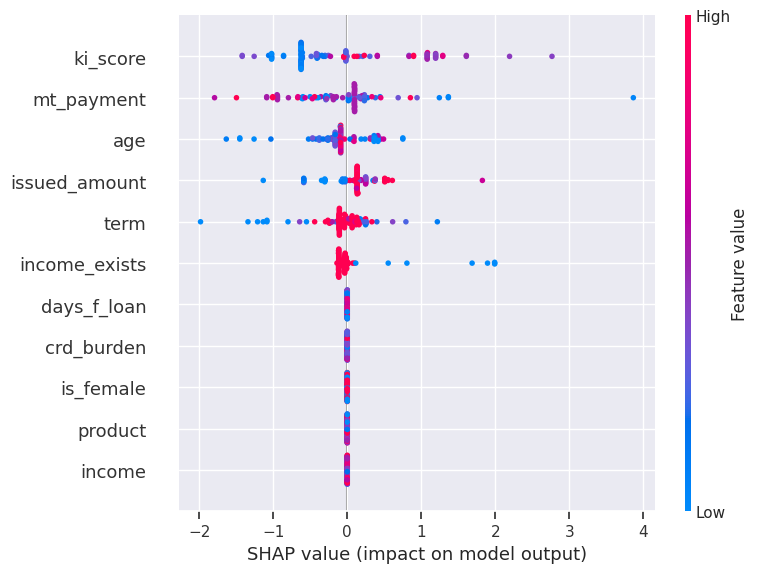

In [ ]:
shap.summary_plot(shap_values, X_test)

**Model Interpretation**

Upon analyzing our model, we observe that it heavily relies on the following features: `ki_score`, `monthly payment`, `age`, `issued_amount`, and `income_exists`. Let's interpret how these features influence our model predictions:

1. **Ki_score:**
   - A lower ki_score tends to decrease the likelihood of default according to our model. In other words, if the ki_score is below average, we may have more confidence that the customer will repay the loan on time.

2. **Monthly Payment:**
   - Default levels tend to be higher for loans with monthly payments above the average. This suggests that customers with higher monthly payments may have a greater likelihood of default.

3. **Age:**
   - On average, customers with an average age tend to perform slightly better in terms of default rates. However, younger individuals may exhibit a higher chance of default in certain cases.

4. **Issued Amount:**
   - There is a correlation between the issued_amount and the likelihood of default. Generally, higher loan amounts are associated with a higher chance of default.

5. **Term:**
   - Longer loan terms may indicate a higher probability of repayment. Short-term loans, on the other hand, vary significantly depending on the specific situation.

6. **Income Existence:**
   - Customers with documented income (income_exists = yes) are less likely to default compared to those without documented income. The absence of documented income is associated with a higher chance of default.

These interpretations provide insights into how each feature contributes to our model's predictions. Understanding these relationships can help us refine our model and make better-informed decisions in the lending process.


# Client clustering

### Let's build a distance matrix using the linkage() function on a standardized feature matrix and draw a dendrogram.
**Attention: drawing a dendrogram may take time!**

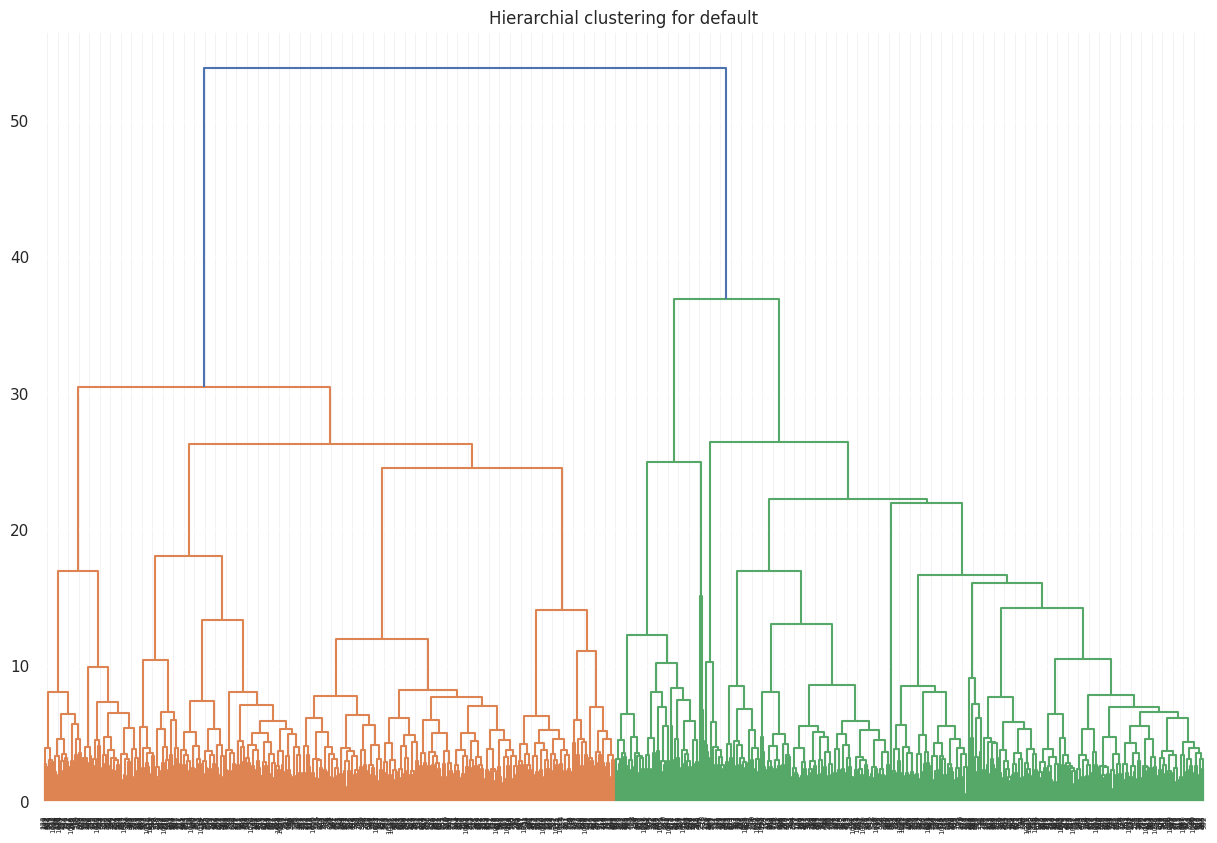

In [ ]:

from scipy.cluster.hierarchy import dendrogram, linkage
# mandatory data standardization before working with algorithms

linked = linkage(loan_data_std, method = 'ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for default')
plt.show()


Well, the machine sees 3 big clusters. one group is really specific and short. And yellow and red clusters could be divided into another two groups. So I would say that 5 is good choice.

### Train a clustering model based on the K-Means algorithm and predict customer clusters.

In [ ]:
# set the model k_means with the number of clusters 5 and fix the value of random_state
km =  KMeans(n_clusters=5, random_state=0)
# predict clusters for observations (the algorithm assigns them numbers from 0 to 2)
labels =  km.fit_predict(loan_data_std)

# save the cluster labels into dataset
loan_data['cluster_km']= labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
loan_data.groupby('cluster_km')['cluster_km'].agg('count')

cluster_km
0     92
1    108
2    363
3    193
4    296
Name: cluster_km, dtype: int64

In [ ]:
loan_data.groupby('cluster_km').agg('mean')

<ipython-input-140-5c2e761ebe5e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loan_data.groupby('cluster_km').agg('mean')


order_id  issued_amount       term        income        age  \
cluster_km                                                                   
0           4736.228261   12510.869565  13.521739  42138.043478  35.471595   
1           5021.842593    8254.629630  24.009259  32825.925926  36.050980   
2           4717.867769    4389.807163  22.947658  41137.911846  31.827764   
3           5156.611399   14458.549223  29.875648  83686.528497  32.213538   
4           5036.027027   14503.378378  29.179054  34786.277027  39.285745   

             default    ci_score  ki_score  is_female  mt_payment  crd_burden  \
cluster_km                                                                      
0           0.076087  564.109890  0.277913   0.532609  942.855000    0.328641   
1           0.305556  530.710843  0.588472   0.583333  335.197701    0.095063   
2           0.112948  555.261708  0.285209   0.542700  212.763144    0.067115   
3           0.134715  572.316062  0.219290   0.352332  498.145616    0.081451   
4           0.125000  576.729730  0.262226   0.685811  501.648235    0.151584   

            days_f_loan  income_exists  
cluster_km                              
0             76.836957       0.978261  
1             50.305556       0.842593  
2             60.856749       0.964187  
3             41.538860       1.000000  
4             54.804054       0.898649

Clusters may not be very uniform, for example, the third cluster is twice as large as the zero and fourth. But maybe there's nothing special.

In [ ]:
numeric_columns = [
                'issued_amount',
                'term',
                'income',
                'age',
                'ki_score',
                'mt_payment',
                'crd_burden']


<Figure size 1200x400 with 0 Axes>

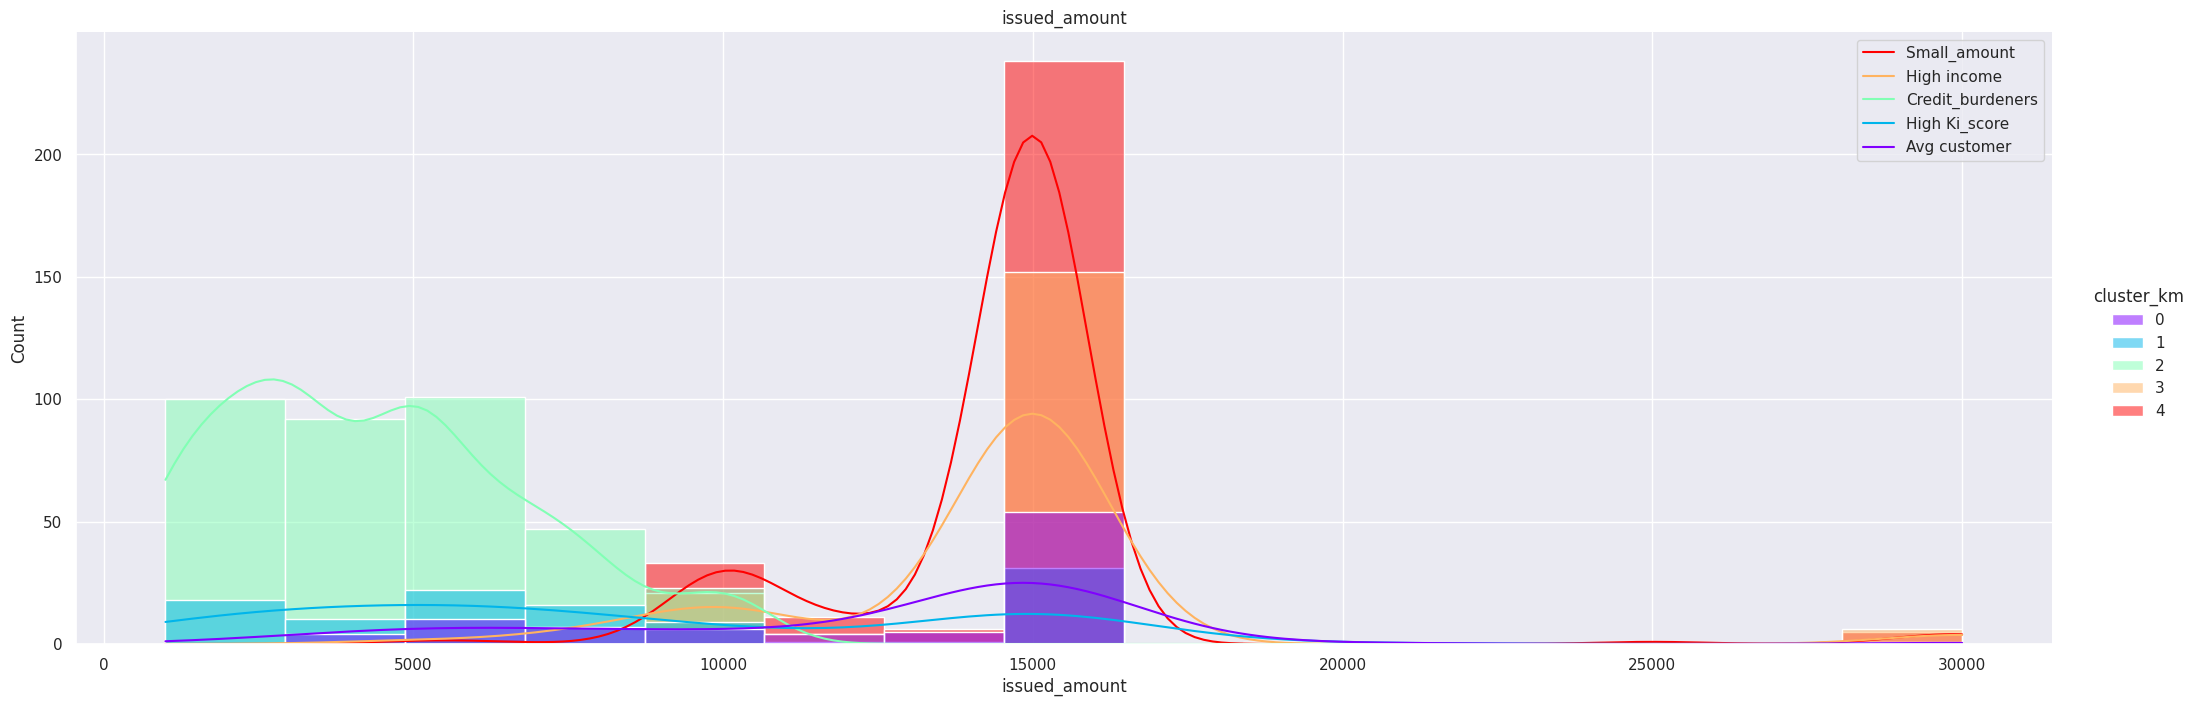

<Figure size 1200x400 with 0 Axes>

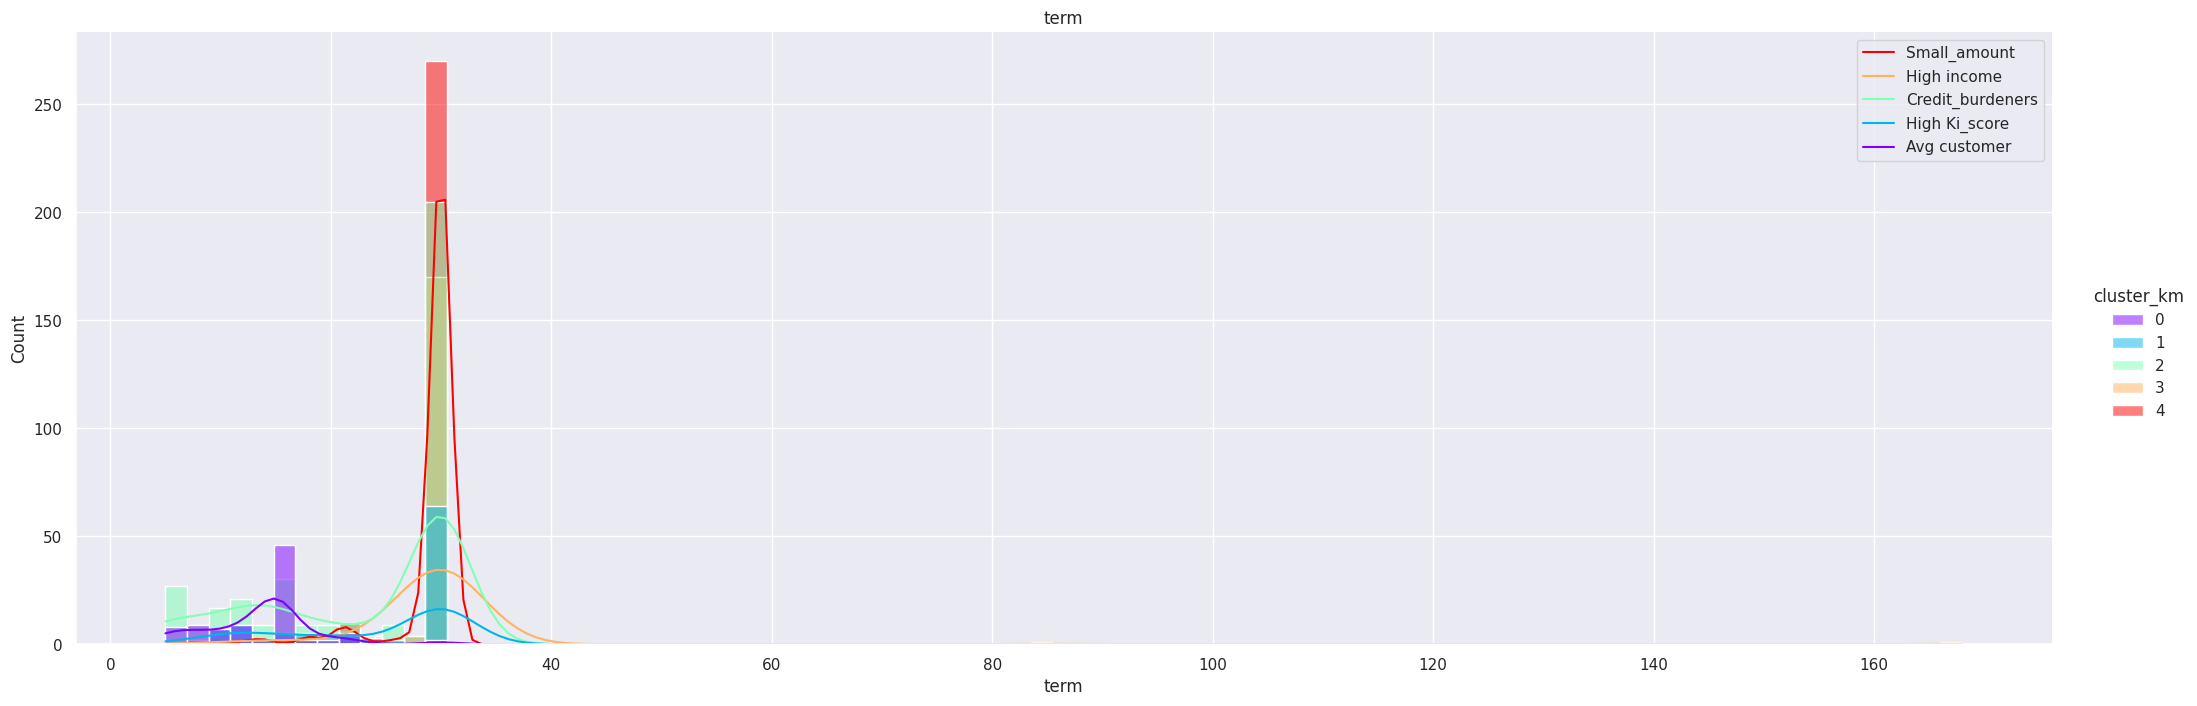

<Figure size 1200x400 with 0 Axes>

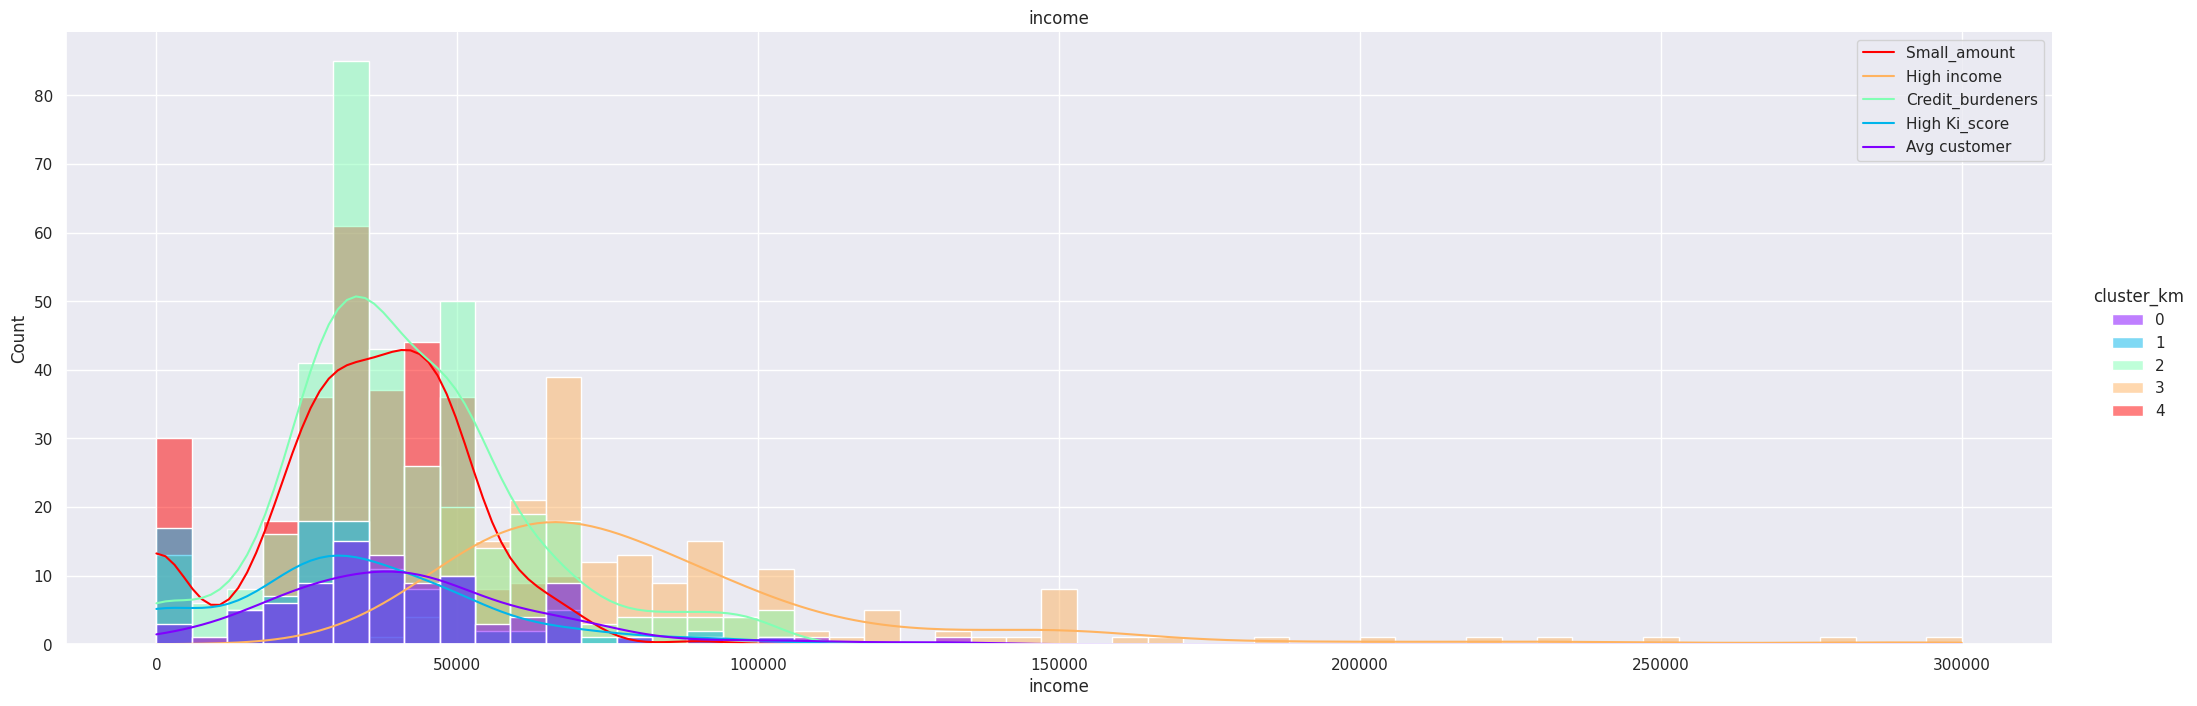

<Figure size 1200x400 with 0 Axes>

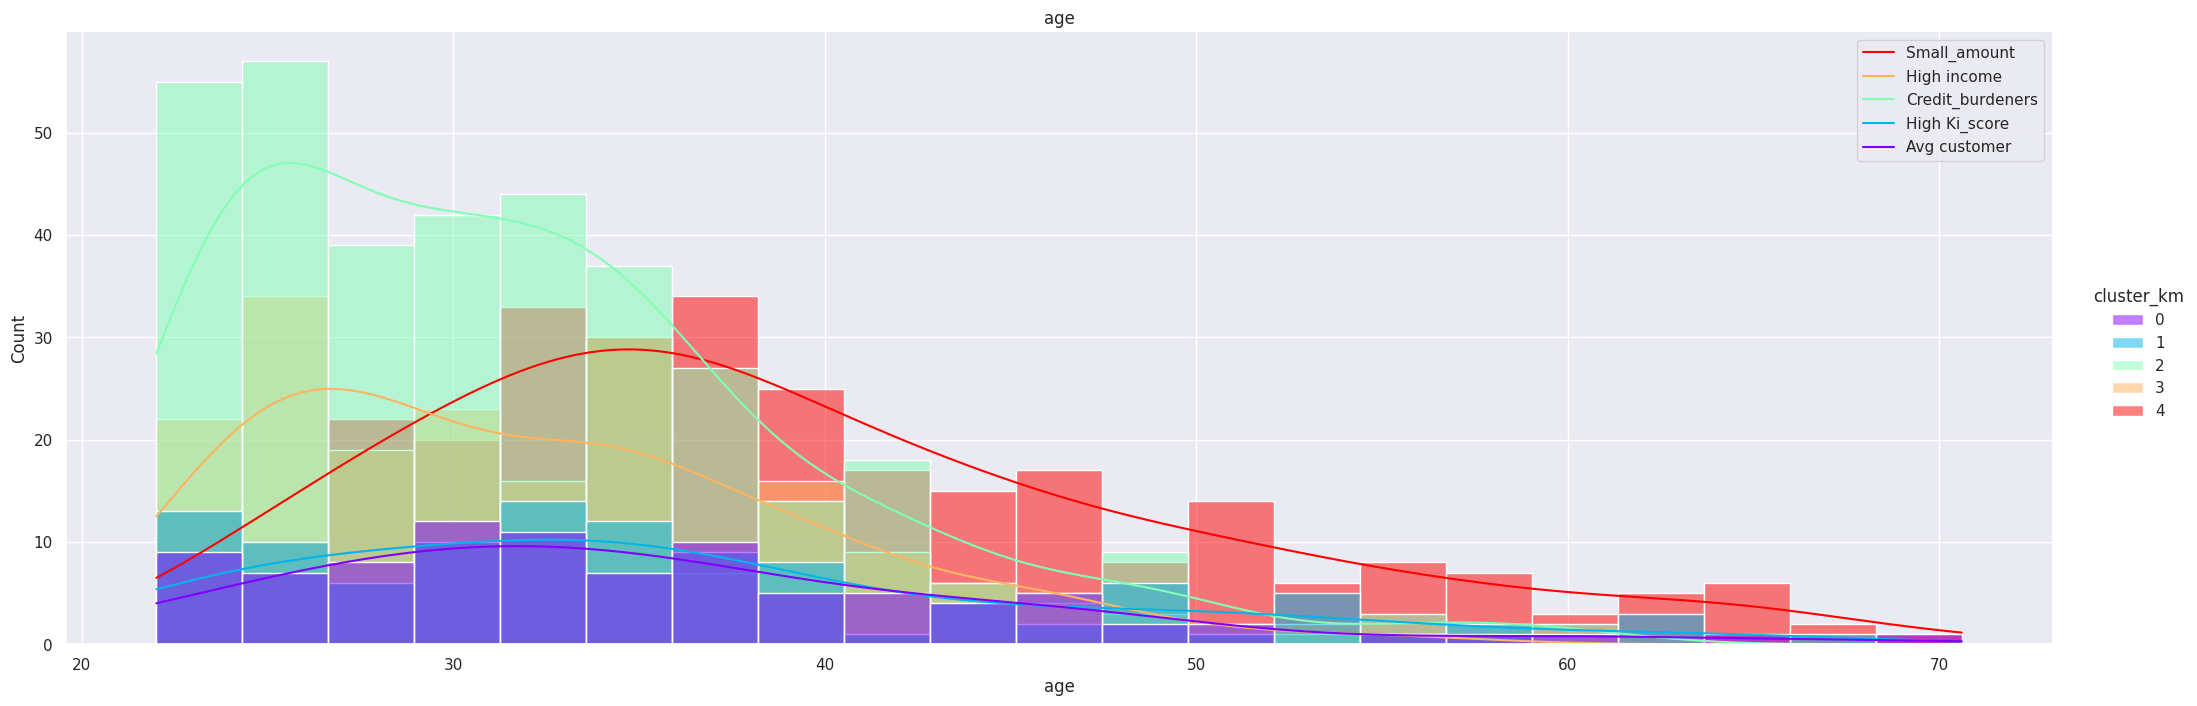

<Figure size 1200x400 with 0 Axes>

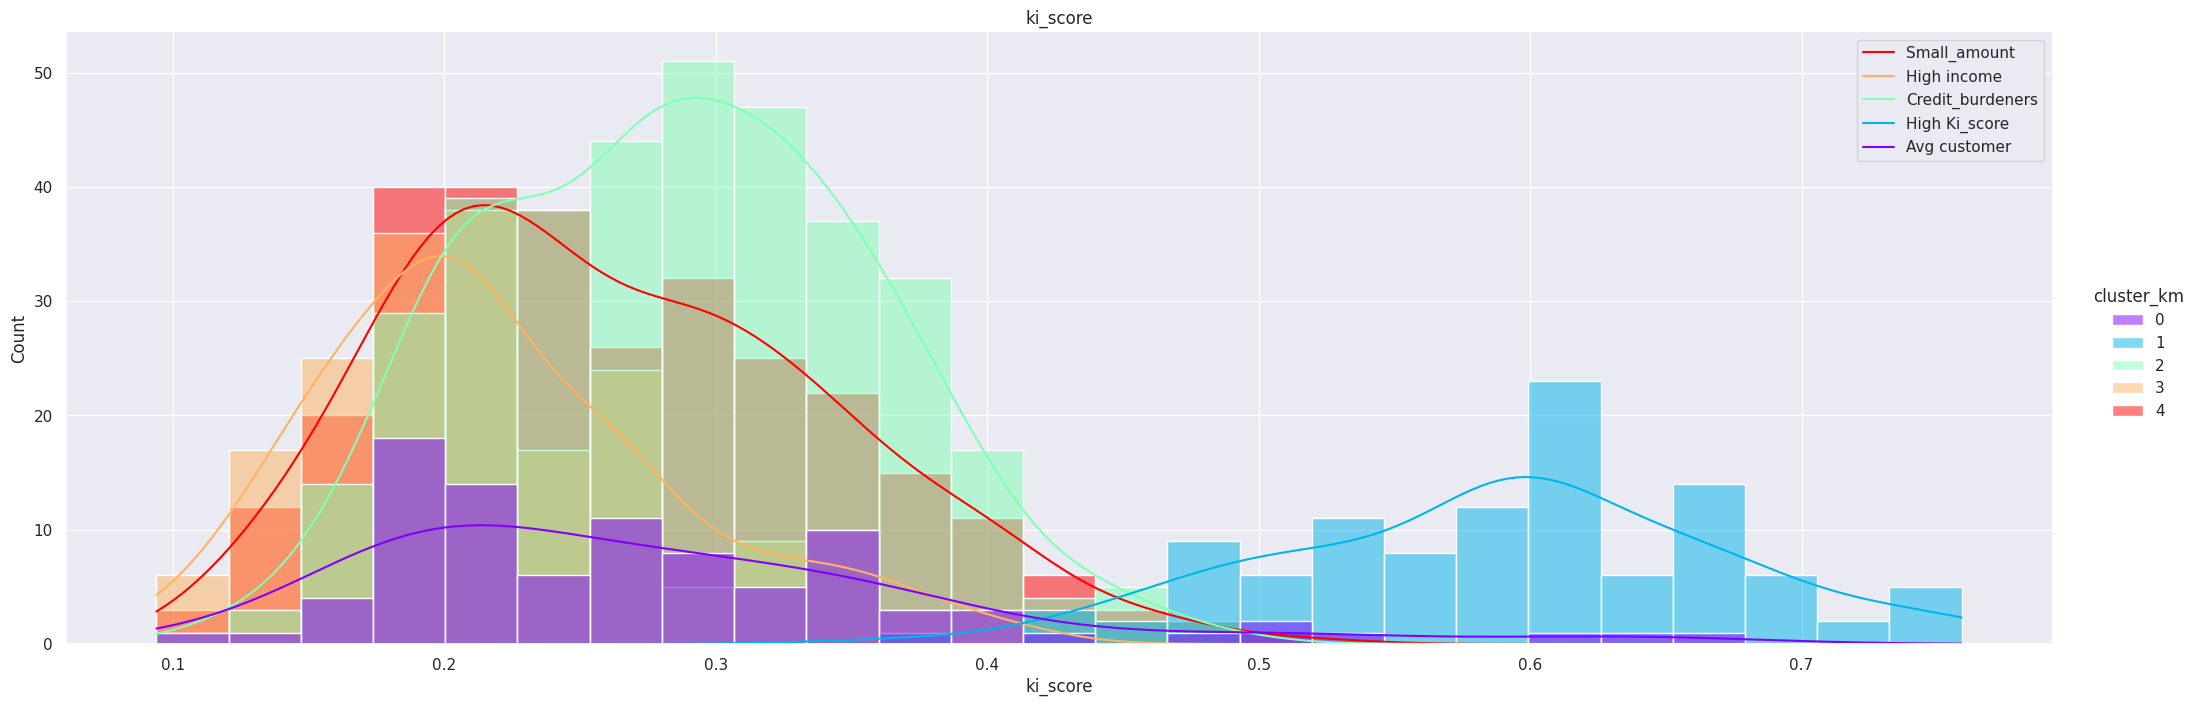

<Figure size 1200x400 with 0 Axes>

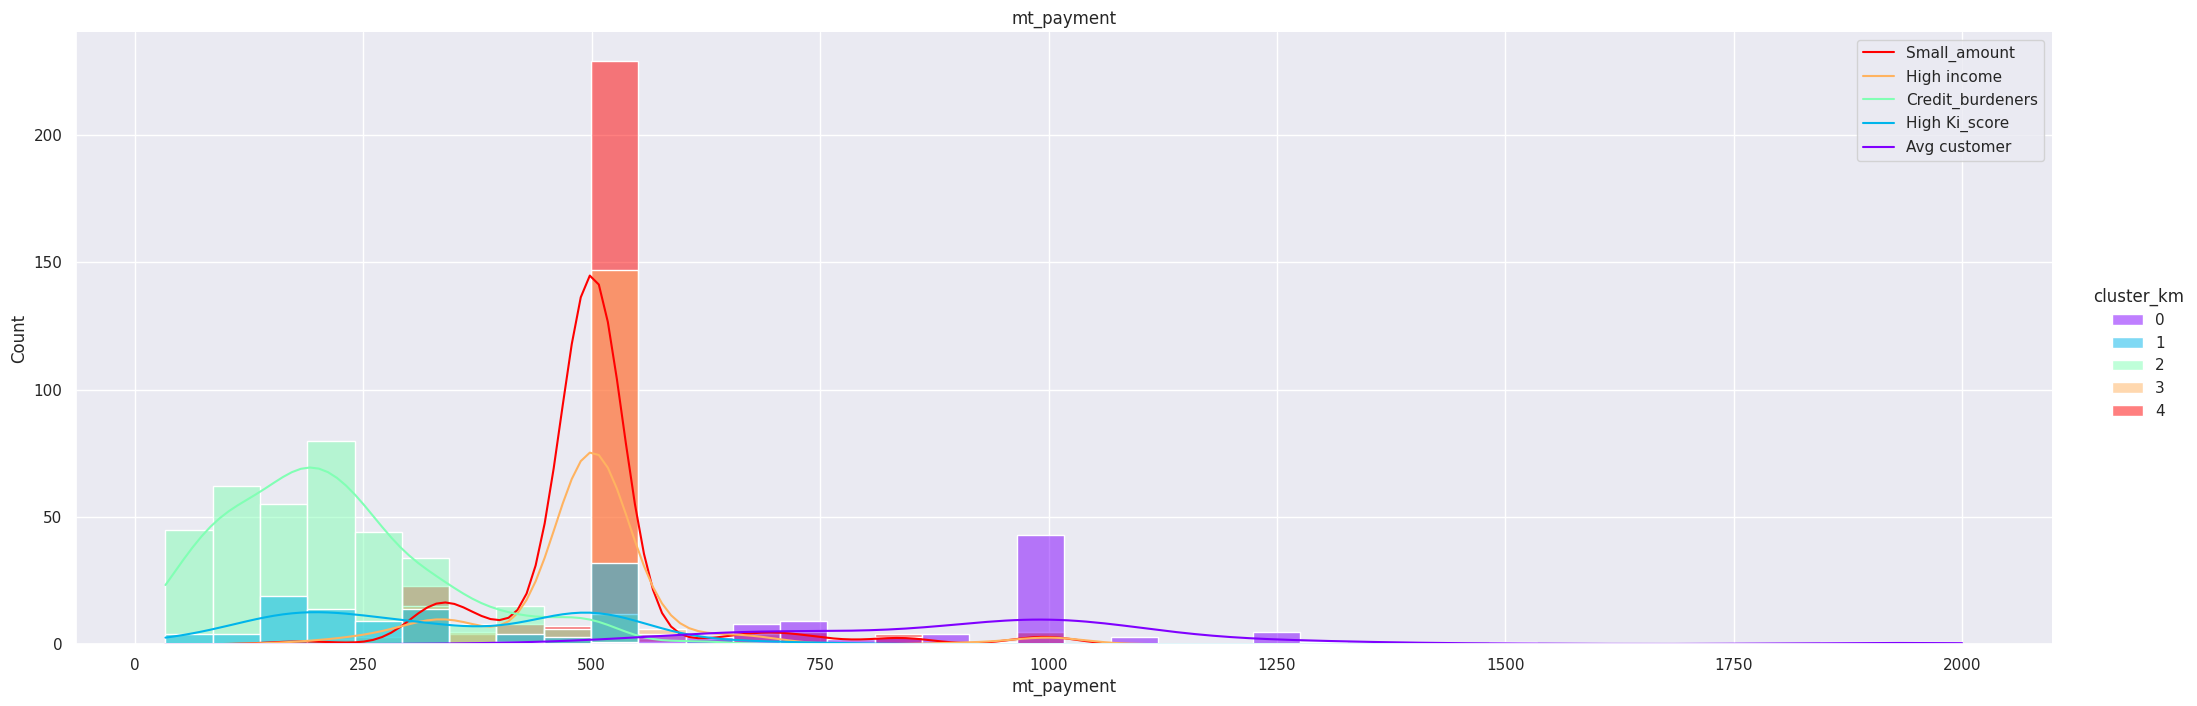

<Figure size 1200x400 with 0 Axes>

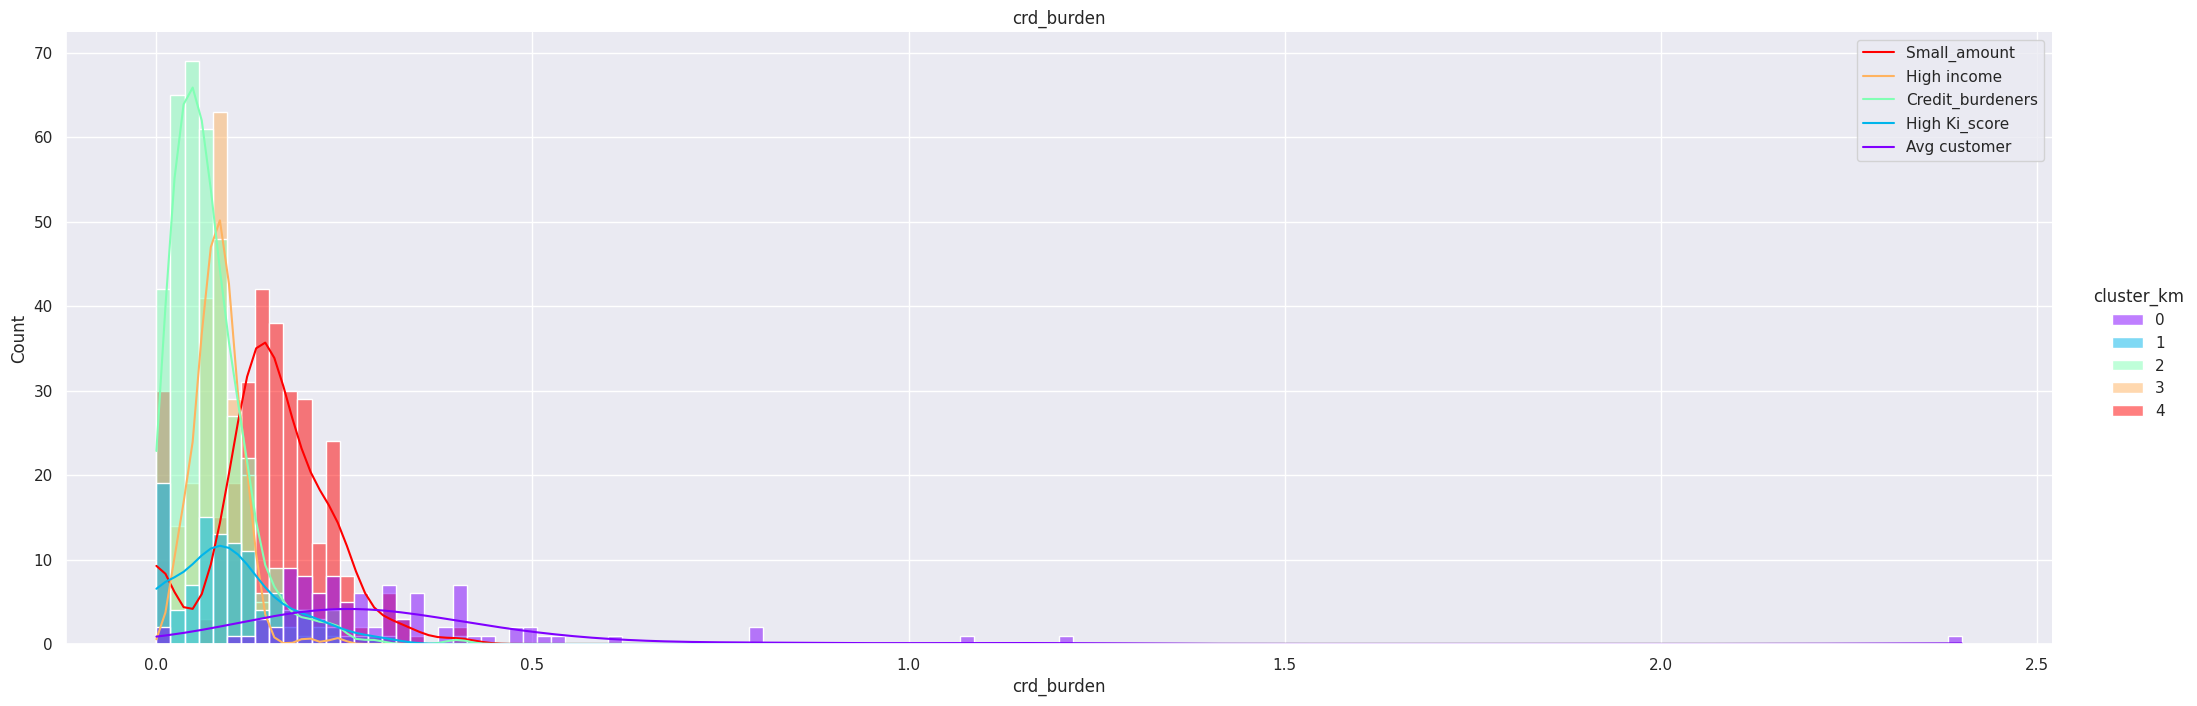

In [ ]:
for column in numeric_columns:
    plt.figure(figsize=(12, 4))
    sns.displot(x=loan_data[column], hue='cluster_km', data=loan_data, kde=True, height=7, aspect=3, palette='rainbow')
    plt.title(column)
    plt.legend(['Small_amount', 'High income', 'Credit_burdeners', 'High Ki_score', 'Avg customer'])
    plt.show();


As far as I get from the graphics we have such clusters:

In [ ]:
cluster_names = {
    0: 'Credit_burdeners',
    1: 'High Ki_score' ,
    2: 'Small_amount',
    3: 'High income',
    4: 'Avg customer'
}


In [ ]:
loan_data['cluster_name'] = loan_data['cluster_km'].map(cluster_names)

### Look at the averages of the features for the clusters

In [ ]:
cluster_features = loan_data.groupby('cluster_name').mean().reset_index()
numeric_columns = cluster_features.drop(columns=['cluster_name']).columns
cluster_features.style.format({i: '{:.2f}' for i in numeric_columns}) \
    .highlight_max(color='yellowgreen', subset=numeric_columns) \
    .highlight_min(color='coral', subset=numeric_columns)

<ipython-input-163-eb39351b55b4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_features = loan_data.groupby('cluster_name').mean().reset_index()


We could see such clusters as:  
**Avg customer** - machine could not say something very specific and group some persons, but in this group is more likely woman 68%, with average age 39. and chance to default is usual 12%.   
**Credit_burdeners** - firstly it is very low default level customer. They take money for short term, huge monthly payment 932 euro with salary about 3 434 per month.  
**High Ki_score** and high default level, lowest income in such group. And in such group we see less information about income (83% of them). As we know the more ki_score is more chances to get default.   
**High income**  they have higher issued amount and term and salary 7100 per month and pay 507 euro per month.  
**Small_amount** They are young 31.35 and take 4500 euro for 2 years. But salary is good 3400 and pay less than others 211. Maybe I should call them Young specialist who also have to pay rent.

In [ ]:
loan_data.mean()

<ipython-input-146-3ca415b7fdb3>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  loan_data.mean()
<ipython-input-146-3ca415b7fdb3>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_data.mean()


order_id          4920.692015
issued_amount    10189.638783
term                25.256654
income           46390.874525
age                 34.749206
default              0.136882
ci_score           563.461988
ki_score             0.297144
is_female            0.551331
mt_payment         422.820356
crd_burden           0.119252
days_f_loan         55.923954
income_exists        0.941065
cluster_km           2.468631
dtype: float64

# Conclusions and Basic Recommendations
<a name="Final">

**Data and Research Methods:**  
We gathered 1062 loan data.  

Three machine learning models: Logistic Regression, Discision Tree and Gradient Boosting as lightgbm were used for preparation.

To prepare for clustering, we used a dendrogram, which divided our sample into five clusters. For the clustering itself, we utilized the K-Means model.

**Our goals:**  
1. Conduct preliminary data exploration to understand the dataset's characteristics. This exploration will enhance the depth and context of your analysis when proposing a model for assessing client creditworthiness.
2. Evaluate and recommend either the ci_score or ki_score model for further assessing the client's creditworthiness. Provide a rationale for your choice.  
3. Provide a brief overview of the data that you would utilize in constructing a customer default probability model. Feel free to consider data beyond the provided dataset.  
4. Propose your own model for predicting customer default. Ensure that your suggestion includes the model type, feature selection, and any relevant evaluation metrics.  

## 1.  **Data Exploration**


**Key Findings**

**Observations on Numeric Columns:**

* Notice that quartiles of **issued_amount** seem too perfect, resembling generated data.

* Note that **Issued_amount** varies around 10189 ± 5655.

* Average **income** is 49296 ± 28978, indicating a considerable deviation, while income distribution has a right shoulder.

* **Term:** Is 25 ± 9 months. distribution appears to have a left shoulder. And big peak in number of loans at 30 monthes.

- **Age:** The average age is 34.7 ± 10 years, providing insight into the demographic distribution of customers.

- **Ki_score:** The average ki_score is 0.30 ± 0.13, suggesting the creditworthiness of customers.

- **Monthly Payment:** The average monthly payment is 423 ± 248, with a considerable deviation, reflecting varying repayment capabilities among customers.

- **Credit Burden:** The credit_burden is 12.6% ± 12.5%, with a median of 10%, indicating a wide deviation and potential financial strain on customers.

We have 15 customers with Credit burden more than 40% of their monthly income. And they pay better than others.

### **Issued amount**

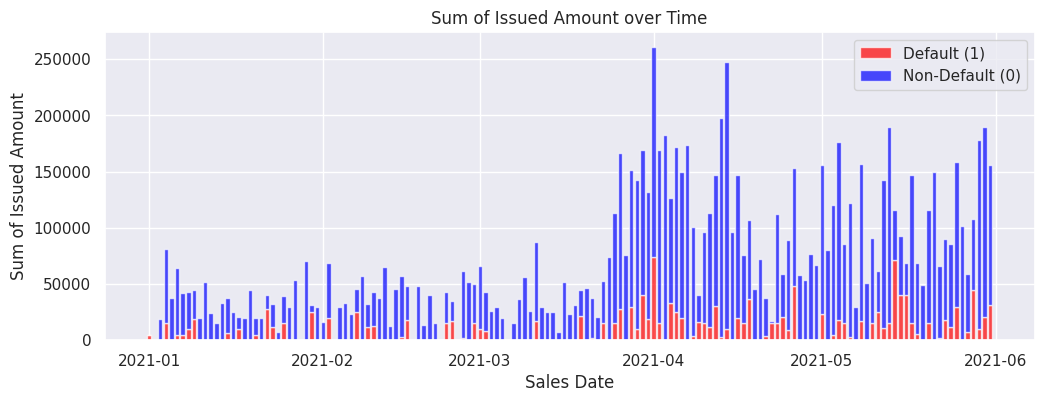

In [ ]:
# Make a pivot table to see it in sum
loan_sum_dt = pd.pivot_table(data = loan_data, index = 'sales_date', columns= 'default', values = 'issued_amount', aggfunc= 'sum', fill_value=0 )

# Plot the sum of defaults
plt.figure(figsize=(12, 4))
plt.bar(loan_sum_dt.index, loan_sum_dt[1],
        alpha=0.7,  # Transparency
        color='red', label='Default (1)') #label default with red sign
plt.bar(loan_sum_dt.index, loan_sum_dt[0], bottom=loan_sum_dt[1],
        alpha=0.7,  # Transparency
        color='blue', label='Non-Default (0)')

# Add labels and title
plt.xlabel('Sales Date')
plt.ylabel('Sum of Issued Amount')
plt.title('Sum of Issued Amount over Time')

# Add legend
plt.legend()

# Show the plot
plt.show()

It appears that in the **last two months** there has been a **growing number of sales** while the default rates have remained relatively constant. This might indicate increased efficiency in the sales and marketing teams, resulting in more successful loan transactions.

However, there may be other factors at play. One possibility we should consider is our customer churn rate. If customers are taking out loans but then transferring to another bank after two months for a better interest rate, that could impact our analysis.

It's important to note that our current data only includes active loans. If we want to consider those who have already paid off their loans, we might need to adjust our SQL script accordingly.

There could also be a combination of these factors affecting our findings. Thus, further analysis is required to make a comprehensive conclusion.

### **Products**

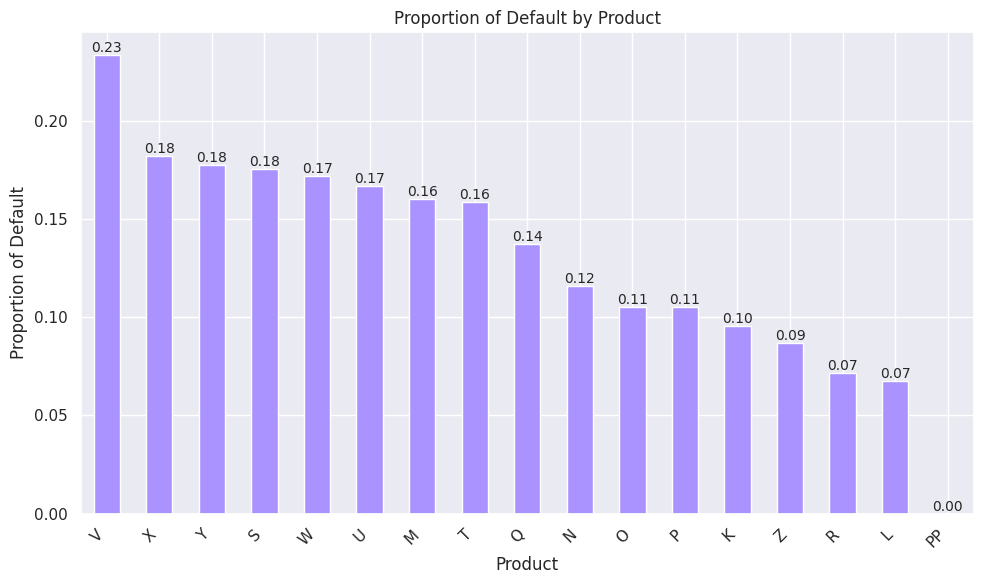

In [ ]:
# Group by product and calculate the mean of 'default' (proportion of default)
product_default_mean = loan_data.groupby('product')['default'].mean()

# Sort products based on proportion of default
product_default_mean_sorted = product_default_mean.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))

# Bar chart
product_default_mean_sorted.plot(kind='bar', color="#aa93ff")
plt.title('Proportion of Default by Product')
plt.xlabel('Product')
plt.ylabel('Proportion of Default')
plt.xticks(rotation=45, ha='right')
# Annotate bars with proportion values
for i, v in enumerate(product_default_mean_sorted):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


We observe that currently, some products (e.g., V) are more prone to default, suggesting a higher risk associated with them. It would be prudent to consider this factor in our decision-making process. Additionally, utilizing 1000 results for analysis seems adequate. But maybe better to take more into full analysis.  
We can conduct further statistical studies to define the interest rates for these products based on their default risk.

Furthermore, products Z, R, and L have a default chance of less than 10%, indicating a lower risk associated with them.

### **Gender**

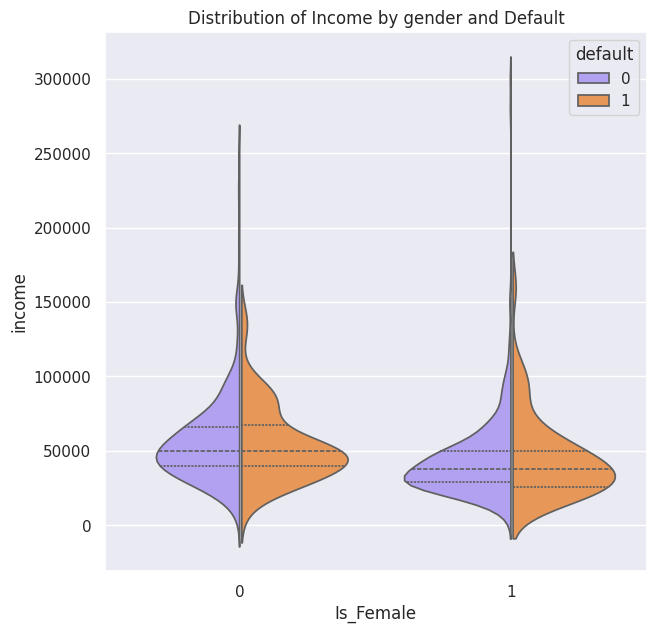

In [ ]:
sns.violinplot(data = loan_data,
               x = "is_female",
               y = "income",
               hue = "default",
               split = True,   #in one violin
               gap = 0.02,
               palette = custom_palette,
               inner = "quart")

# Add labels and title
plt.xlabel('Is_Female')
plt.ylabel('income')
plt.title('Distribution of Income by gender and Default')

plt.show()

We observe that income does not significantly affect the default level in the male group. However, in the female group, the lower quartile of income is slightly lower than that of non-default females.   
Additionally, the median income for females is lower than that of males across all categories.  


In [ ]:
loan_data.groupby('is_female')['default'].agg(['count', 'sum'])

count  sum
is_female            
0            472   76
1            580   68

Women are more obliging and statistically significant. ztest p-value = 0.04036

### **Age**

Usually age/income should be a bit different. (It is like generated data)  
I expected a bit more curvier like a rainbow. Another Idea We are not so interesting for people with income more than 100 000 and age from 30 - 50.

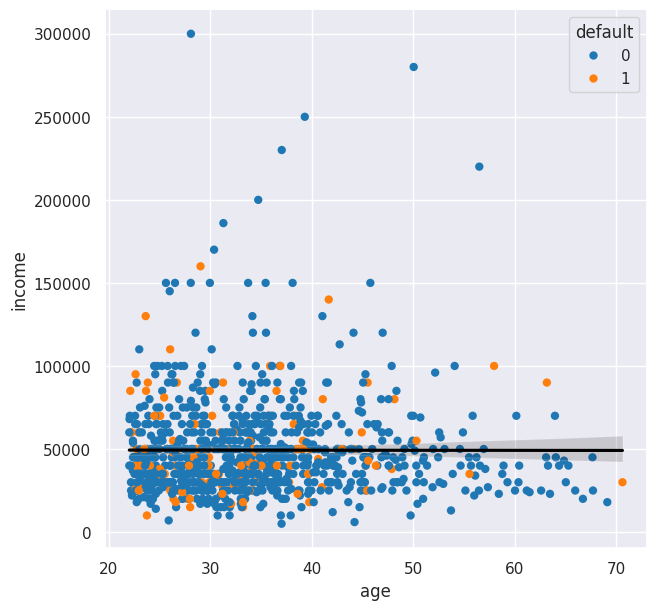

In [ ]:
# maybe we could see age and income curve or correlation and default level
# Play along with different x or y-axis
x_axis = 'age'
y_axis = 'income'
color = 'default'

#very simple plot to explore classification and data inputs
with sns.color_palette("tab10"):
    fig_simple = sns.scatterplot(x = x_axis,
                y = y_axis,
                hue = color,
                linewidth=0,
                data= loan_data)

# Add trendline
sns.regplot(x=x_axis, y=y_axis, data=loan_data, scatter=False, color='black')


plt.show()

Typically, one might anticipate seeing a curve indicating a peak income around the age of 40. However, in this case, the data doesn't suggest that individuals aged 27 earn significantly less than those aged 35 or 45.  
Similarly, when considering the default rates, no particular age group stands out as being specifically prone to defaulting.

### Cluster findings
We could see such clusters as:  
**Avg customer** - machine could not say something very specific and group some persons, but in this group is more likely woman 68%, with average age 39. and chance to default is usual 12%.   
**Credit_burdeners** - firstly it is very low default level customer. They take money for short term, huge monthly payment 932 euro with salary about 3 434 per month.  
**High Ki_score** and high default level, lowest income in such group. And in such group we see less information about income (83% of them). As we know the more ki_score is more chances to get default.   
**High income**  they have higher issued amount and term and salary 7100 per month and pay 507 euro per month.  
**Small_amount** They are young 31.35 and take 4500 euro for 2 years. But salary is good 3400 and pay less than others 211. Maybe I should call them Young specialist who also have to pay rent.

In [ ]:
cluster_features = loan_data.groupby('cluster_name').mean().reset_index()
numeric_columns = cluster_features.drop(columns=['cluster_name']).columns
cluster_features.style.format({i: '{:.2f}' for i in numeric_columns}) \
    .highlight_max(color='yellowgreen', subset=numeric_columns) \
    .highlight_min(color='coral', subset=numeric_columns)

<ipython-input-163-eb39351b55b4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_features = loan_data.groupby('cluster_name').mean().reset_index()


Could be taken into next considerations and reserch.

### **Correlation matrix**

<ipython-input-33-5f60aa6e1fb8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_m = loan_data.corr() #Correlation matrix


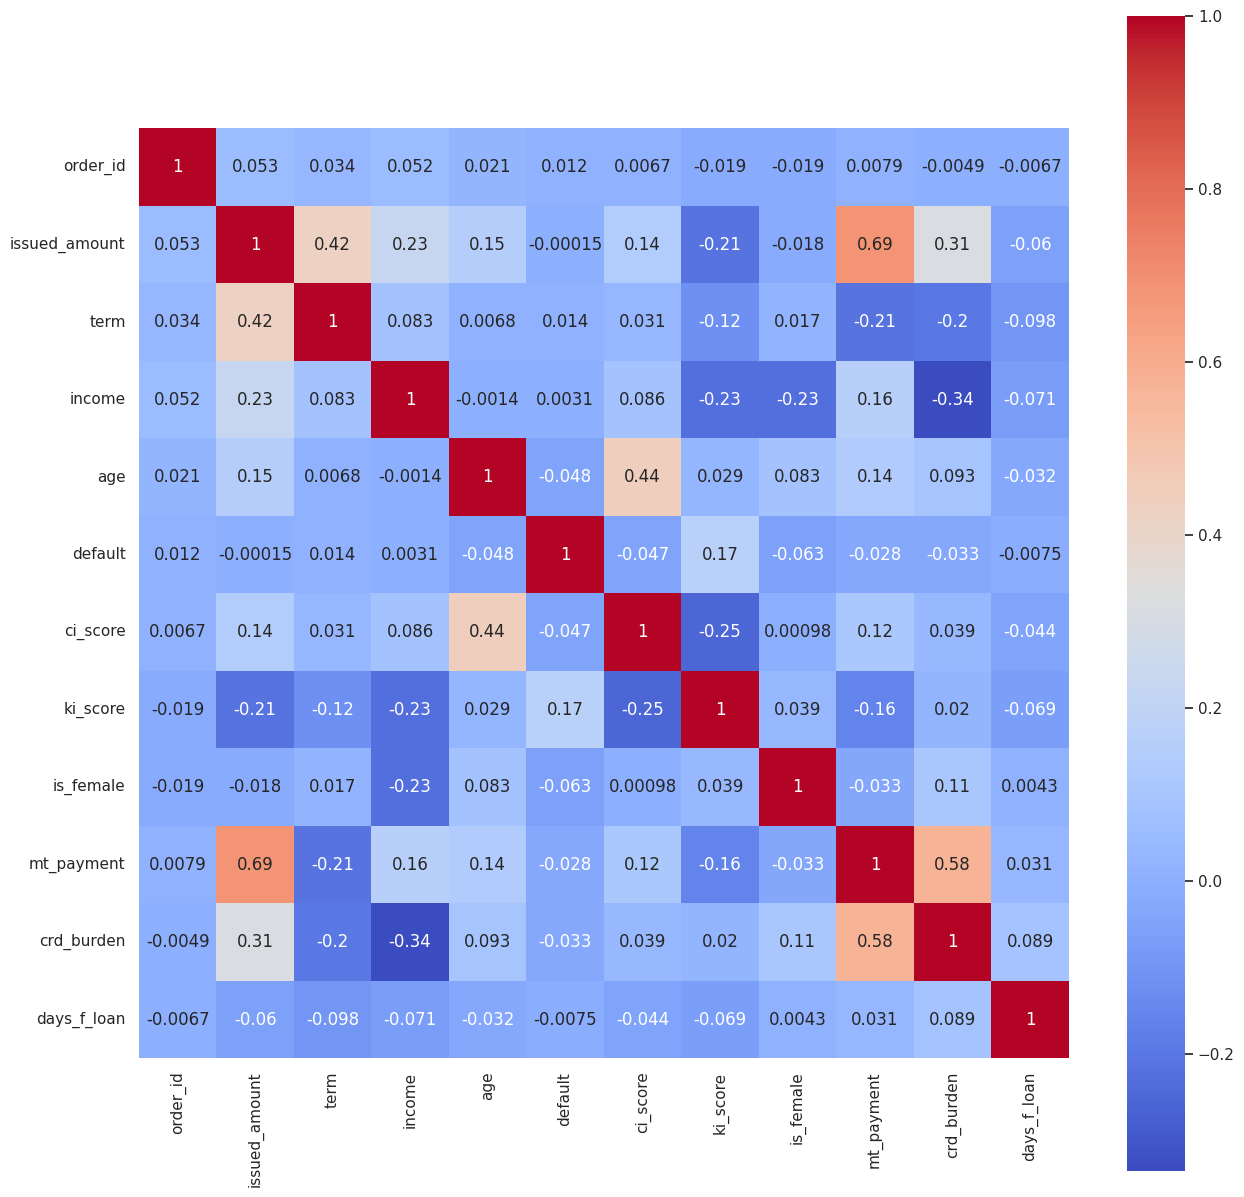

In [ ]:
corr_m = loan_data.corr() #Correlation matrix

plt.figure(figsize = (15,15))
sns.heatmap(corr_m, square = True, annot = True, cmap='coolwarm')# draw a heatmap

plt.show()

**Explanatory Observations:**

- **Default and KI Score:** There is a weak positive correlation between default and KI score. This means that as KI score increases, the likelihood of default also tends to increase.

- **Gender and Income/Credit Burden:** Females tend to have lower incomes and higher credit burdens compared to males. This is likely due to systemic factors such as the gender pay gap.

- **Loan Characteristics:** Issued amount has a moderate correlation with both term and income. This is logical, as borrowers with higher incomes are more likely to qualify for larger loans and longer terms. Sum of payments per month has a weak correlation with income, indicating that borrowers with higher incomes may not necessarily have higher monthly payments.

- **Age:** Age has a weak positive correlation with the sum of issued money, indicating that older borrowers may have taken out more loans over time.

- **KI Score and Monthly Payment:** KI score has a weak negative correlation with monthly payment. This suggests that borrowers with higher KI scores may have lower monthly payments, which could be due to factors such as lower interest rates or longer loan terms.


## 2.  **Evaluation of existing scoring ci_score or ki_score models**

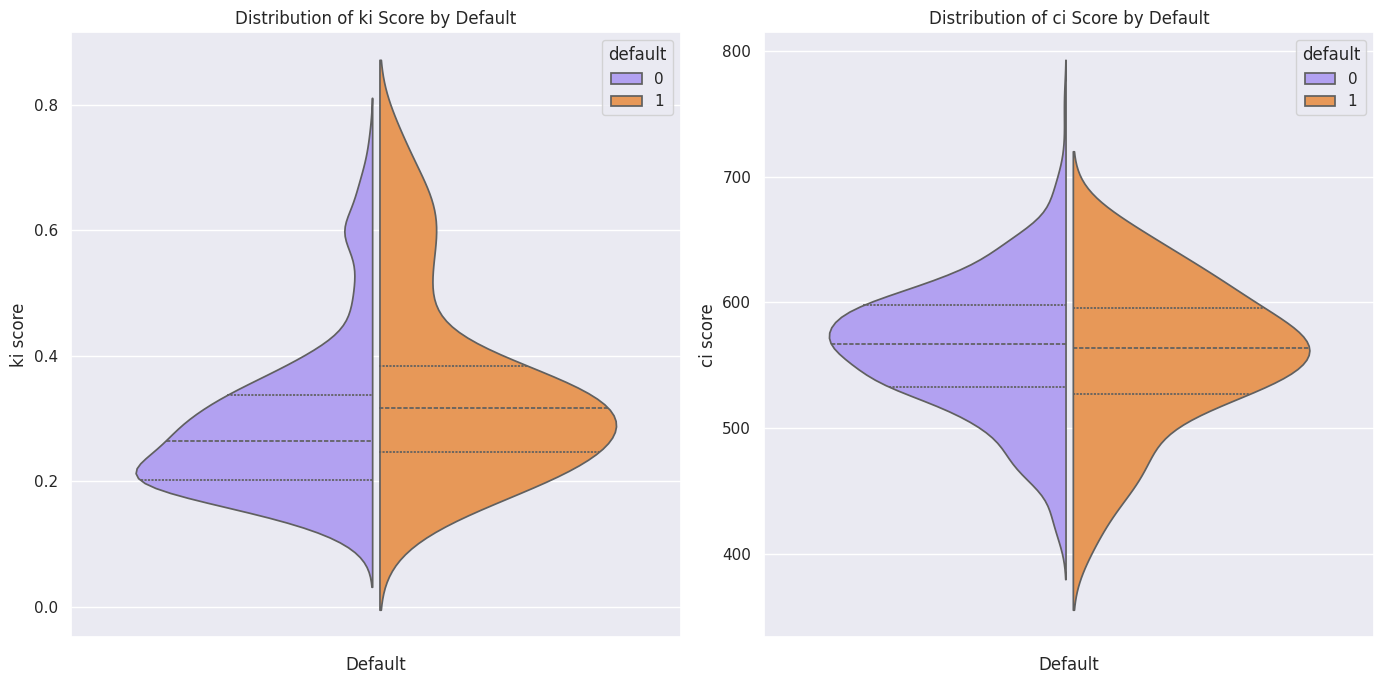

In [ ]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# Plot the first violin plot for 'ki_score'
sns.violinplot(data=loan_data, y="ki_score", hue="default", gap=0.03, split=True, palette=custom_palette, inner="quart", ax=axes[0])
axes[0].set_xlabel('Default')
axes[0].set_ylabel('ki score')
axes[0].set_title('Distribution of ki Score by Default')

# Plot the second violin plot for 'ci_score'
sns.violinplot(data=loan_data, y="ci_score", hue="default", gap=0.03, split=True, palette=custom_palette, inner="quart", ax=axes[1])
axes[1].set_xlabel('Default')
axes[1].set_ylabel('ci score')
axes[1].set_title('Distribution of ci Score by Default')

plt.tight_layout()
plt.show()

For the **CI_Score**, the correlation is close to zero (pvalue=0.3, Spearman's Rank Correlation Coefficient.)  
 This suggests that the correlation between CI_Score and default is not statistically significant. **We should not use this metrics for predicting defaults.**

On the contrary, the **KI_Score** has a correlation coefficient of approximately 0.149, suggesting a weak positive correlation with the default variable. The p-value (1.62e-06) is significantly small, indicating that this **correlation is statistically significant.**

## 3. **Constructing default probability model**

I could give some models. But we have some issues:
- Due to the limited amount of data available, the models are highly sensitive to any changes in the test dataset and are prone to overfitting easily
- A lot of data have close to zero correlations with our key metrics. And linear models would be tough to have a good prediction.
- We need more diverse and informative features to enhance model performance. For instance, incorporating individuals' past credit behavior and history could provide valuable insights, cars, family, real estate, job status, etc.
- Selecting an appropriate evaluation metric depends on the specific task at hand. I assume priority of categorization where ranking are necessary (this pertains to the question of whether it's acceptable to use ROC AUC). that is why we could use such parameter for choosing and include our risk into interest.


Addititonal metrics that would be interesting in next iterations:  
 **Group 1: Client Data:**
- **Education**: Level of education of the client.
- **Marital Status**: Marital status of the client.
- **Occupation**: Profession or occupation of the client.

**Group 2: Financial History:**
- **Credit History**: History of credit, including defaults, number of credits, and debt levels.
- **Payment History**: History of payments, indicating reliability in meeting financial obligations.
- **Default History**: History of defaults, postpones in how many days.

**Group 3: Income and Employment Data:**
- **Employment Type**: Type of employment.
- **Work Experience**: Years of work experience.
- **Company**: We could measure it stability.
- **Taxes or payrolls**: As alternative to prove income, from State Revenue Service (VID)
- **Social benefits**: From the Social Insurance Agency (VSAA)

**Group 4: Current Obligations Information:**
- **Current Loans**: Details of current loans.
- **Mortgage**: Information about mortgages.
- **Rental Payments**: Details of rental payments and other financial obligations.

**Group 5: Additional Data:**
- **Behavioral Data**: History of bill payments, spending habits, savings, etc.
- **Social Connections**: Social connections and networks of the client.






So we could check on our data **Linear model**, that we have some differences in groups, with small correlation to final model. We choose Logistic regression because it is bayesian binomial results.   

We could check **Decision Tree** maybe it could find the way to predict better in such circumstances.  

And one of **Gradient Boosting** model **LightGBM**, that is recommended for table data.  


## 4. **Model proposal**

I have checked for 3 Models:  
Linear Model **Logistic Regression** less effective than ki_score. And recall is 0. So the model is not effective in prediction risks.  
ROC_AUC ki_score: 0.63  
ROC_AUC Linear regression: 0.64    



The same with **Descision Tree**  
ROC_AUC Descision Tree: 0.44  

**Gradient Boosting and LightGBM with Optuna Fine-tuning**

Gradient Boosting LightGBM are machine learning algorithm used for predictive modeling. Gradient Boosting is a type of ensemble learning method that combines multiple weak learners (usually decision trees) sequentially, with each subsequent model correcting the errors of its predecessors. LightGBM is a high-performance implementation of gradient boosting that uses a novel technique called histogram-based algorithms to achieve faster training speed and lower memory usage.

Optuna is a hyperparameter optimization framework that automates the process of tuning the hyperparameters of machine learning models. It efficiently searches the hyperparameter space to find the optimal set of hyperparameters that maximize a chosen objective function, such as accuracy or AUC.

Overall, combining LightGBM with Optuna fine-tuning provides an efficient and effective approach for predictive modeling with tabular data.

And I've got great result in  Gradient Boosting model. It could predict intensively better, than ki_score model.

Bloue line below shows random method of choosing predictions. Our purpose to get the yellow line cover more then blue, and then other model

Model has delivered impressive results, as evidenced by the ROC curve. Additionally, when comparing the ROC curve of the ki_score, our model outperforms it, showcasing a significant achievement.

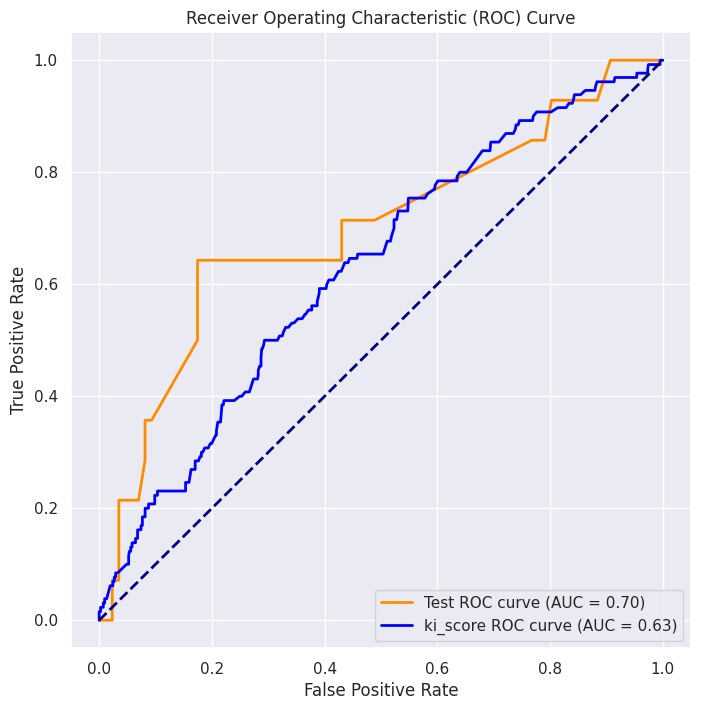

In [ ]:
# Compute ROC curve and ROC area for test metrics
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Compute ROC curve and ROC area for 'ki_score'
fpr_ki_score, tpr_ki_score, _ = roc_curve(y, X['ki_score'])
roc_auc_ki_score = auc(fpr_ki_score, tpr_ki_score)

# Plot ROC curves
plt.figure(figsize=(8, 8))

# Plot ROC curve for test metrics
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')

# Plot ROC curve for 'ki_score'
plt.plot(fpr_ki_score, tpr_ki_score, color='blue', lw=2, label=f'ki_score ROC curve (AUC = {roc_auc_ki_score:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

0.7 is SIGNIFICALLY better then 0.63 for predictions. And this result could be improved.  
To make yeallow line smoothier we should take more data into account.

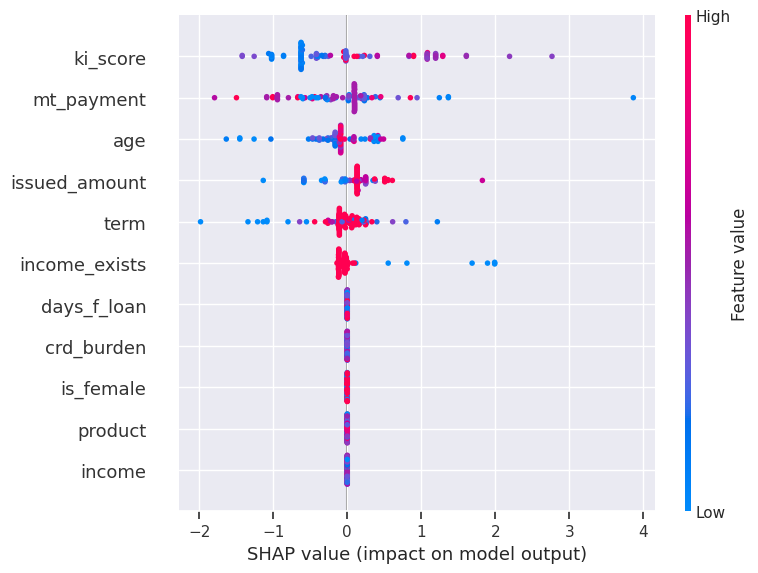

In [ ]:
shap.summary_plot(shap_values, X_test)

1. **Ki_score:**
   - A lower ki_score tends to decrease the likelihood of default according to our model. In other words, if the ki_score is below average, we may have more confidence that the customer will repay the loan on time.

2. **Monthly Payment:**
   - Default levels tend to be higher for loans with monthly payments above the average. This suggests that customers with higher monthly payments may have a greater likelihood of default.

3. **Age:**
   - On average, customers with an average age tend to perform slightly better in terms of default rates. However, younger individuals may exhibit a higher chance of default in certain cases.

4. **Issued Amount:**
   - There is a correlation between the issued_amount and the likelihood of default. Generally, higher loan amounts are associated with a higher chance of default.

5. **Term:**
   - Longer loan terms may indicate a higher probability of repayment. Short-term loans, on the other hand, vary significantly depending on the specific situation.

6. **Income Existence:**
   - Customers with documented income (income_exists = yes) are less likely to default compared to those without documented income. The absence of documented income is associated with a higher chance of default.

These interpretations provide insights into how each feature contributes to our model's predictions. Understanding these relationships can help us refine our model and make better-informed decisions in the lending process.